In [ ]:
import io
import pandas as pd
import numpy as np
import os
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as dates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


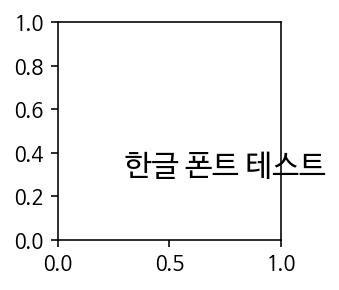

In [ ]:
## * 이 셀이 제대로 작동하지 않고 길게 warning 메시지가 나올 경우, 상단의 메뉴에서 <런타임>-<런타임 다시 시작>을 클릭한 뒤 처음부터 코드를 실행하세요 
# 그래프 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

#폰트 설치
!apt -qq -y install fonts-nanum

#기본 폰트로 지정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

from IPython.display import set_matplotlib_formats
#폰트 선명하게 보이게 하기 위해
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show() 

In [ ]:
#path = "/content/drive/MyDrive/[데마] 분석 프로젝트/data"
data = pd.read_csv('/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0802/train_0802(eda용).csv')
#data = data[data.area!='세종'] # 세종 제외 
#data['yyyymmdd'] = pd.to_datetime(data['yyyymmdd'], format='%Y-%m-%d')
# data = data.set_index('yyyymmdd') 
# data = data.sort_index()  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49674 entries, 0 to 49673
Columns: 205 entries, yyyymmdd to season_cos
dtypes: bool(1), float64(184), int64(18), object(2)
memory usage: 77.4+ MB


In [ ]:
data.head()

yyyymmdd area  sex  frequency     dd_mes  sum_dpth_fhsc   dd_mefs  \
0  2012-01-01   강원    1          3  10.136053       2.155943  1.303480   
1  2012-01-01   강원    2          3  10.136053       2.155943  1.303480   
2  2012-01-01   경기    1          4   1.029764       0.085438  0.096118   
3  2012-01-01   경기    2          5   1.029764       0.085438  0.096118   
4  2012-01-01   경남    1          2   0.865082       0.293056  0.533394   

      ssrate    ss_dur  sum_ss_hr  ...   weekday_sin  weekday_cos  season_sin  \
0  35.856285  9.632506   3.444997  ... -2.449294e-16          1.0    0.781831   
1  35.856285  9.632506   3.444997  ... -2.449294e-16          1.0    0.781831   
2  25.748326  9.669065   2.485800  ... -2.449294e-16          1.0    0.781831   
3  25.748326  9.669065   2.485800  ... -2.449294e-16          1.0    0.781831   
4  29.514334  9.814313   2.896959  ... -2.449294e-16          1.0    0.781831   

   season_cos  area_le  area_code  day1  주말  Mon   diff_ta  
0     0.62349        0         42  True   1    0  8.499778  
1     0.62349        0         42  True   1    0  8.499778  
2     0.62349        1         41  True   1    0  8.401030  
3     0.62349        1         41  True   1    0  8.401030  
4     0.62349        2         48  True   1    0  9.827104  

[5 rows x 236 columns]

In [ ]:
data.columns[-40:]

Index(['심장병_가족력', '고혈압_가족력', 'day1', 'smoking', 'day_mean_smoke_over1',
       'A03_max', 'A03_min', 'A03_mean', 'A03_range', 'A03_iqr', 'A03_max_24',
       'A03_min_24', 'A03_mean_24', 'A03_range_24', 'A03_iqr_24', 'A03_max_48',
       'A03_min_48', 'A03_mean_48', 'A03_range_48', 'A03_iqr_48', 'A07_max',
       'A07_min', 'A07_mean', 'A07_range', 'A07_iqr', 'D02_max', 'D02_min',
       'D02_median', 'D02_max_24', 'D02_min_24', 'D02_median_24',
       'D02_range_24', 'D02_max_48', 'D02_min_48', 'D02_median_48',
       'D02_range_48', 'weekday_sin', 'weekday_cos', 'season_sin',
       'season_cos'],
      dtype='object')

In [ ]:
#data['over50_rate'] = data['over50'] /data['population']

### 변수형 파악 

In [ ]:
data['yyyymmdd'] = pd.to_datetime(data['yyyymmdd'], format='%Y-%m-%d')

#### 변수형 변환 (int -> object)

In [ ]:
# data['month'] = data['yyyymmdd'].dt.month
# data['day'] = data['yyyymmdd'].dt.day
# data['요일'] = data['yyyymmdd'].dt.weekday #월:0, 화:1, 수:2, 목:3, 금:4, 토:5, 일:6
# data['요일'] = data['요일'].replace({0: 'Mon', 1: "Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"})
# data['주말'] = np.where((data['요일']=="Sat") | (data['요일']=="Sun") , 1, 0)

# conditionlist = [
#     (data['month'].isin([3,4,5])) ,
#     (data['month'].isin([6,7,8])),
#     (data['month'].isin([9,10,11])),
#     (data['month'].isin([12,1,2]))]
# choicelist = ['spring', 'summer', 'fall', 'winter']
# data['season'] = np.select(conditionlist, choicelist, default='Not Specified')


In [ ]:
# cols_notobj = ['sex', 'frequency','Heat_Wave','month', 'day', '요일', 'season', 'isholiday']
# data[cols_notobj] = data[cols_notobj].astype(object)

In [ ]:
cols = ['sex','year','month','day', '주말','day1','Mon']
data[cols] = data[cols].astype(object)

### 결측치 파악

In [ ]:
data.isnull().sum().to_frame('nan_count')

nan_count
yyyymmdd           0
area               0
sex                0
frequency          0
dd_mes             0
...              ...
area_code          0
day1               0
주말                 0
Mon                0
diff_ta            0

[236 rows x 1 columns]

## 변수 1개별 탐색

- y: frequency

- yyyymmdd 변수 --> month, day, 요일, season, day1, Mon 파생변수 만듦
  - 모델링에는 시간 관련 파생변수들을 모두 사용하지 않고, 이중 필요한 변수만 사용 
  - 참고: year는 데이터 split 과정에서 코드상 필요하여 생성한 것임. 

- 기온 변수('avg_ta', 'max_ta', 'min_ta') --> 'diff_ta' 생성 
  - 다중공선성을 고려하여 필요한 변수만 선택, 선행연구에서 기온을 선택할 때 대부분 최저기온과 기온의 일교차를 사용했다. 앞서 언급한 것처럼 기상 상황과 뇌심혈관질환의 연관성을 다룬 연구들을 살펴보면 뇌심혈관질환이 기온과 상관 있는데 특히 기온의 일교차가 큰 영향을 미친다는 것을 확인할 수 있었다. 따라서 우리도 이와 같이 변수 선택하였다. 

- 습도 변수('avg_rhm', 'min_rhm')
- 강수량 변수('sum_rn', 'sum_rn_dur', 'mi10_max_rn', 'hr1_max_rn', 'hr6_max_rn','n9_9_rn')
- 기압 변수('avg_pa','max_pa', 'min_pa')
- 미세먼지 변수('SO2','CO', 'O3', 'NO2', 'PM10')
- 예보데이터 ('rainfall_24', 'snow_24', 'temp_24', 'temp_48', 'humid_24', 'humid_48','max_temp_24', 'min_temp_24', 'wind_24', 'wind_48')
- 각종 생활지수('A03_max', 'A03_min', 'A03_mean', 'A03_range','A03_iqr', 'A03_max_24', 'A03_min_24', 'A03_mean_24', 'A03_range_24','A03_iqr_24', 'A03_max_48', 'A03_min_48', 'A03_mean_48', 'A03_range_48', 'A03_iqr_48', 'A07_max', 'A07_min', 'A07_mean', 'A07_range', 'A07_iqr','D02_max', 'D02_min', 'D02_median')
- 인구 변수 ('pop_over50')
- 병원 관련 변수 ('num_back')
- 질환력 변수 ('심정지', '뇌졸중_진단', '심장병_진단', '고혈압_진단', '이상지질혈증_진단', '뇌졸중_약물치료', '심장병_약물치료', '고혈압_약물치료', '이상지질혈증_약물치료', '뇌졸중_가족력', '심장병_가족력', '고혈압_가족력')
- 보건 변수 ('smoking', 'day_mean_smoke_over1')
- 지난 7일, 14일 평균 변수
('avg_pa_7일평균', 'max_pa_7일평균', 'min_pa_7일평균','avg_ta_7일평균', 'max_ta_7일평균', 'min_ta_7일평균', 'avg_rhm_7일평균','min_rhm_7일평균', 'max_ws_7일평균', 'max_ins_ws_7일평균', 'NO2_7일평균','avg_pa_14일평균', 'max_pa_14일평균', 'min_pa_14일평균', 'avg_ta_14일평균','max_ta_14일평균', 'min_ta_14일평균', 'avg_rhm_14일평균', 'min_rhm_14일평균','max_ws_14일평균', 'max_ins_ws_14일평균', 'NO2_14일평균')

- 이외의 lag변수들 (_lag1, _lag2, _lag3)


### frequency

In [ ]:
data['frequency'].describe()

count    49674.000000
mean         1.422173
std          1.672557
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: frequency, dtype: float64

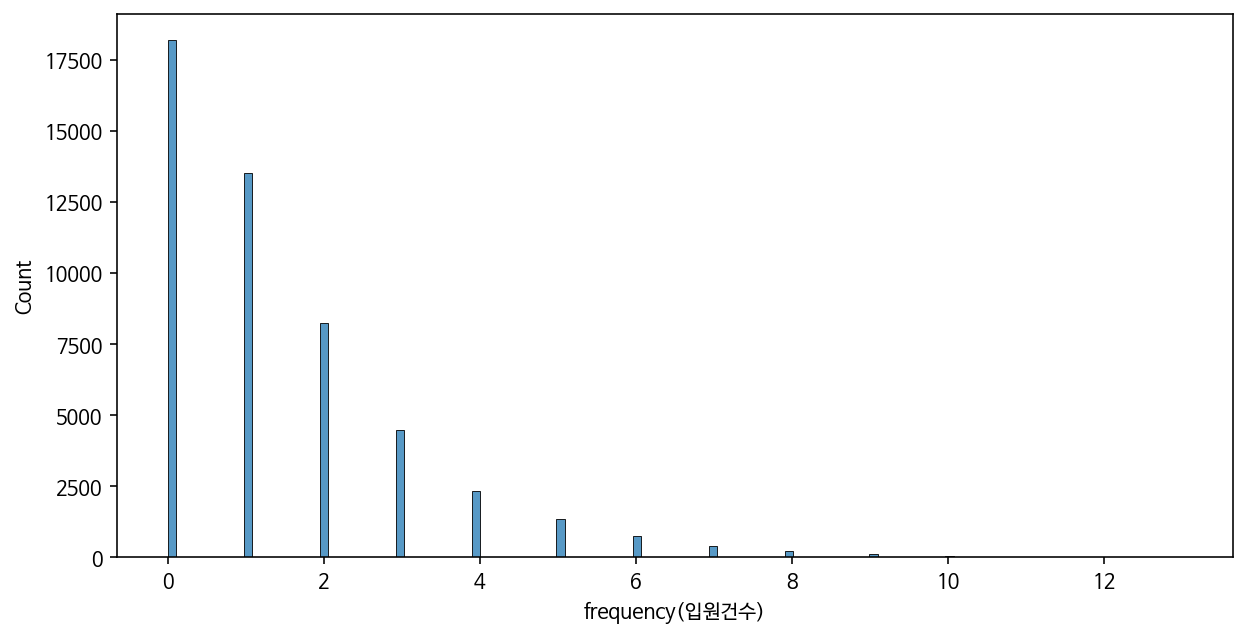

In [ ]:
plt.figure(figsize=(10,5)) 
dist=sns.histplot(data['frequency'], kde=False) 
dist.set_xlabel("frequency(입원건수)")
plt.show()  

- 종속변수인 frequency(입원건수)의 평균은 1.422173, 중간값은 1이며 범위는 (0, 13)이다.
- frequency(입원건수)는 왼쪽으로 매우 치우친 분포이다. 대부분의 y값이 0 또는 1이며, Q3가 2인 것으로 미루어보아 우리가 예측할 y는 10을 넘어가기도 하겠지만, 3 이상인 경우조차도 드물다. 

### 범주형 변수

In [ ]:
category_feature = [ col for col in data.columns if data[col].dtypes == "object"]
print(category_feature) 

['area', 'sex', 'year', 'month', 'day', '요일', 'season', 'day1', '주말', 'Mon']


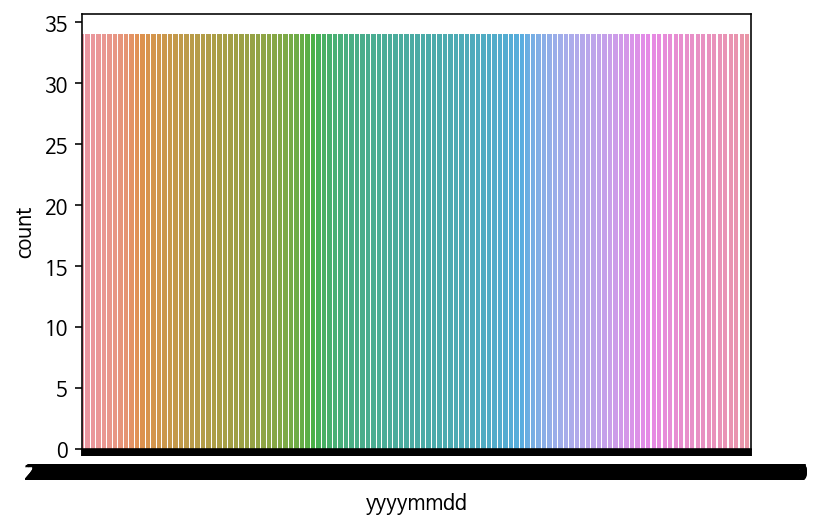

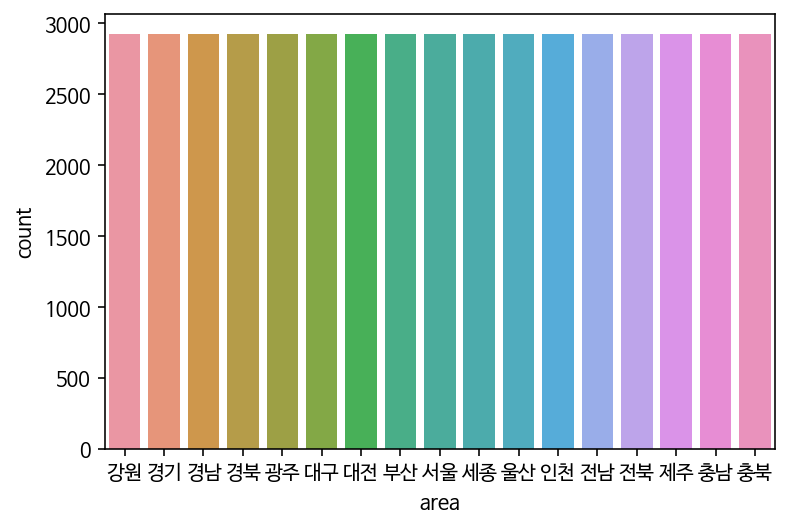

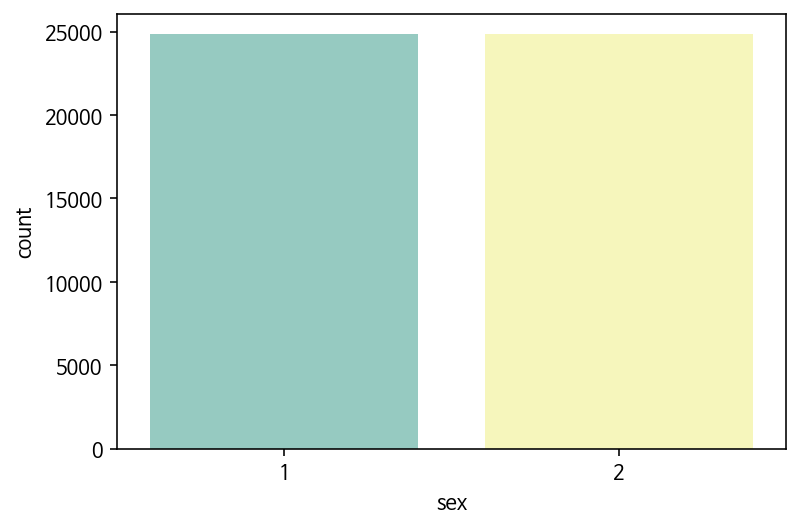

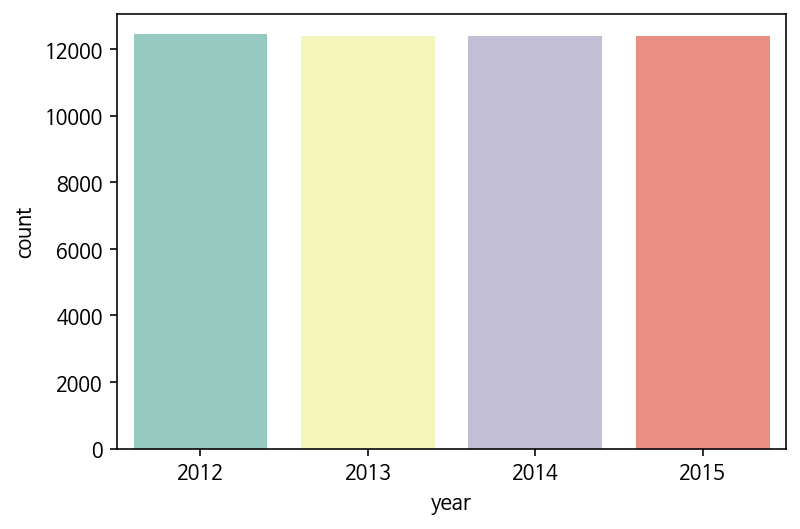

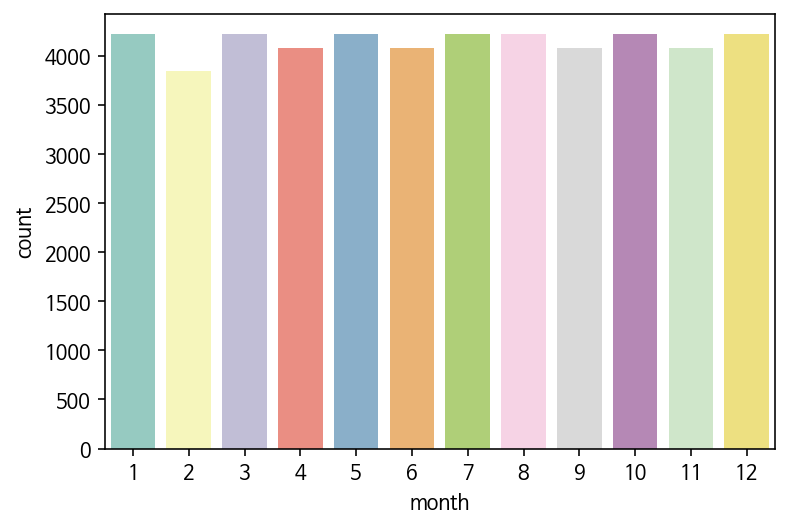

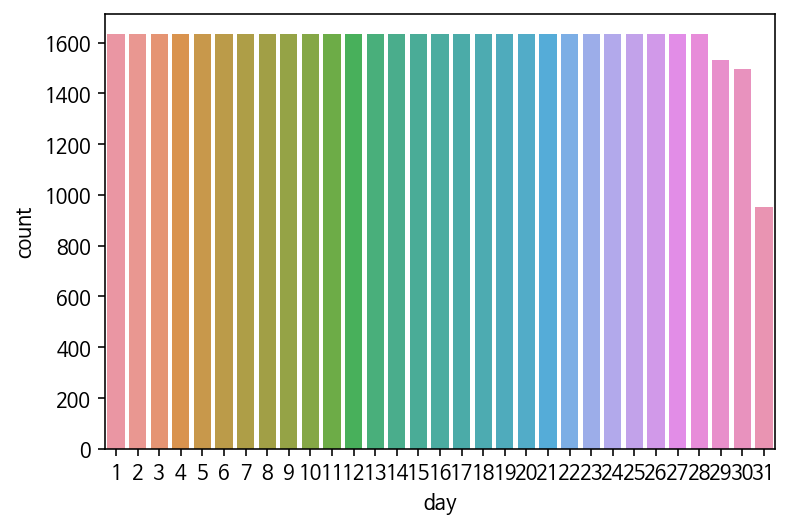

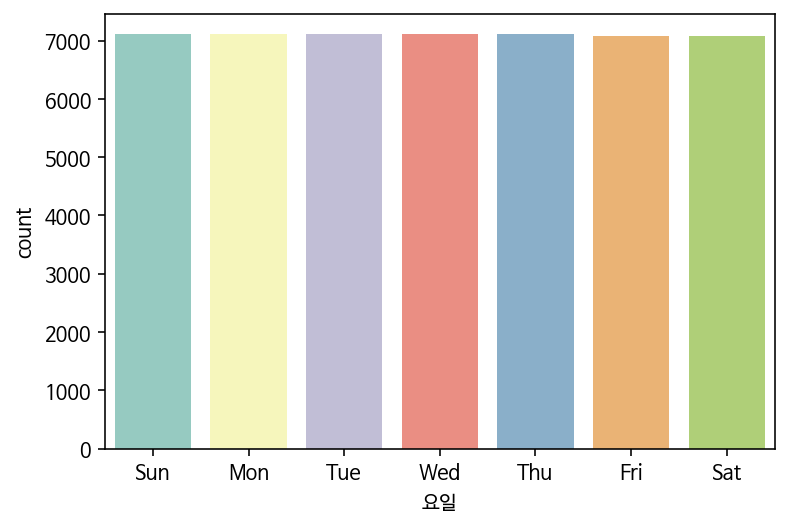

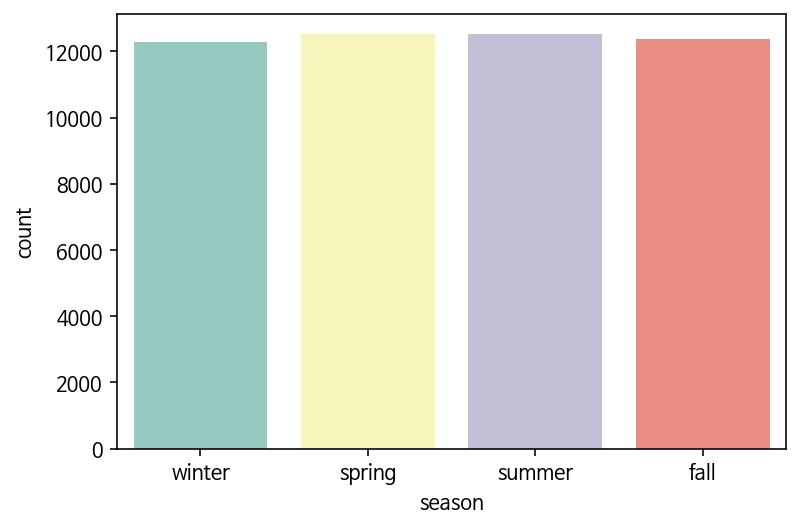

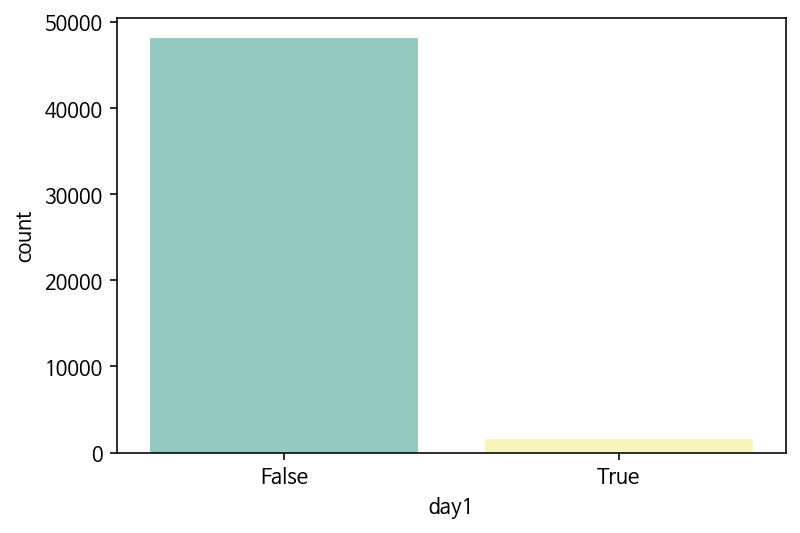

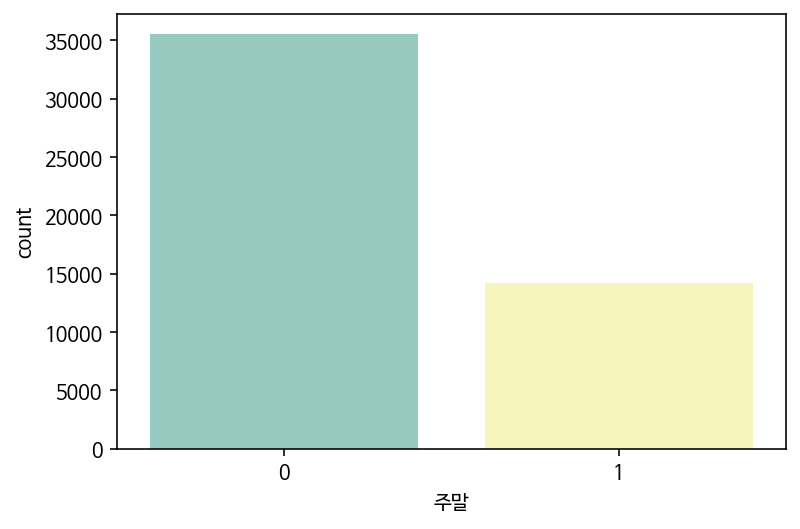

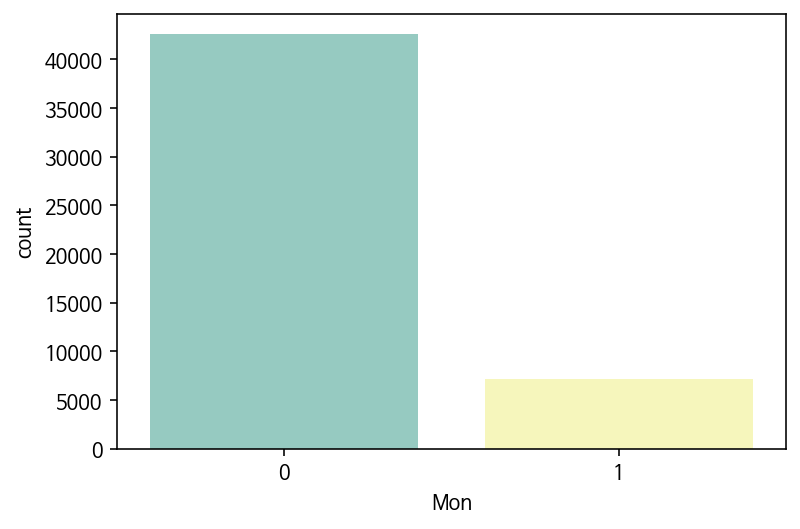

In [ ]:
for col in category_feature:
    # 팔레트 지정
    qualitative_colors = sns.color_palette("Set3", 16)
    sns.set_palette(qualitative_colors)

    sns.countplot(data=data, x=col)
    plt.show()

In [ ]:
# for col in ['D02_imi_num_max', 'Heat_Wave','isholiday']:
#   print('변수명: ', col)
#   print(pd.DataFrame({'건수':data[col].value_counts(),
#                       '비율(%)': data[col].value_counts(normalize=True)*100}))
#   print() 

변수명:  D02_imi_num_max
        건수      비율(%)
1.0  11980  34.158303
2.0  10072  28.718066
0.0   7982  22.758896
3.0   5038  14.364735

변수명:  Heat_Wave
        건수      비율(%)
0.0  33948  96.795164
1.0   1124   3.204836

변수명:  isholiday
        건수      비율(%)
0.0  28736  81.934307
1.0   6336  18.065693



- 범주형 변수는 'area','sex','month','day','요일','season'이 있으나 날짜 관련 변수들은 데이터 형태상 모두 동일한 건수가 있기 때문에 countplot으로 유의미한 정보를 얻을 수 없었다. 

- #'isholiday': 0(), 1()으로 공휴일인 경우가 훨씬 적음을 확인할 수 있다. => 아직 안 만듦

### 연속형 변수

In [ ]:
numeric_feature = [ col for col in data.columns if col not in category_feature ]  # y인 frequency 제외 
numeric_feature 

['yyyymmdd',
 'frequency',
 'dd_mes',
 'sum_dpth_fhsc',
 'dd_mefs',
 'ssrate',
 'ss_dur',
 'sum_ss_hr',
 'min_tg',
 'avg_pa',
 'max_pa',
 'min_pa',
 'avg_pv',
 'max_pv',
 'min_pv',
 'avg_rhm',
 'min_rhm',
 'sum_rn',
 'sum_rn_dur',
 'mi10_max_rn',
 'hr1_max_rn',
 'hr6_max_rn',
 'n9_9_rn',
 'avg_ta',
 'max_ta',
 'min_ta',
 'avg_ws',
 'max_ws',
 'max_ins_ws',
 'dd_mes_lag1',
 'sum_dpth_fhsc_lag1',
 'dd_mefs_lag1',
 'ssrate_lag1',
 'ss_dur_lag1',
 'sum_ss_hr_lag1',
 'min_tg_lag1',
 'avg_pa_lag1',
 'max_pa_lag1',
 'min_pa_lag1',
 'avg_pv_lag1',
 'max_pv_lag1',
 'min_pv_lag1',
 'avg_rhm_lag1',
 'min_rhm_lag1',
 'sum_rn_lag1',
 'sum_rn_dur_lag1',
 'mi10_max_rn_lag1',
 'hr1_max_rn_lag1',
 'hr6_max_rn_lag1',
 'n9_9_rn_lag1',
 'avg_ta_lag1',
 'max_ta_lag1',
 'min_ta_lag1',
 'avg_ws_lag1',
 'max_ws_lag1',
 'max_ins_ws_lag1',
 'dd_mes_lag2',
 'sum_dpth_fhsc_lag2',
 'dd_mefs_lag2',
 'ssrate_lag2',
 'ss_dur_lag2',
 'sum_ss_hr_lag2',
 'min_tg_lag2',
 'avg_pa_lag2',
 'max_pa_lag2',
 'min_pa_lag2',
 'a

In [ ]:
for col in numeric_feature:
    # 팔레트 지정
    qualitative_colors = sns.color_palette("Set3", 16)
    sns.set_palette(qualitative_colors)

    sns.histplot(data.loc[:, col])
    plt.title(col)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data.describe()

frequency        dd_mes  sum_dpth_fhsc       dd_mefs        ssrate  \
count  49674.000000  49674.000000   49674.000000  49674.000000  49674.000000   
mean       1.422173      0.856782       0.244627      0.230143     52.974018   
std        1.672557      2.445607       0.905033      0.845561     31.746398   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000     24.741914   
50%        1.000000      0.000000       0.000000      0.000000     61.333525   
75%        2.000000      0.219872       0.000000      0.000000     81.571566   
max       13.000000     41.666722      15.500000     13.683857     98.000000   

             ss_dur     sum_ss_hr        min_tg        avg_pa        max_pa  \
count  49674.000000  49674.000000  49674.000000  49674.000000  49674.000000   
mean      12.192950      6.384100      6.712670   1008.182153   1010.750940   
std        1.693172      3.863227     10.837679      8.296132      8.305566   
min        9.565485      0.000000    -22.300000    975.231464    976.881696   
25%       10.575753      3.000000     -2.787271   1002.163211   1004.484664   
50%       12.200000      7.300000      6.722358   1008.300000   1011.000000   
75%       13.804126      9.500000     16.571617   1014.301950   1017.002157   
max       14.800000     13.900000     27.764103   1033.392817   1035.580721   

       ...  max_ws_14일평균  max_ins_ws_14일평균     NO2_14일평균   weekday_sin  \
count  ...  49674.000000      49674.000000  49674.000000  4.967400e+04   
mean   ...      4.924533          8.264855      0.021127  1.202436e-03   
std    ...      1.074908          1.601919      0.008242  7.068409e-01   
min    ...      2.500000          4.578571      0.002630 -9.749279e-01   
25%    ...      4.118276          7.114286      0.015214 -7.818315e-01   
50%    ...      4.785327          8.014064      0.020103 -2.449294e-16   
75%    ...      5.536651          9.128571      0.025981  7.818315e-01   
max    ...     13.000000         18.900000      0.055171  9.749279e-01   

        weekday_cos    season_sin    season_cos       area_le     area_code  \
count  49674.000000  49674.000000  49674.000000  49674.000000  49674.000000   
mean      -0.000274      0.439939     -0.353400      8.000000     36.705882   
std        0.707386      0.539655      0.624779      4.899029     10.254312   
min       -0.900969     -0.433884     -0.900969      0.000000     11.000000   
25%       -0.900969      0.433884     -0.900969      4.000000     29.000000   
50%       -0.222521      0.433884     -0.900969      8.000000     41.000000   
75%        0.623490      0.974928     -0.222521     12.000000     45.000000   
max        1.000000      0.974928      0.623490     16.000000     50.000000   

            diff_ta  
count  49674.000000  
mean       9.343504  
std        3.574393  
min        0.800000  
25%        6.800000  
50%        9.200000  
75%       11.700000  
max       25.400000  

[8 rows x 225 columns]

In [ ]:
data.shape

(49674, 236)

In [ ]:
data.columns[221:]

Index(['year', 'month', 'day', '요일', 'season', 'weekday_sin', 'weekday_cos',
       'season_sin', 'season_cos', 'area_le', 'area_code', 'day1', '주말', 'Mon',
       'diff_ta'],
      dtype='object')

In [ ]:
# 기상변수들
snow_cols = ['dd_mes', 'sum_dpth_fhsc','dd_mefs']
light_cols = ['ssrate', 'ss_dur', 'sum_ss_hr']
pressure_cols = ['avg_pa','max_pa', 'min_pa', 'avg_pv', 'max_pv', 'min_pv']
rain_cols = ['avg_rhm', 'min_rhm','sum_rn', 'sum_rn_dur', 'mi10_max_rn', 'hr1_max_rn', 'hr6_max_rn','n9_9_rn'] #습도, 강수량
temp_cols = ['min_tg','avg_ta', 'max_ta', 'min_ta','diff_ta']
wind_cols = ['avg_ws', 'max_ws','max_ins_ws']

weather_cols = data.columns[4:31].tolist() + ['diff_ta']

# lag1변수들
snow_cols1 = ['dd_mes_lag1', 'sum_dpth_fhsc_lag1', 'dd_mefs_lag1']
light_cols1 = ['ssrate_lag1', 'ss_dur_lag1', 'sum_ss_hr_lag1']
pressure_cols1 = ['avg_pa_lag1', 'max_pa_lag1', 'min_pa_lag1', 'avg_pv_lag1','max_pv_lag1', 'min_pv_lag1']
rain_cols1 = ['avg_rhm_lag1', 'min_rhm_lag1', 'sum_rn_lag1', 'sum_rn_dur_lag1','mi10_max_rn_lag1', 'hr1_max_rn_lag1', 'hr6_max_rn_lag1','n9_9_rn_lag1']
temp_cols1 = ['min_tg_lag1', 'avg_ta_lag1', 'max_ta_lag1', 'min_ta_lag1']
wind_cols1 = ['avg_ws_lag1', 'max_ws_lag1', 'max_ins_ws_lag1']


weather_lag1 = data.columns[31:58].tolist()
weather_lag2 = data.columns[58:85].tolist()
weather_lag3 = data.columns[85:112].tolist()
weather_lags = data.columns[31:112].tolist()

# 대기오염 변수
air_cols = data.columns[112:117].tolist()
air_lag1 = data.columns[117:122].tolist()
air_lag2 = data.columns[122:127].tolist()
air_lag3 = data.columns[127:132].tolist()
air_lags = data.columns[117:132].tolist()

# 예보변수
forecast_cols = data.columns[132:142].tolist()
forecast_shift = data.columns[142:152].tolist()

# 인구 & 병원 개수
other_cols = data.columns[152:154].tolist()

# 질환력
disease_cols = data.columns[154:166].tolist()

# 기타 보건 관련
health_cols = ['smoking','day_mean_smoke_over1']

# 기상지수 
index_cols = data.columns[168:199].tolist()

# 지난 7일, 14일 평균
past_cols = data.columns[199:221].tolist()




## 변수 2개별 탐색

### frequency(입원건수)와 예측변수들과의 관계

#### 기상 관측변수

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in weather_cols + weather_lags:
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 

Output hidden; open in https://colab.research.google.com to view.

#### 대기오염 변수

<Figure size 720x360 with 0 Axes>

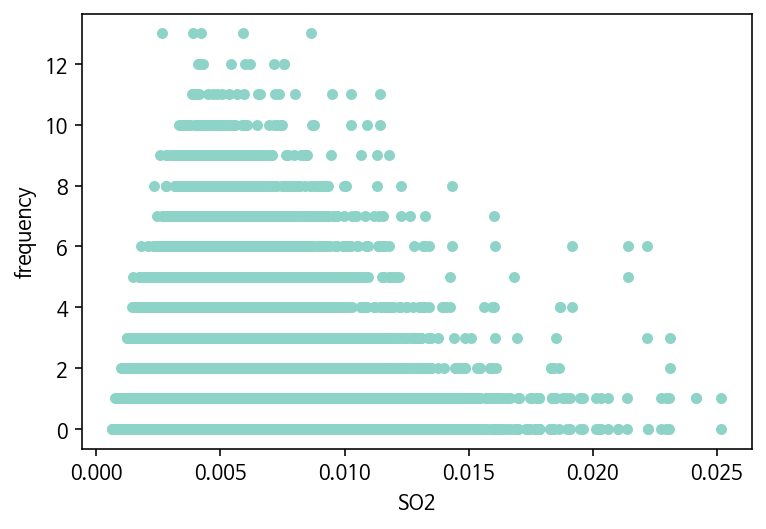

<Figure size 720x360 with 0 Axes>

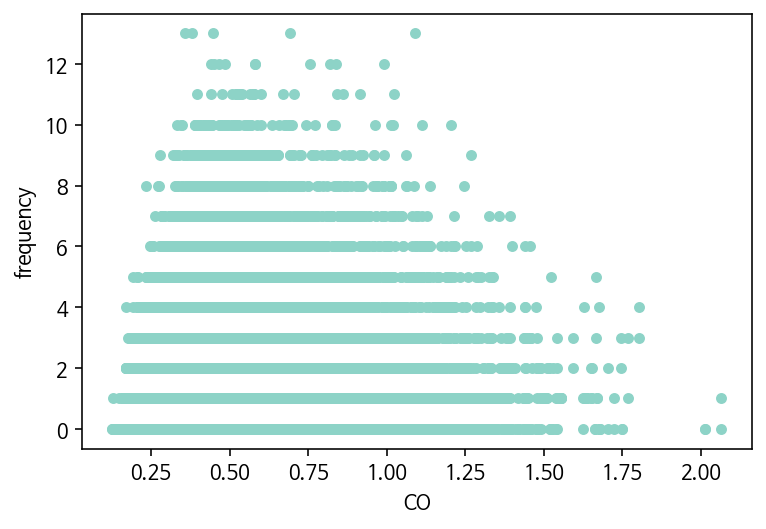

<Figure size 720x360 with 0 Axes>

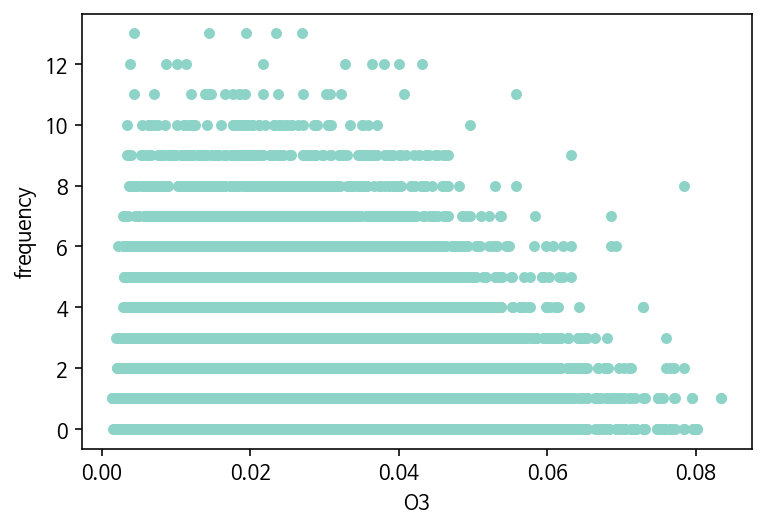

<Figure size 720x360 with 0 Axes>

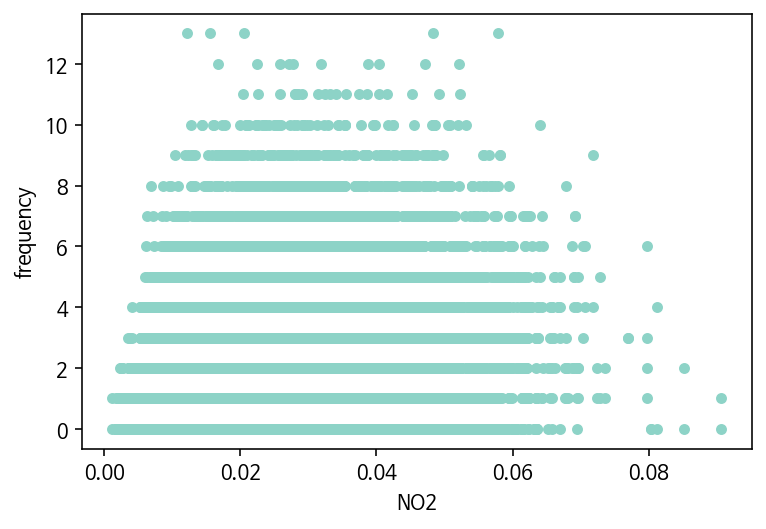

<Figure size 720x360 with 0 Axes>

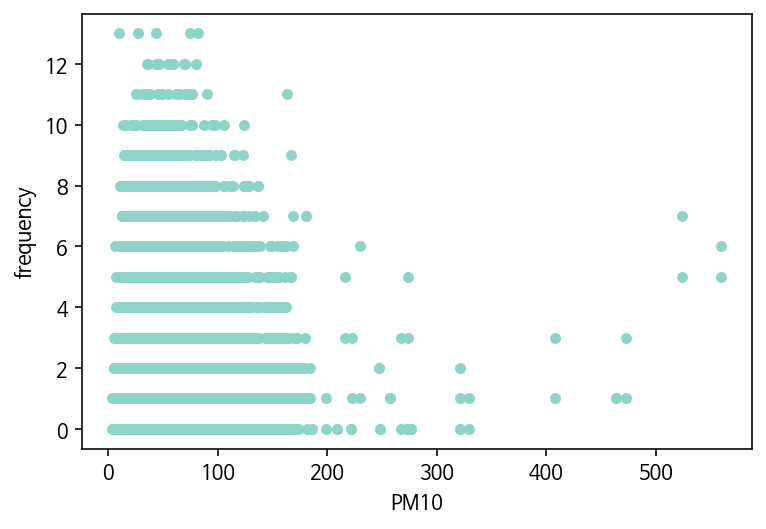

<Figure size 720x360 with 0 Axes>

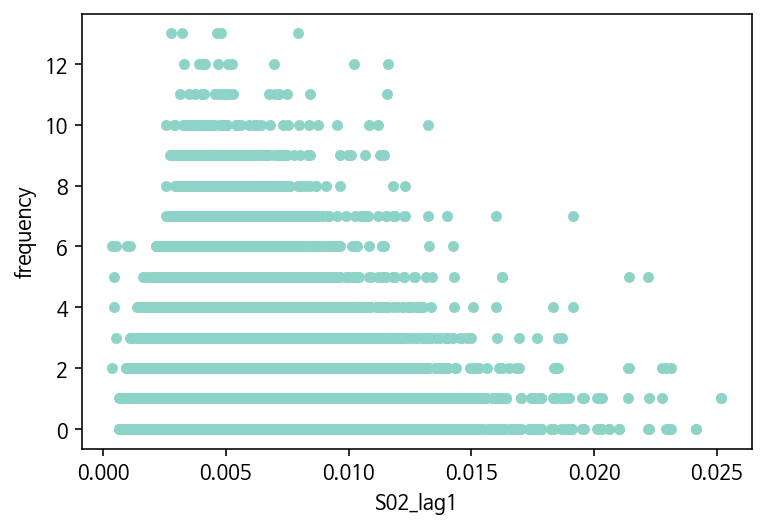

<Figure size 720x360 with 0 Axes>

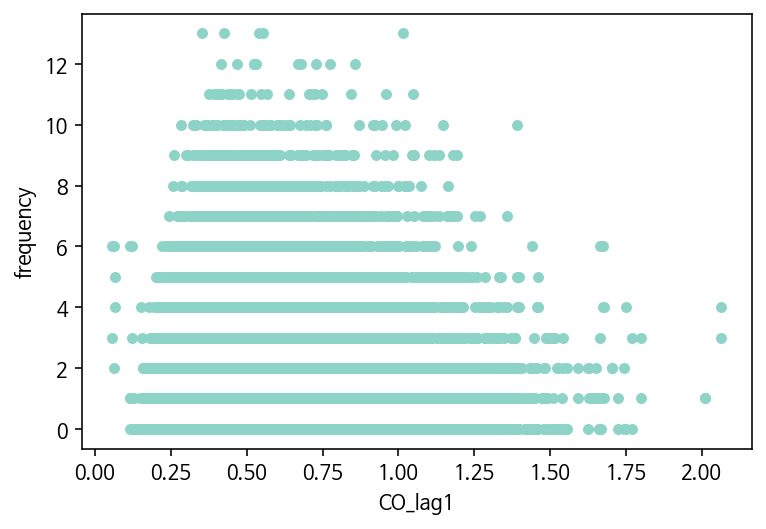

<Figure size 720x360 with 0 Axes>

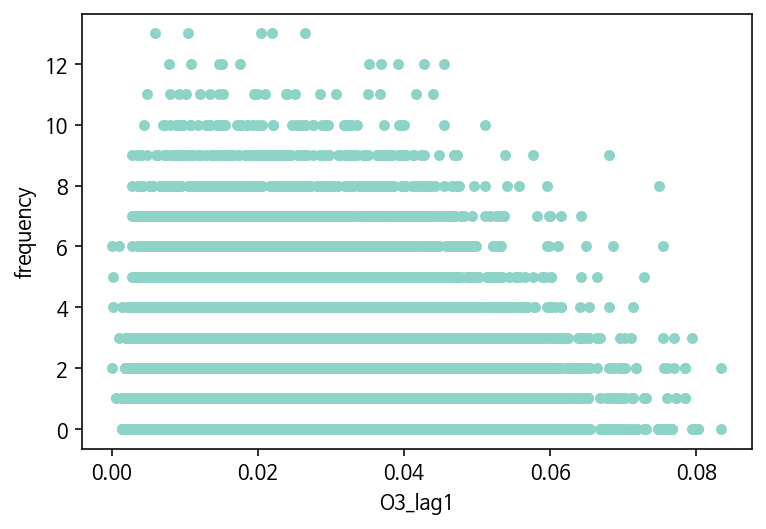

<Figure size 720x360 with 0 Axes>

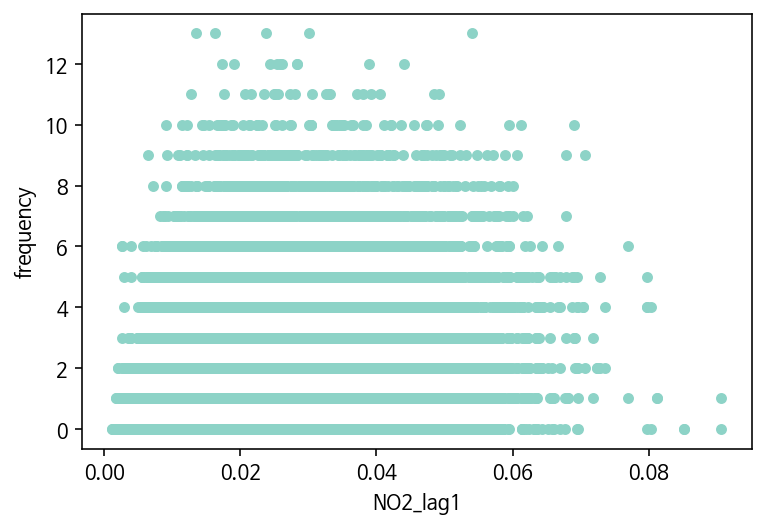

<Figure size 720x360 with 0 Axes>

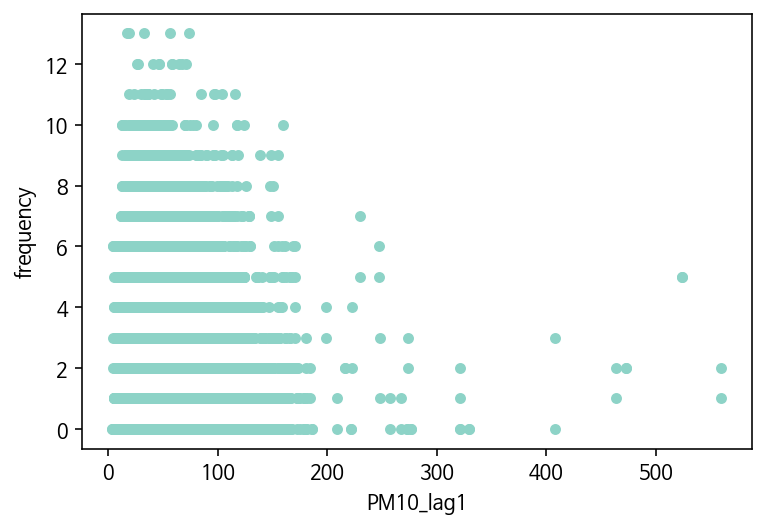

<Figure size 720x360 with 0 Axes>

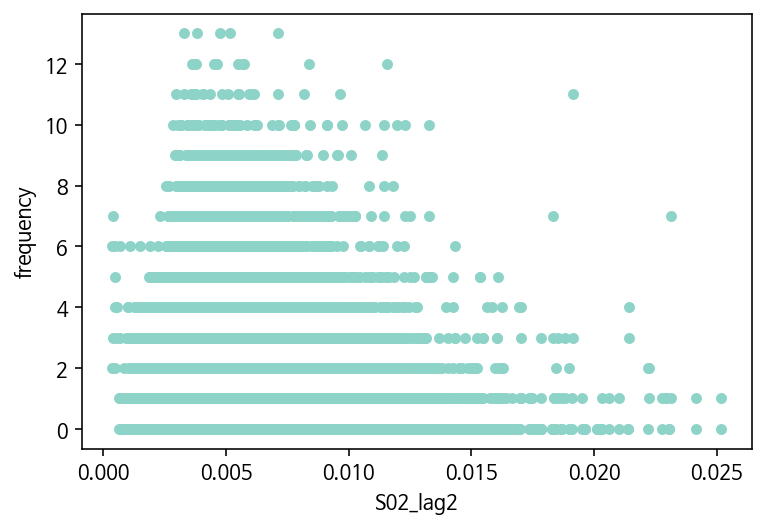

<Figure size 720x360 with 0 Axes>

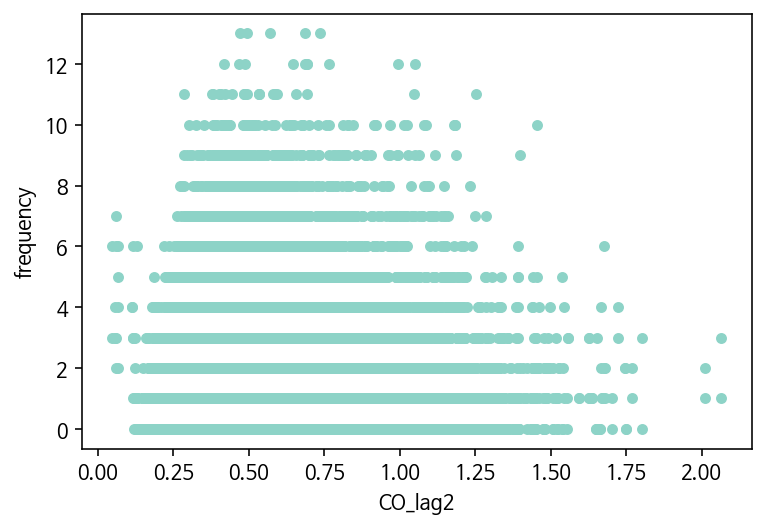

<Figure size 720x360 with 0 Axes>

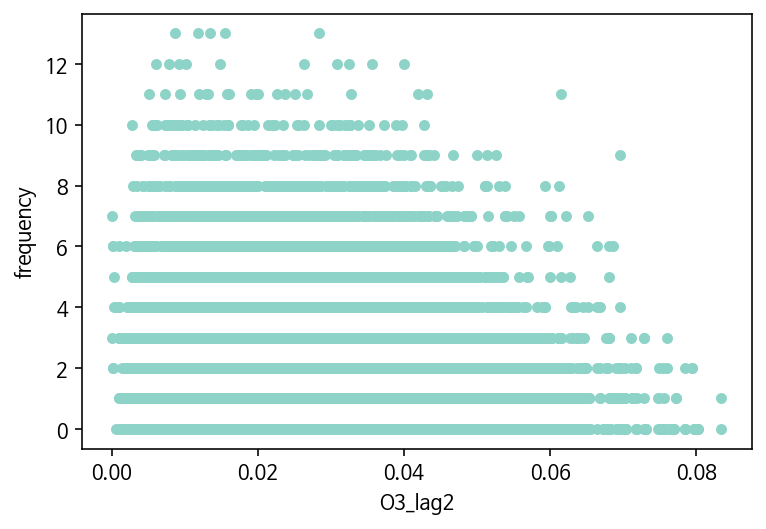

<Figure size 720x360 with 0 Axes>

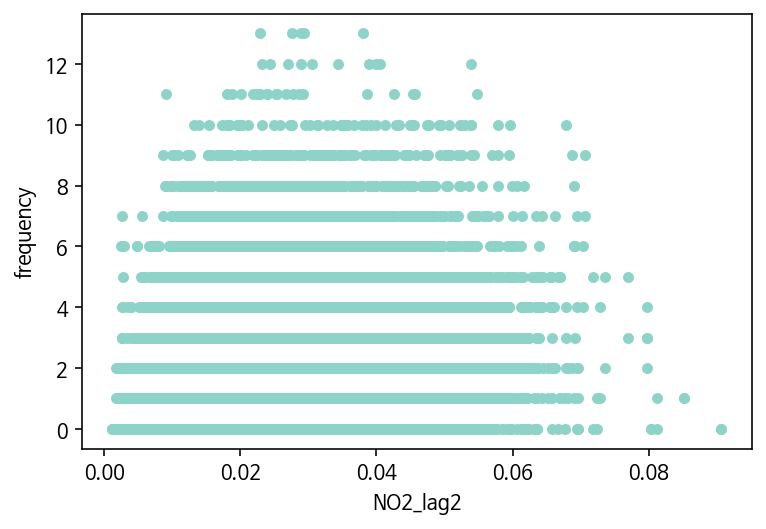

<Figure size 720x360 with 0 Axes>

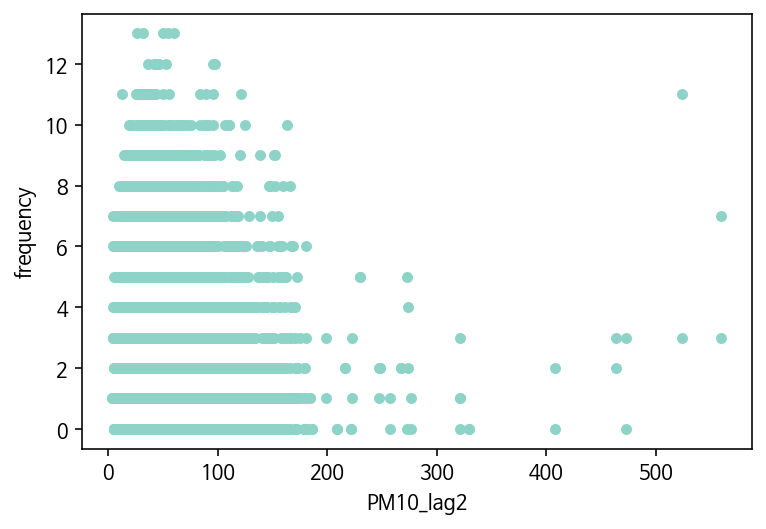

<Figure size 720x360 with 0 Axes>

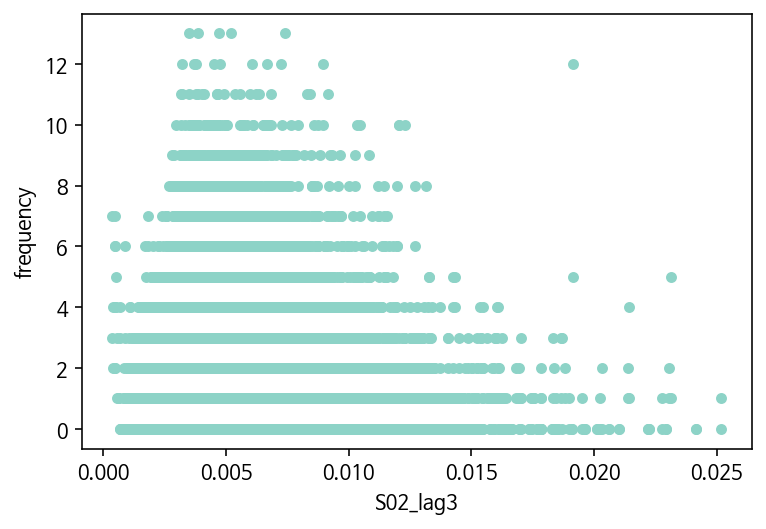

<Figure size 720x360 with 0 Axes>

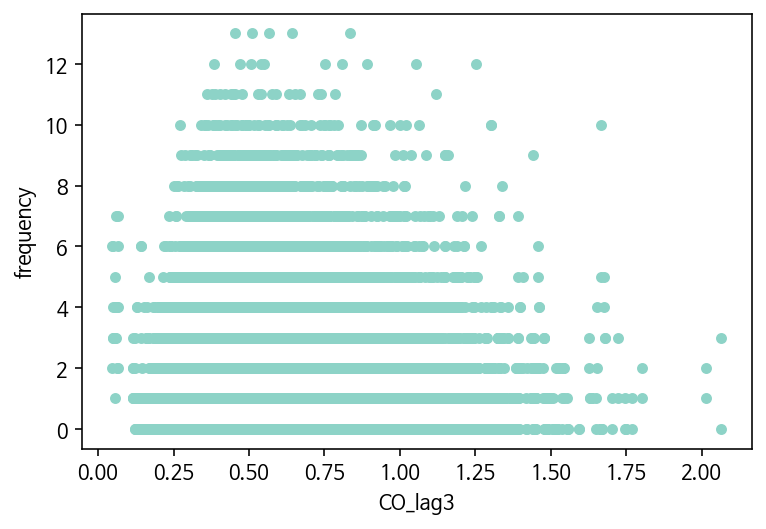

<Figure size 720x360 with 0 Axes>

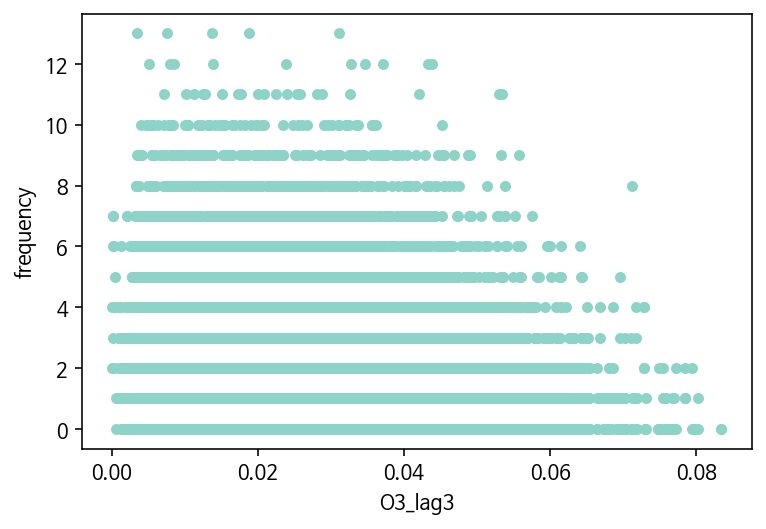

<Figure size 720x360 with 0 Axes>

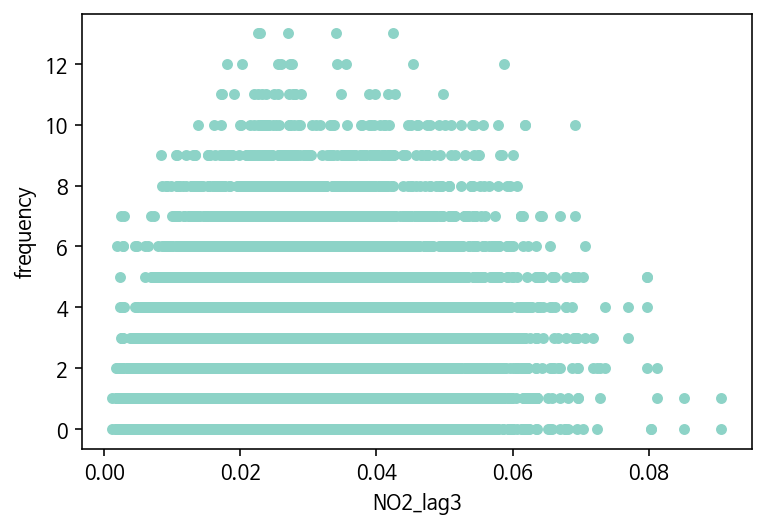

<Figure size 720x360 with 0 Axes>

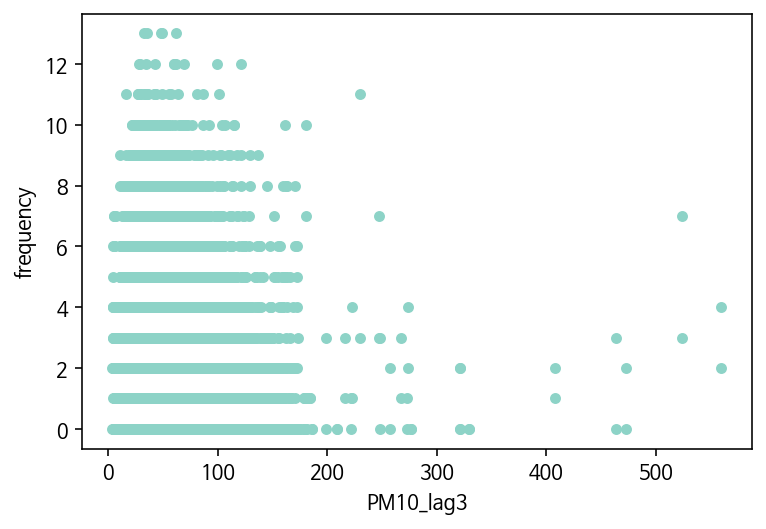

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in air_cols + air_lags:
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 

#### 예보 변수

<Figure size 720x360 with 0 Axes>

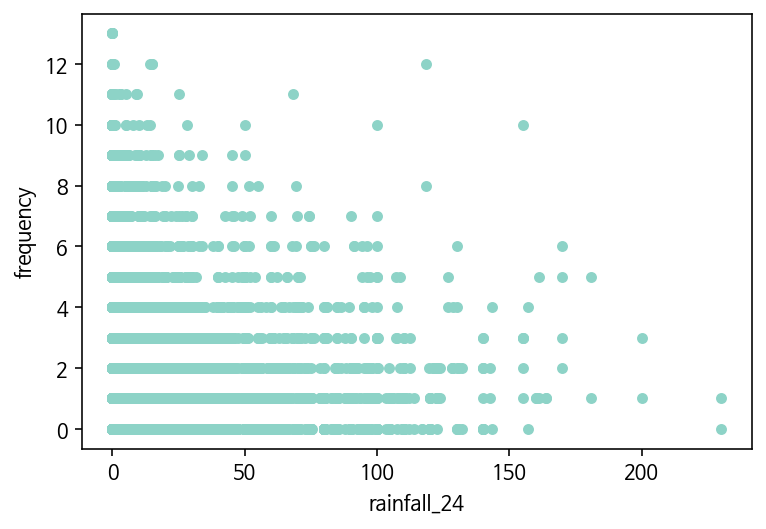

<Figure size 720x360 with 0 Axes>

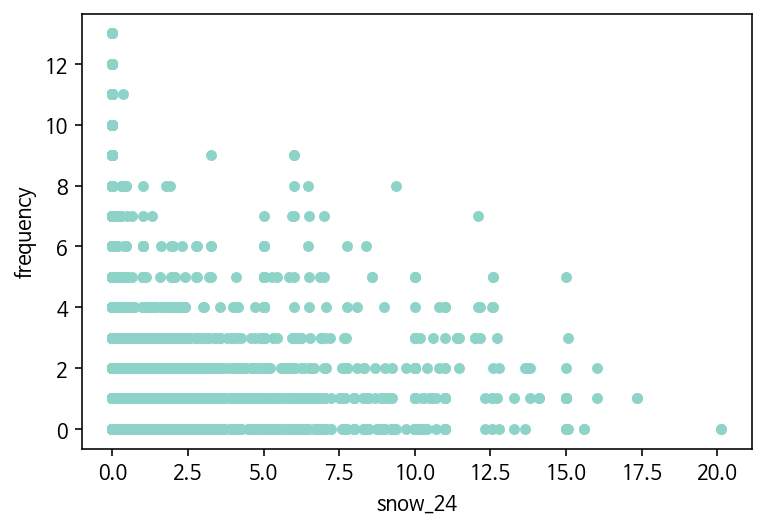

<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


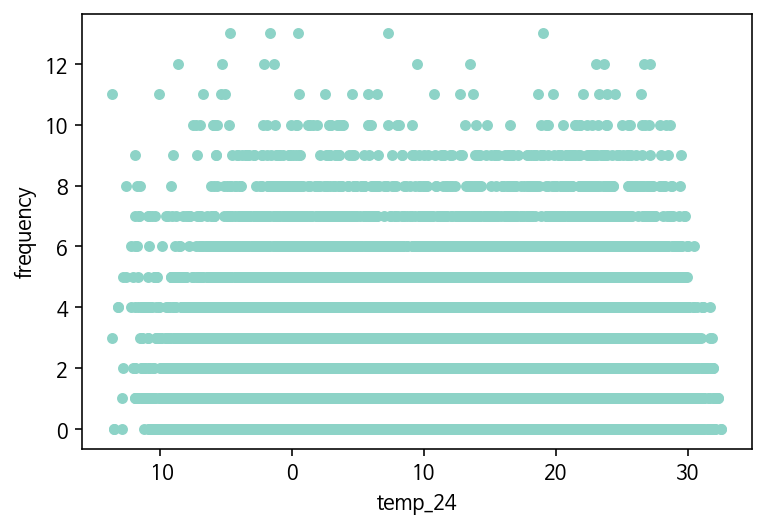

<Figure size 720x360 with 0 Axes>

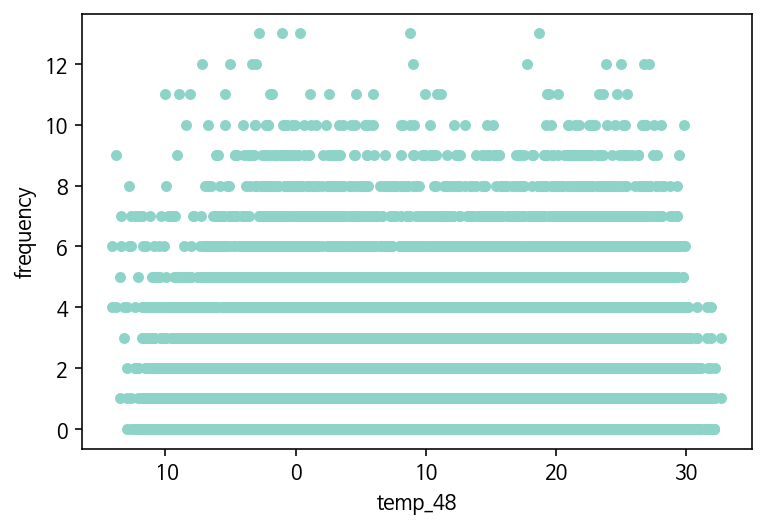

<Figure size 720x360 with 0 Axes>

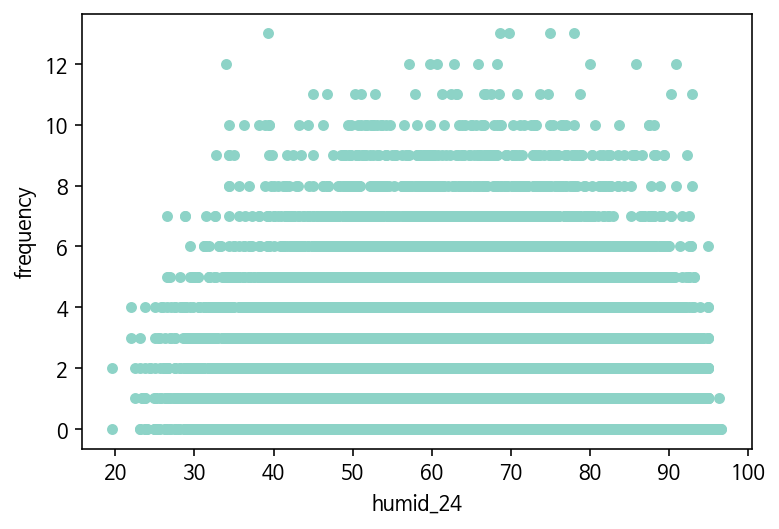

<Figure size 720x360 with 0 Axes>

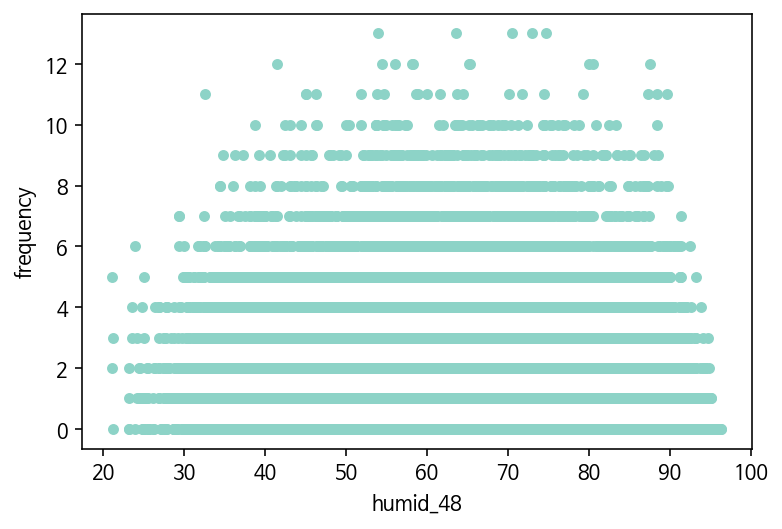

<Figure size 720x360 with 0 Axes>

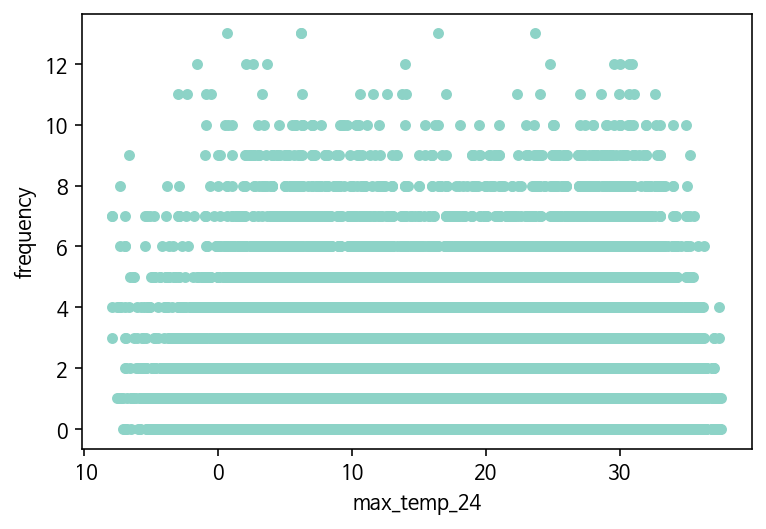

<Figure size 720x360 with 0 Axes>

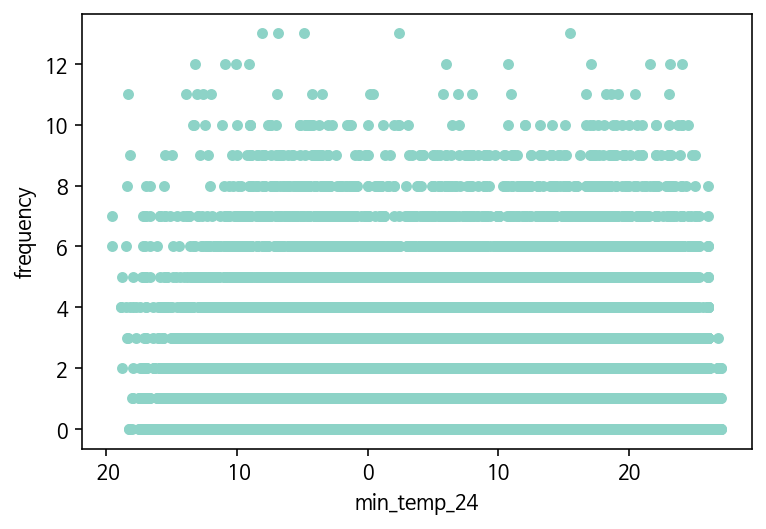

<Figure size 720x360 with 0 Axes>

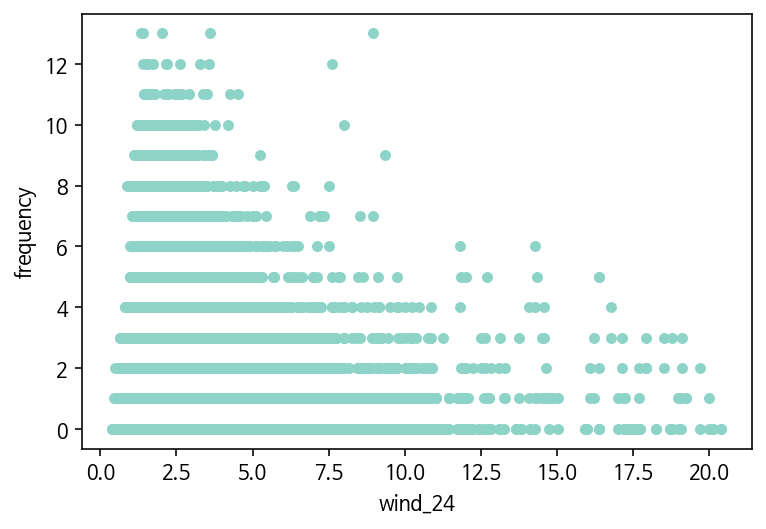

<Figure size 720x360 with 0 Axes>

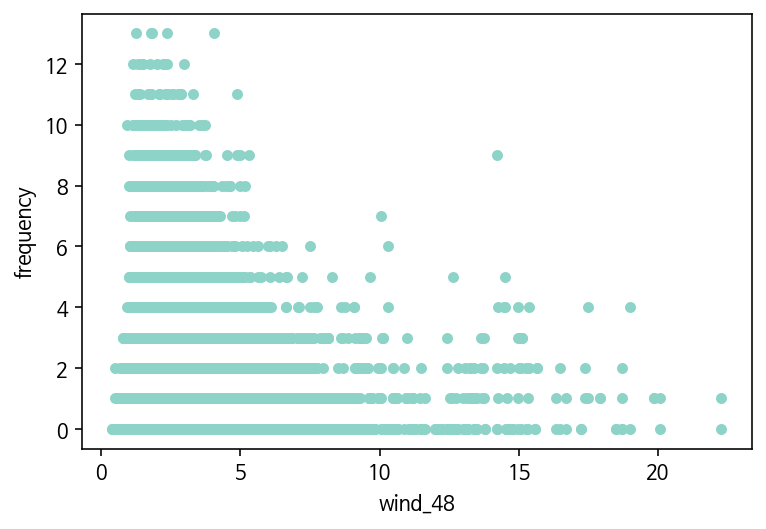

<Figure size 720x360 with 0 Axes>

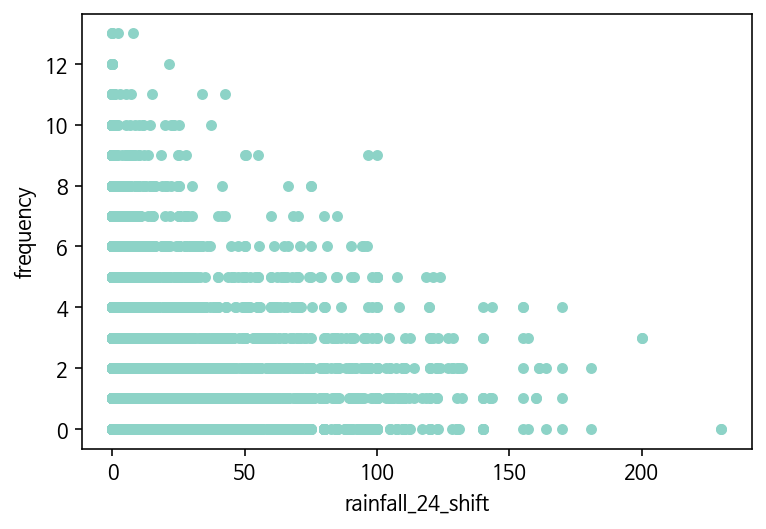

<Figure size 720x360 with 0 Axes>

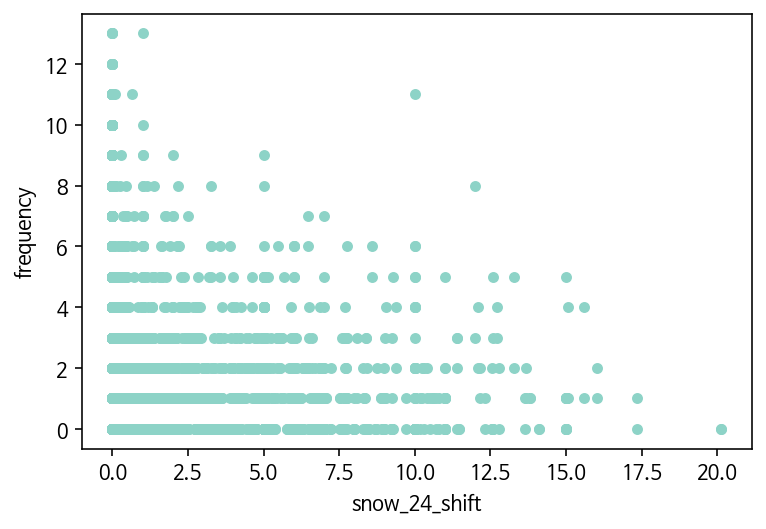

<Figure size 720x360 with 0 Axes>

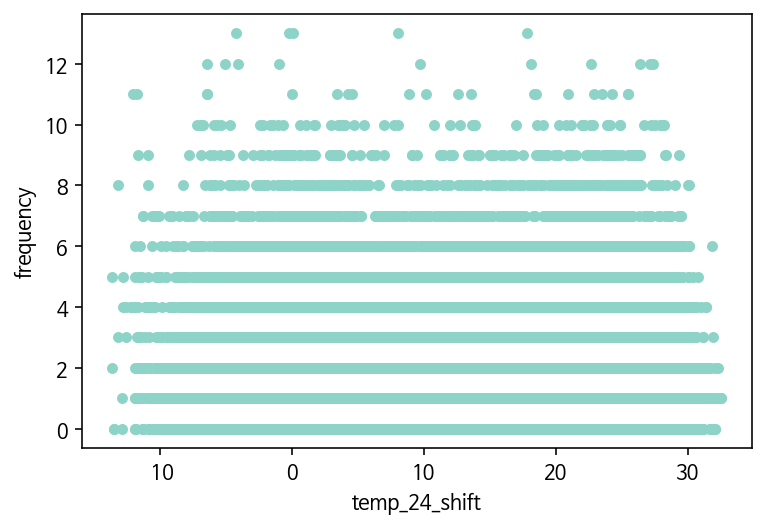

<Figure size 720x360 with 0 Axes>

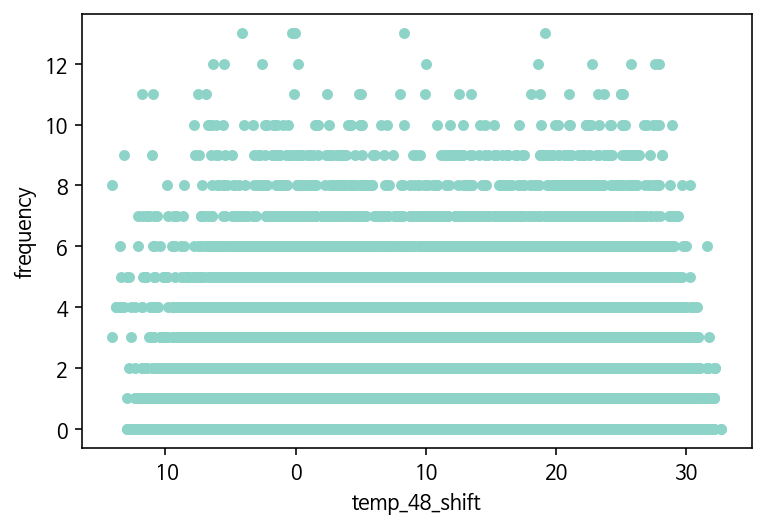

<Figure size 720x360 with 0 Axes>

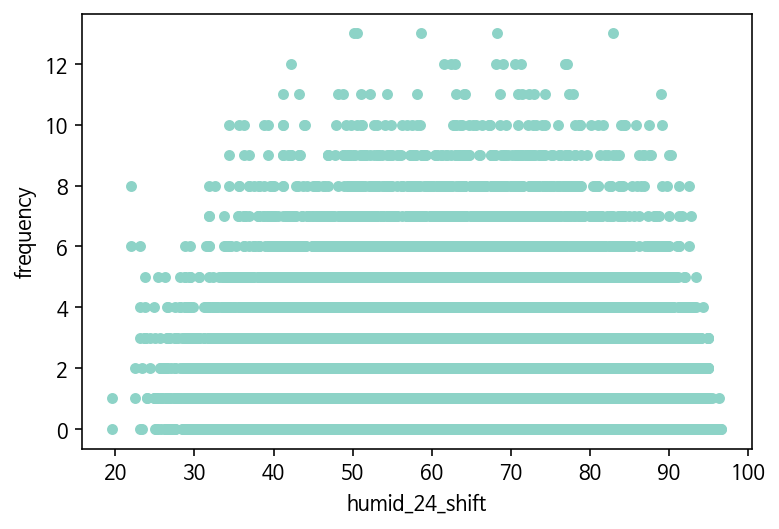

<Figure size 720x360 with 0 Axes>

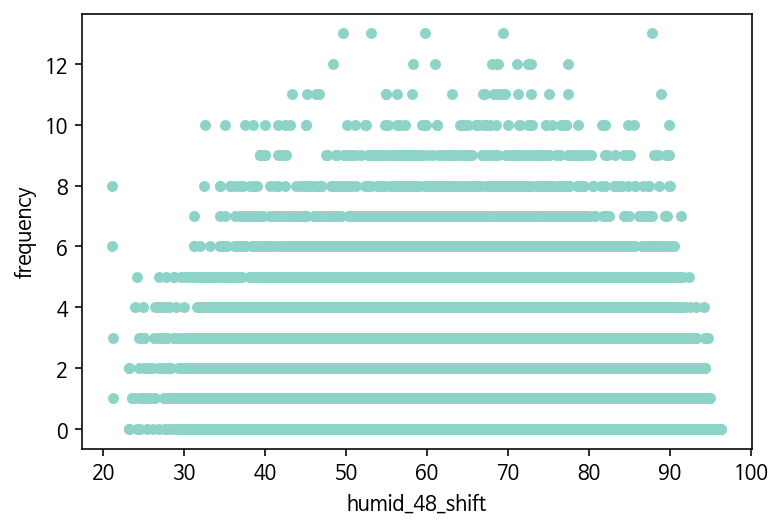

<Figure size 720x360 with 0 Axes>

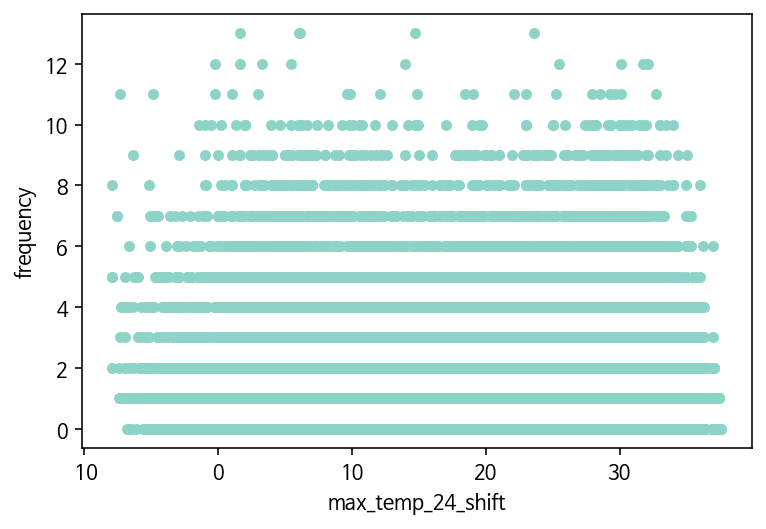

<Figure size 720x360 with 0 Axes>

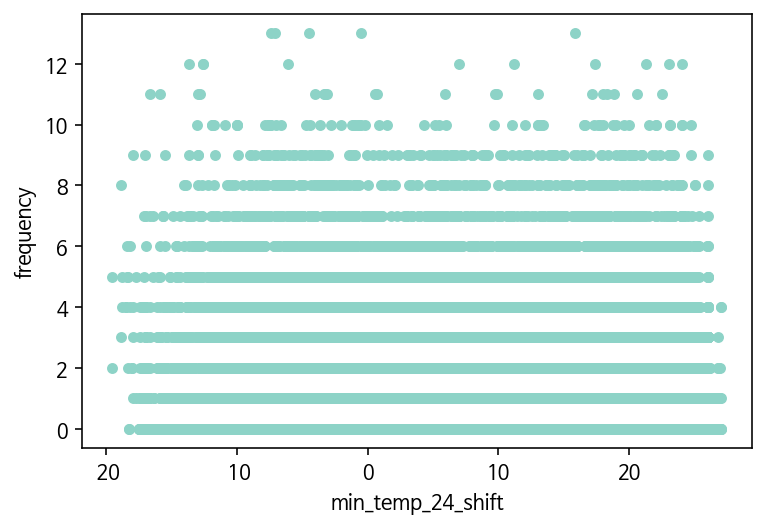

<Figure size 720x360 with 0 Axes>

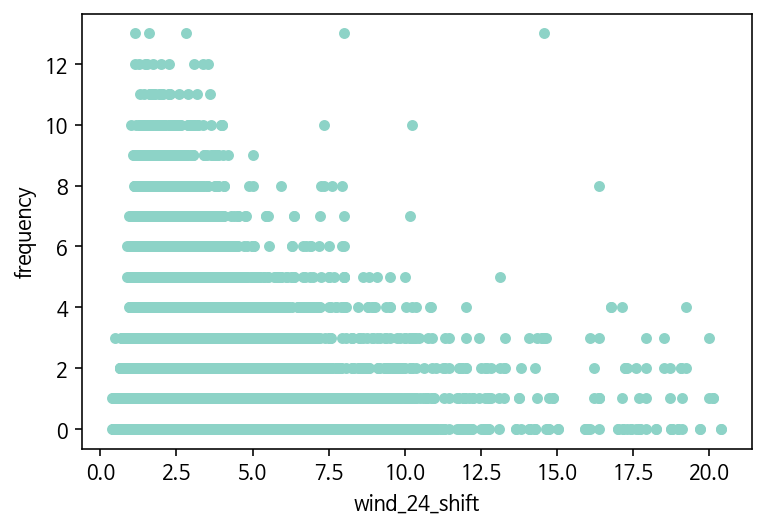

<Figure size 720x360 with 0 Axes>

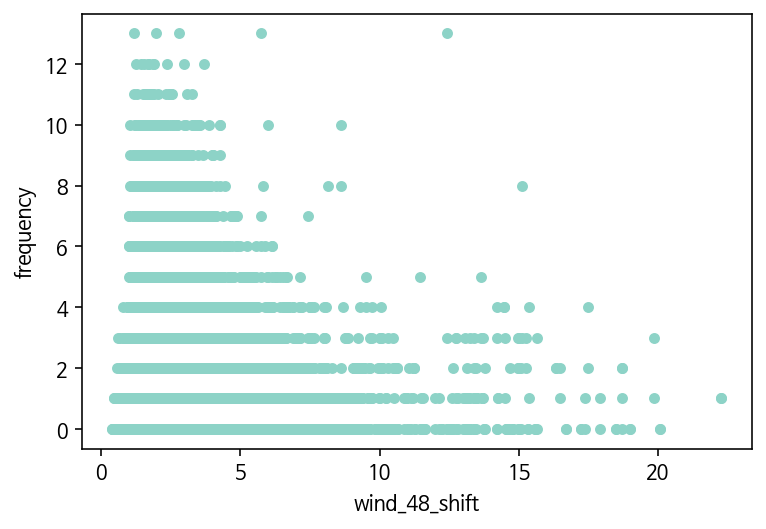

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in forecast_cols + forecast_shift:
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 

#### 질환력 변수

<Figure size 720x360 with 0 Axes>

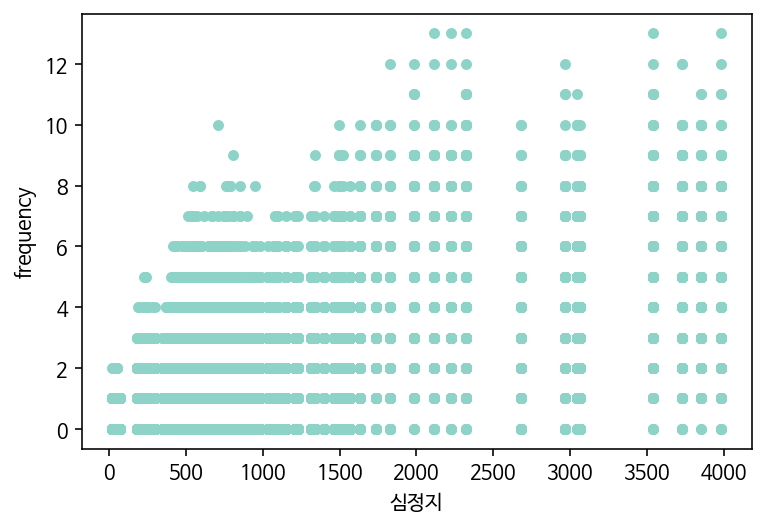

<Figure size 720x360 with 0 Axes>

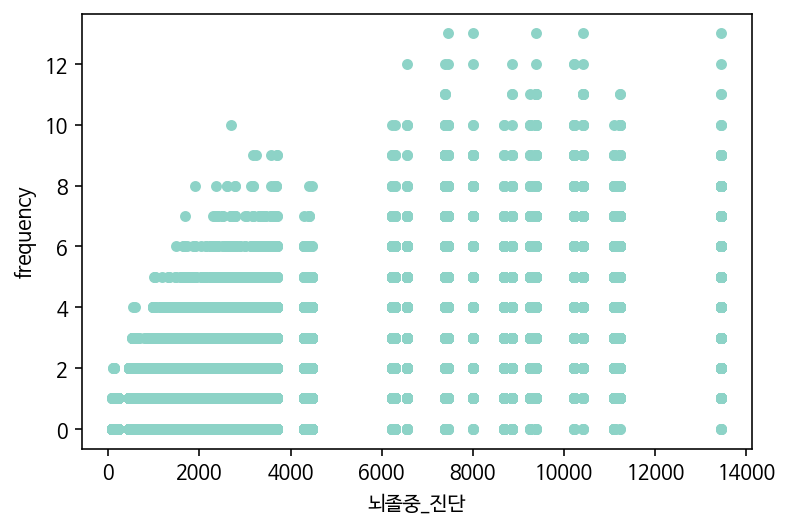

<Figure size 720x360 with 0 Axes>

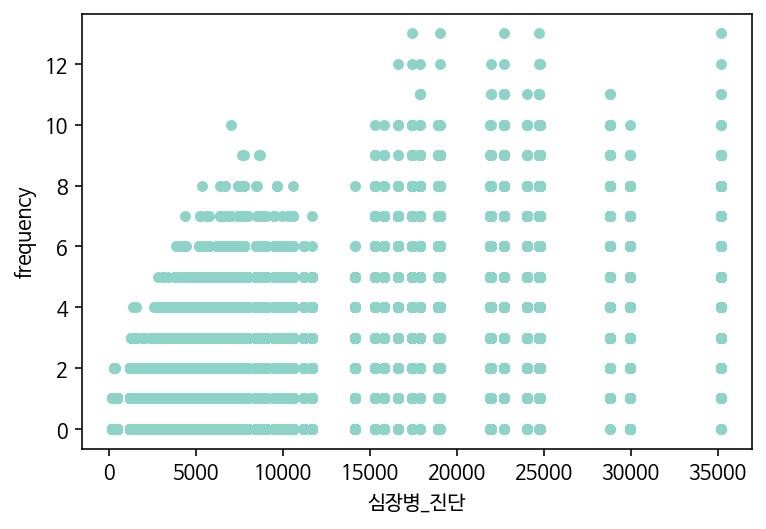

<Figure size 720x360 with 0 Axes>

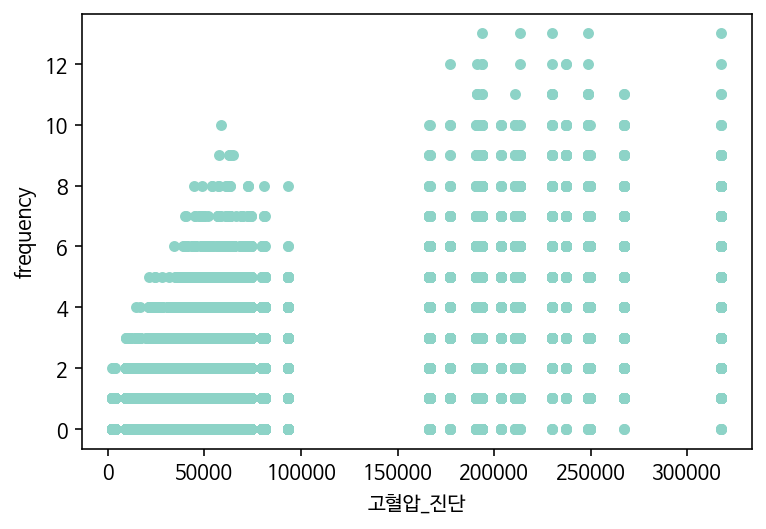

<Figure size 720x360 with 0 Axes>

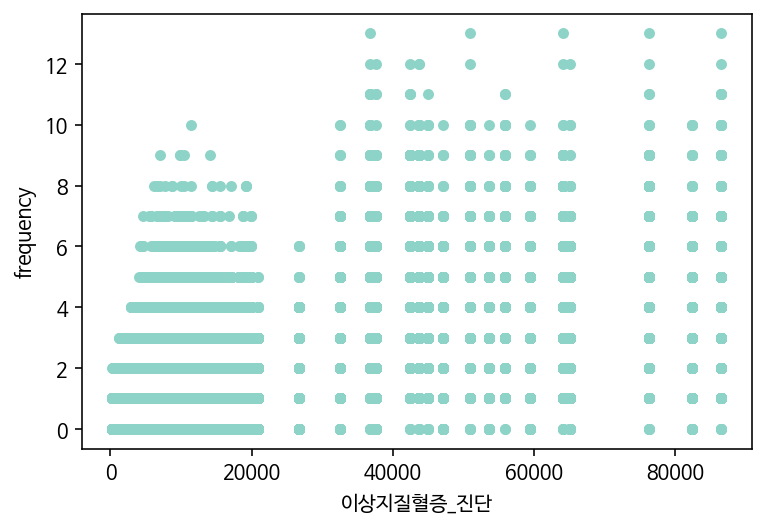

<Figure size 720x360 with 0 Axes>

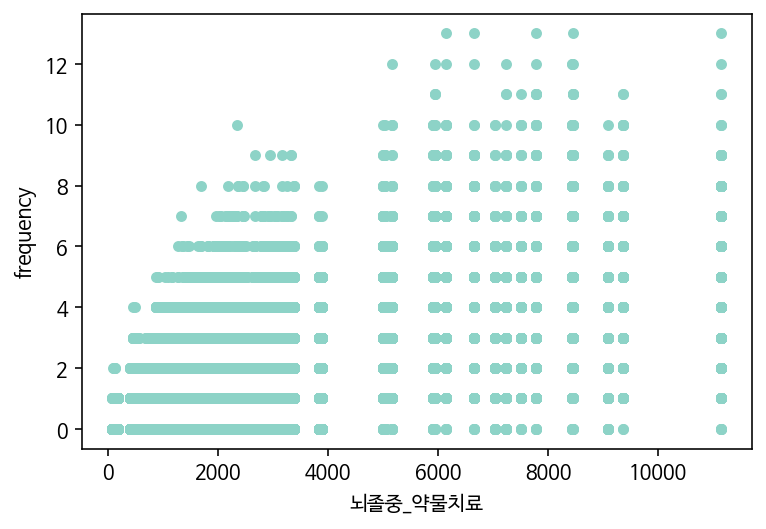

<Figure size 720x360 with 0 Axes>

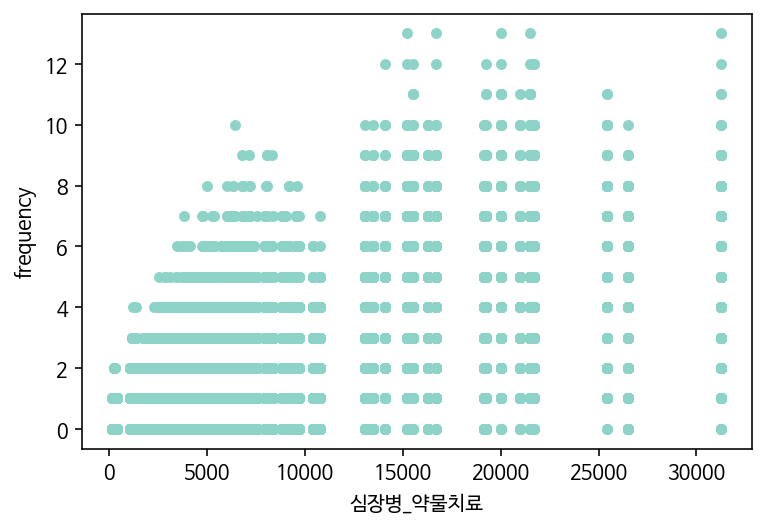

<Figure size 720x360 with 0 Axes>

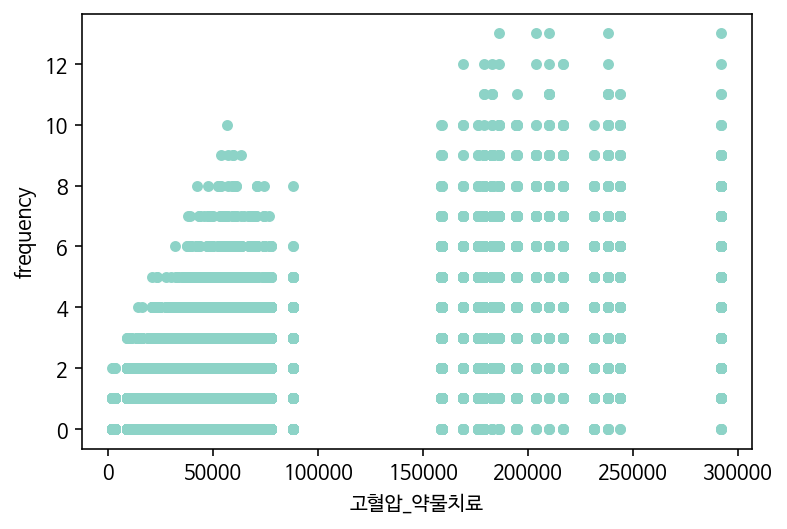

<Figure size 720x360 with 0 Axes>

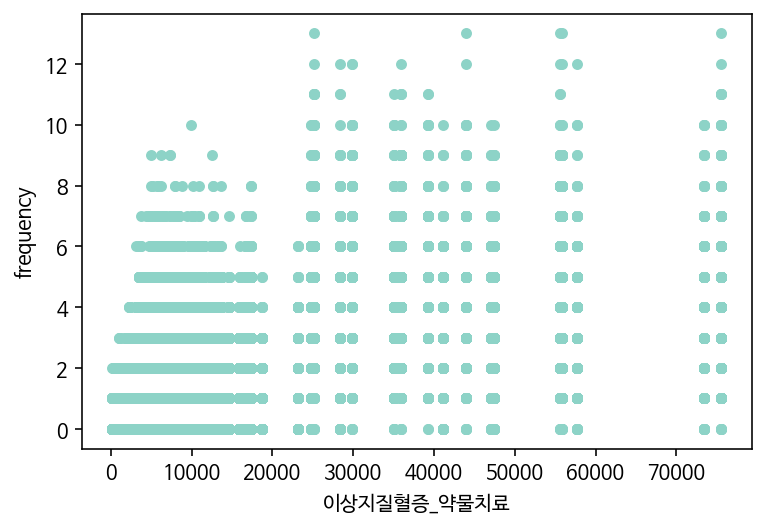

<Figure size 720x360 with 0 Axes>

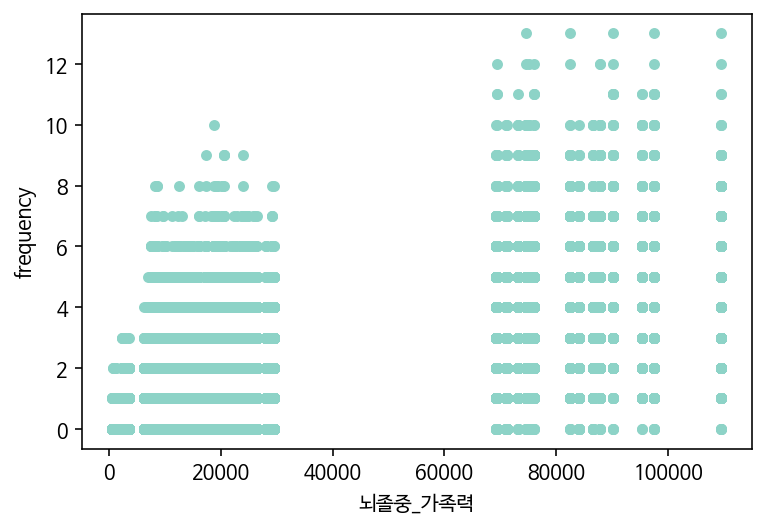

<Figure size 720x360 with 0 Axes>

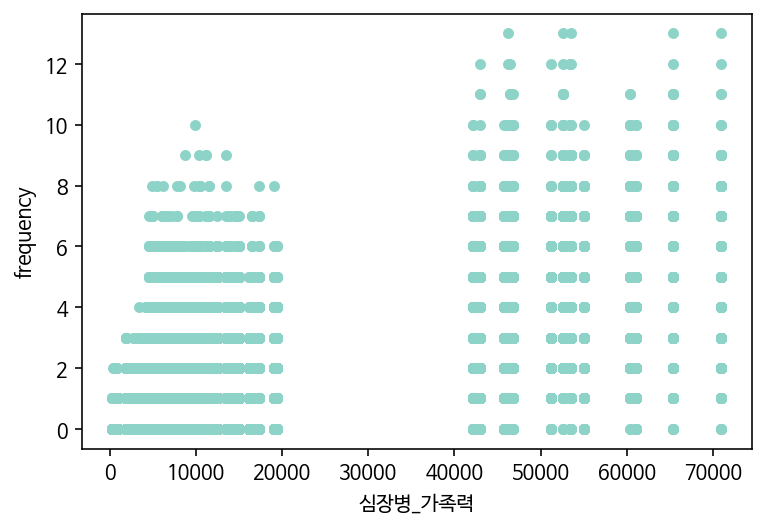

<Figure size 720x360 with 0 Axes>

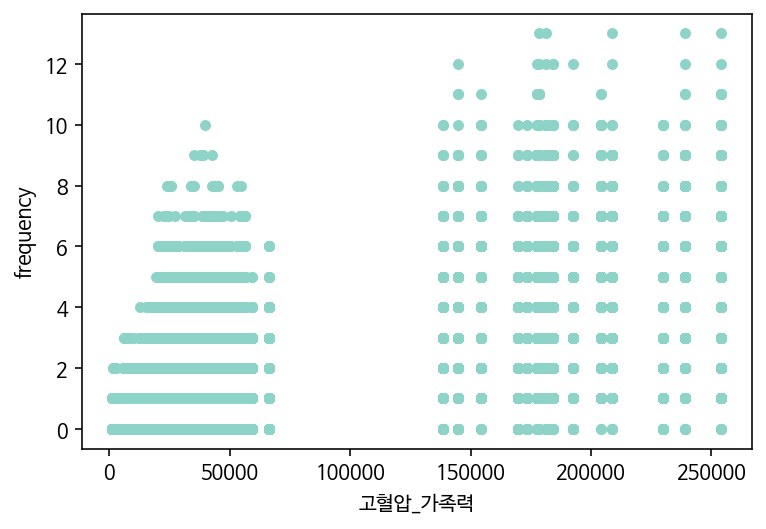

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in disease_cols :
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 


#### 기타 보건 변수

<Figure size 720x360 with 0 Axes>

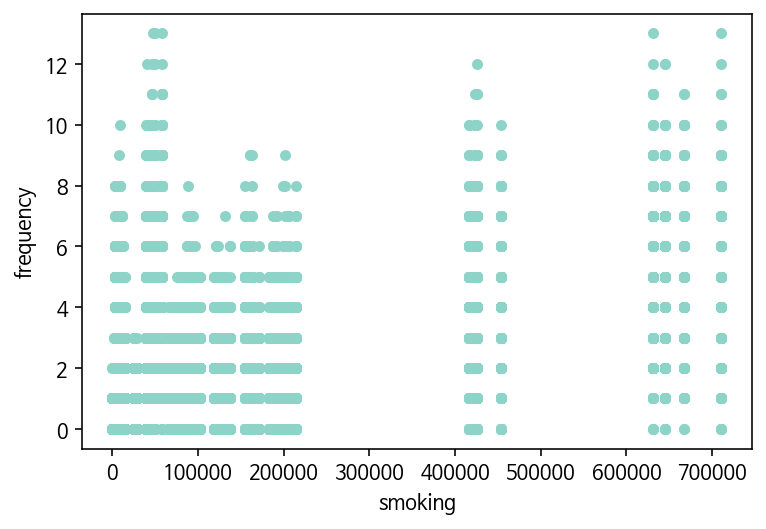

<Figure size 720x360 with 0 Axes>

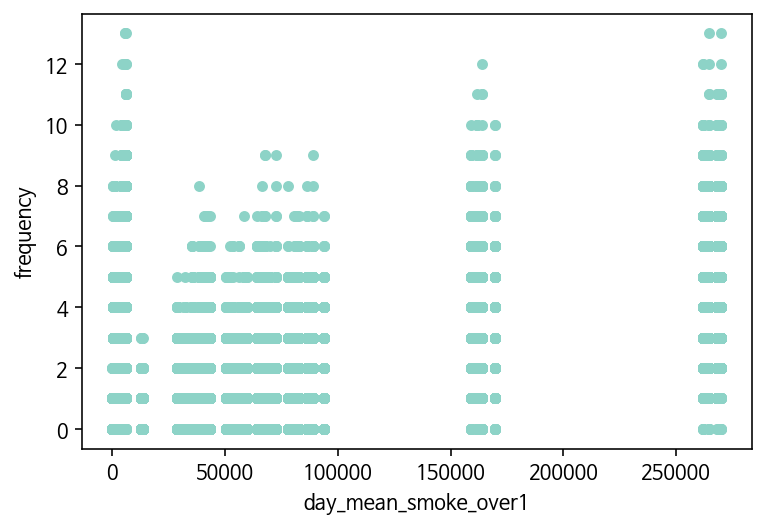

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in health_cols :
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 


#### 생활지수

<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


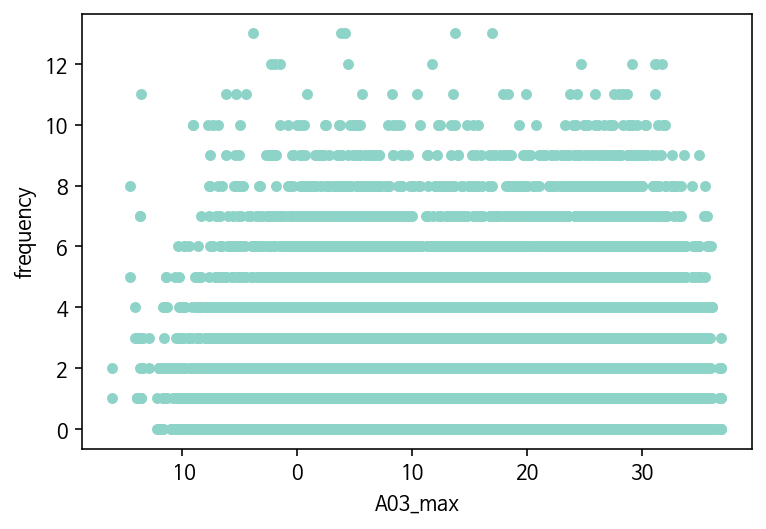

<Figure size 720x360 with 0 Axes>

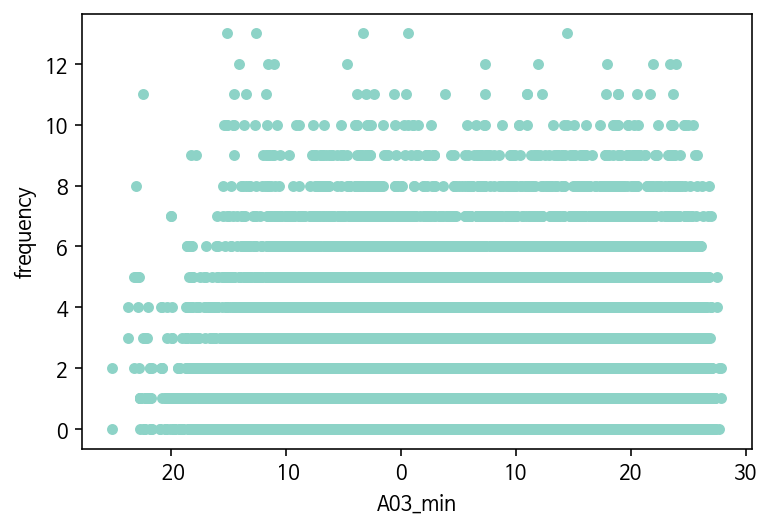

<Figure size 720x360 with 0 Axes>

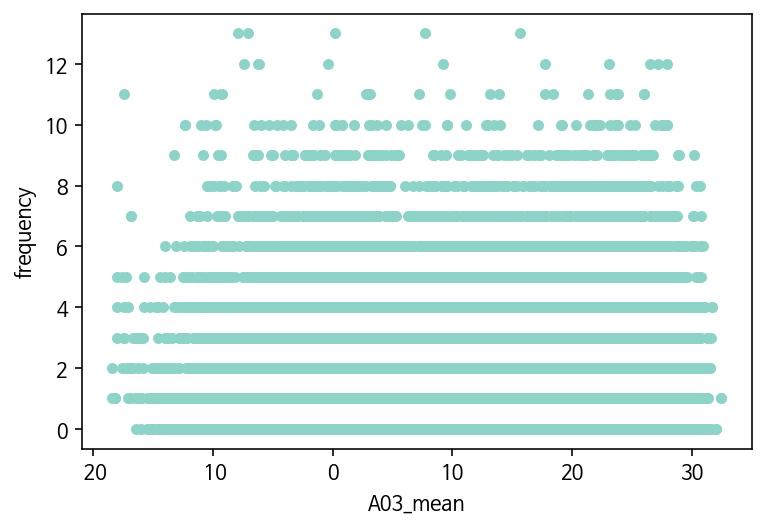

<Figure size 720x360 with 0 Axes>

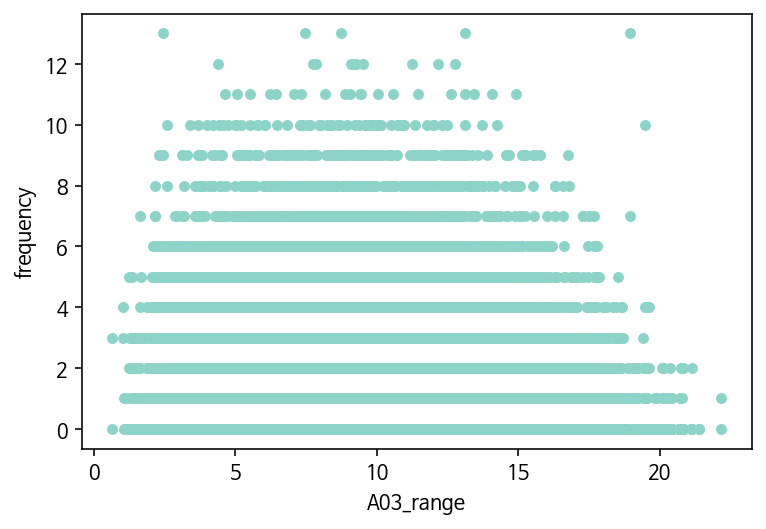

<Figure size 720x360 with 0 Axes>

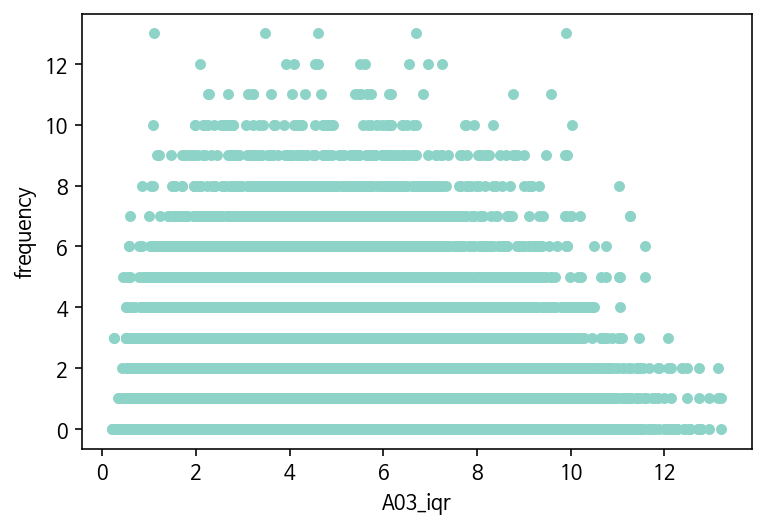

<Figure size 720x360 with 0 Axes>

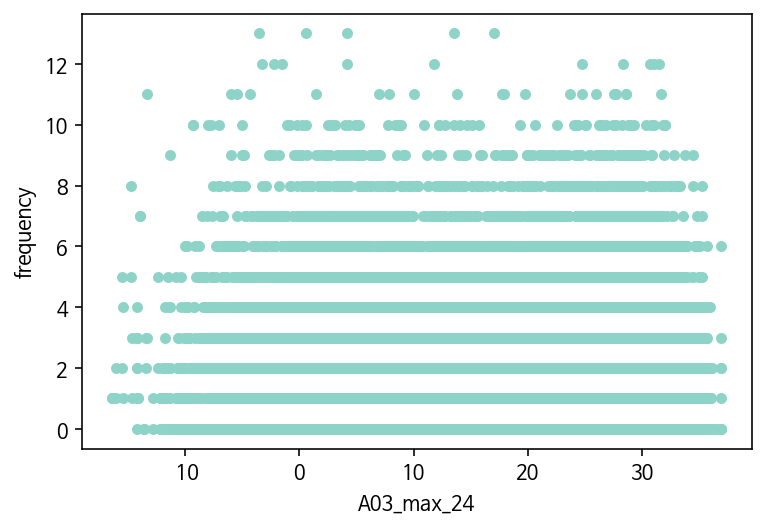

<Figure size 720x360 with 0 Axes>

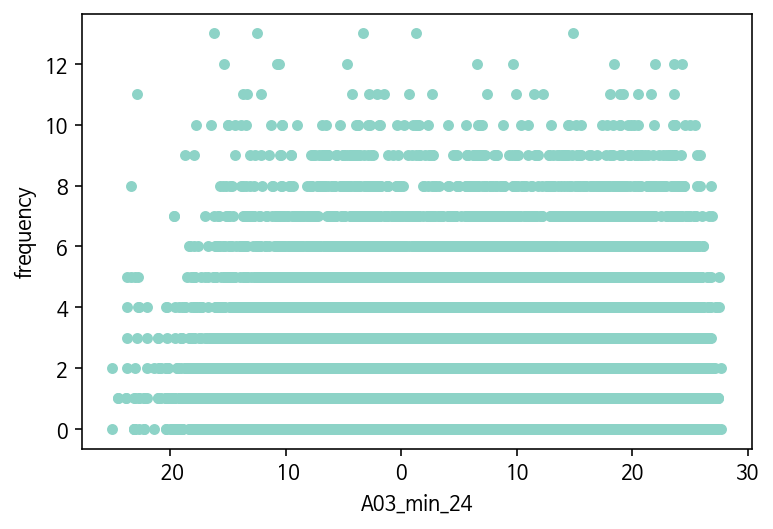

<Figure size 720x360 with 0 Axes>

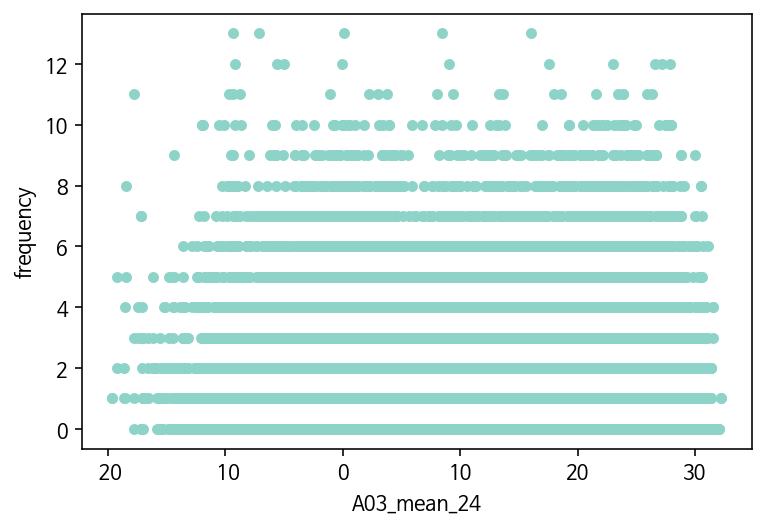

<Figure size 720x360 with 0 Axes>

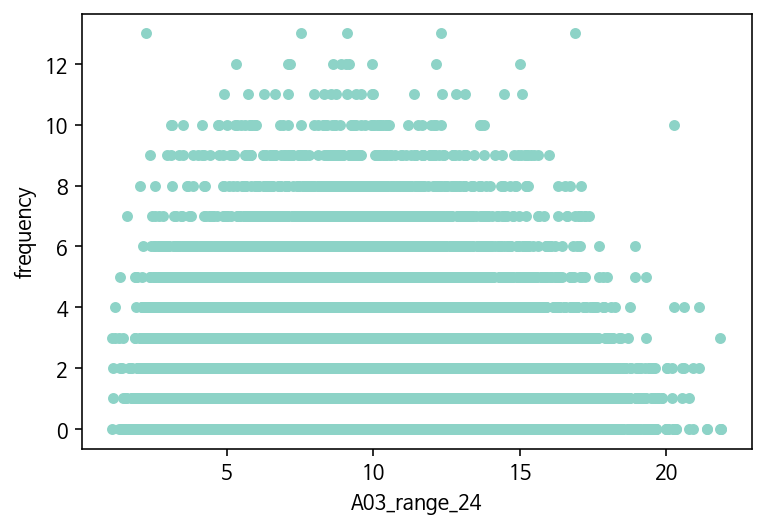

<Figure size 720x360 with 0 Axes>

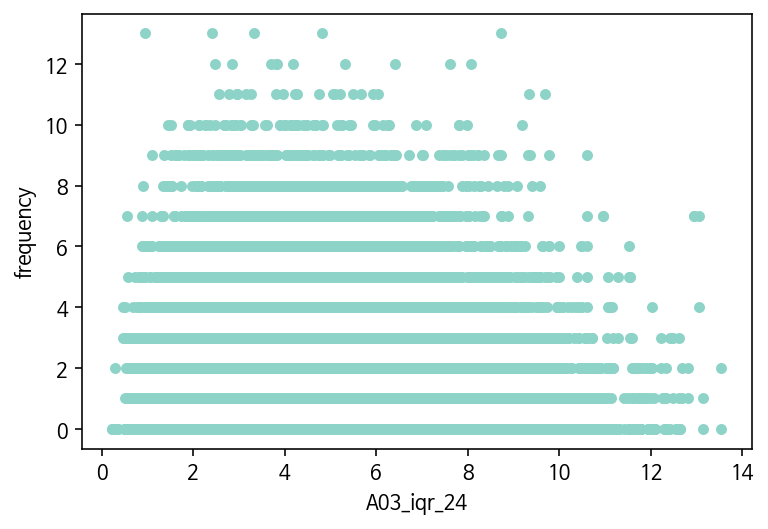

<Figure size 720x360 with 0 Axes>

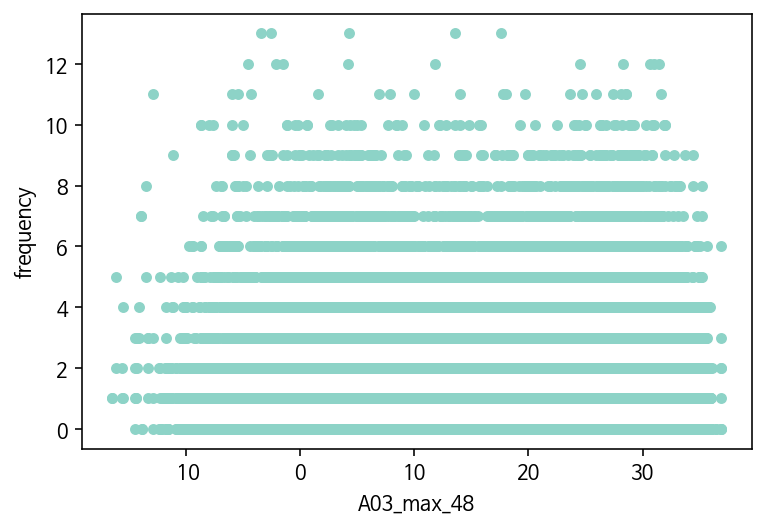

<Figure size 720x360 with 0 Axes>

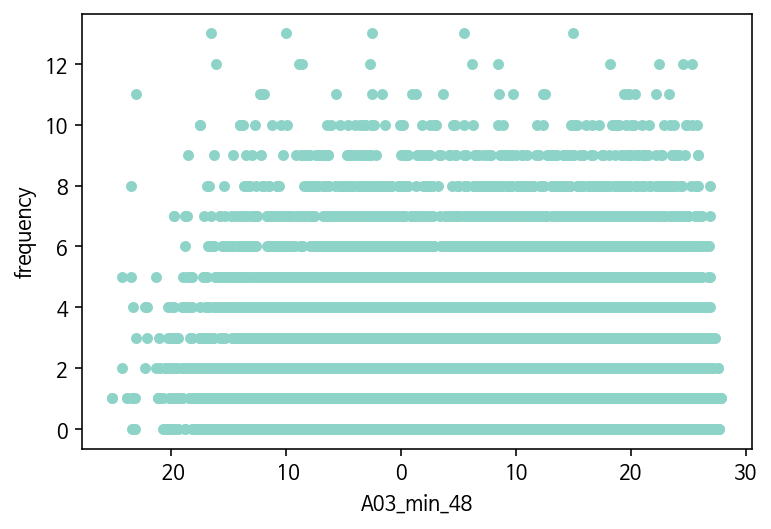

<Figure size 720x360 with 0 Axes>

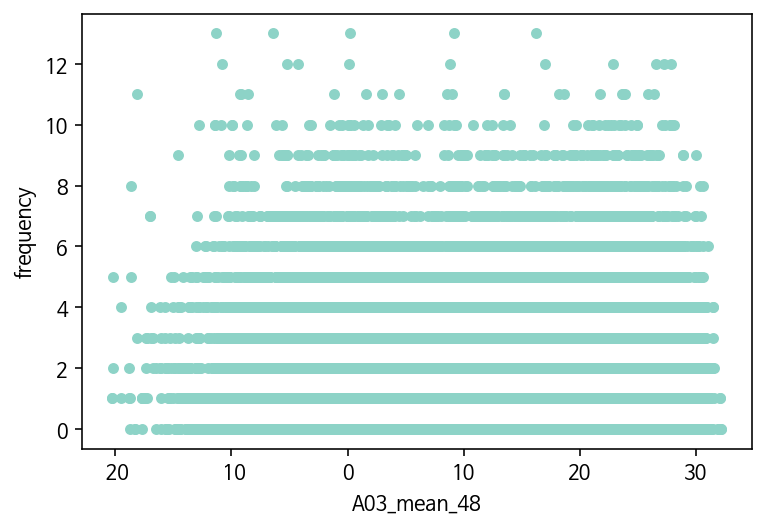

<Figure size 720x360 with 0 Axes>

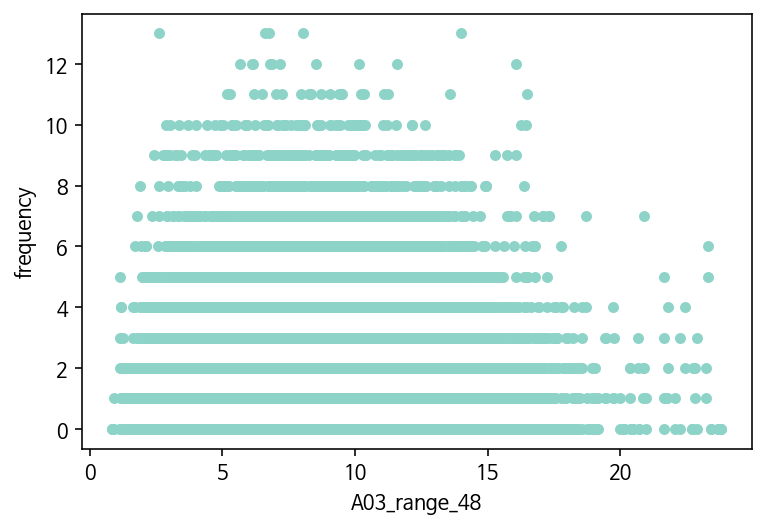

<Figure size 720x360 with 0 Axes>

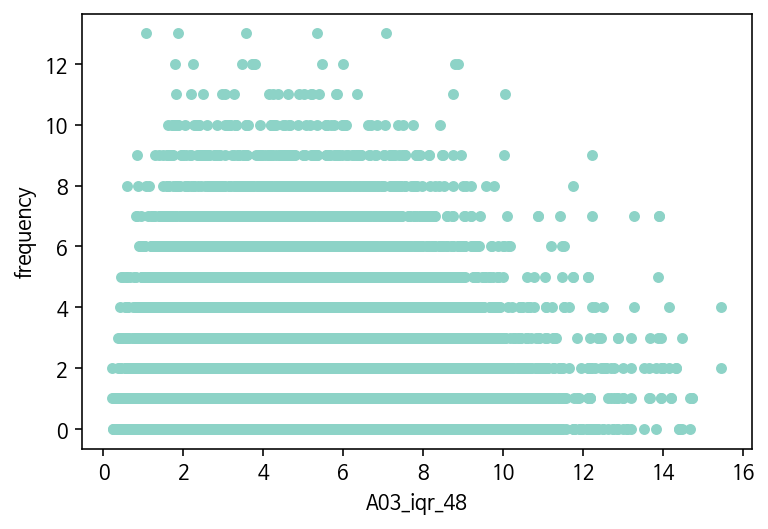

<Figure size 720x360 with 0 Axes>

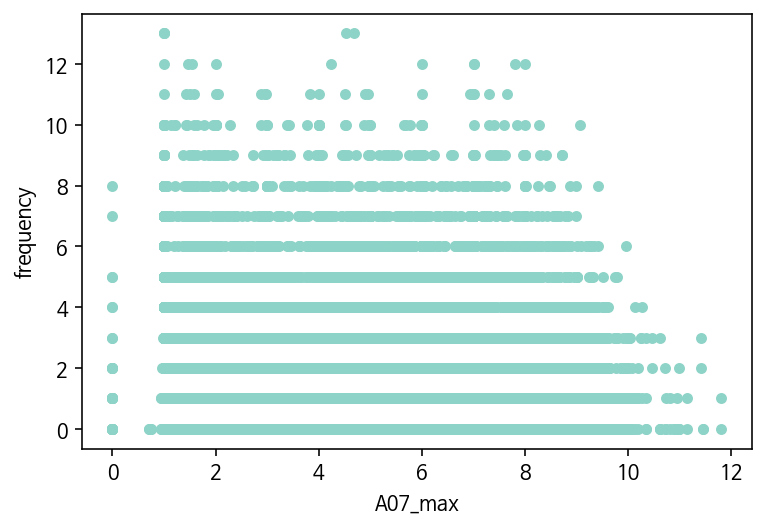

<Figure size 720x360 with 0 Axes>

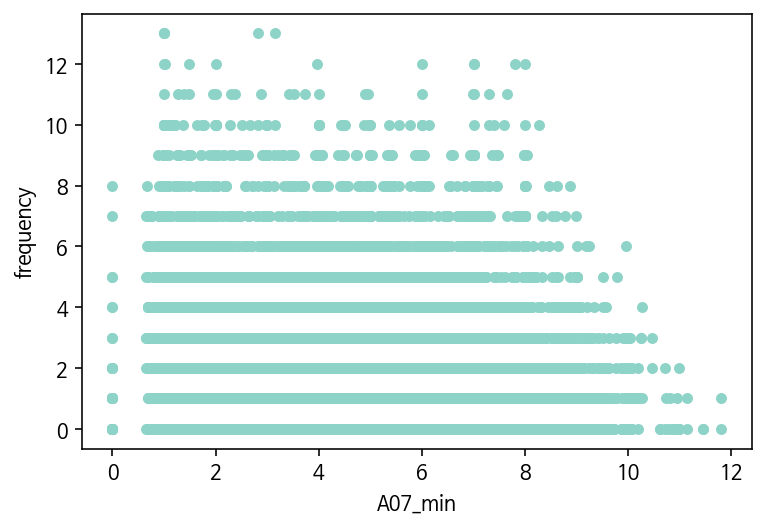

<Figure size 720x360 with 0 Axes>

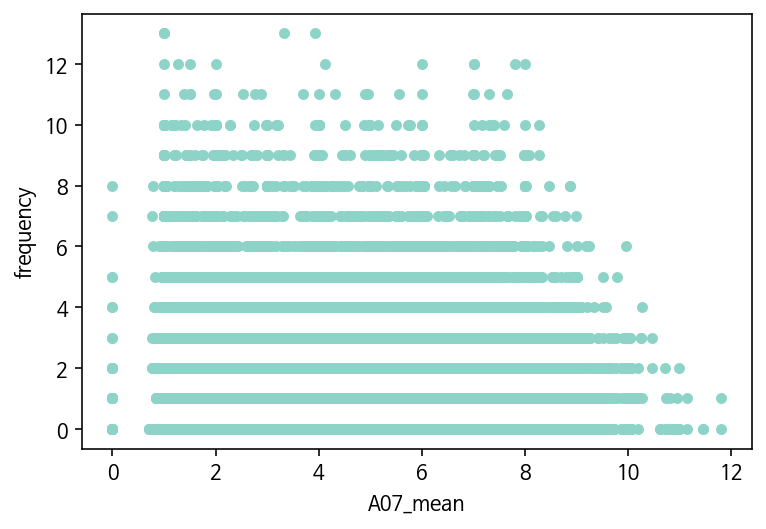

<Figure size 720x360 with 0 Axes>

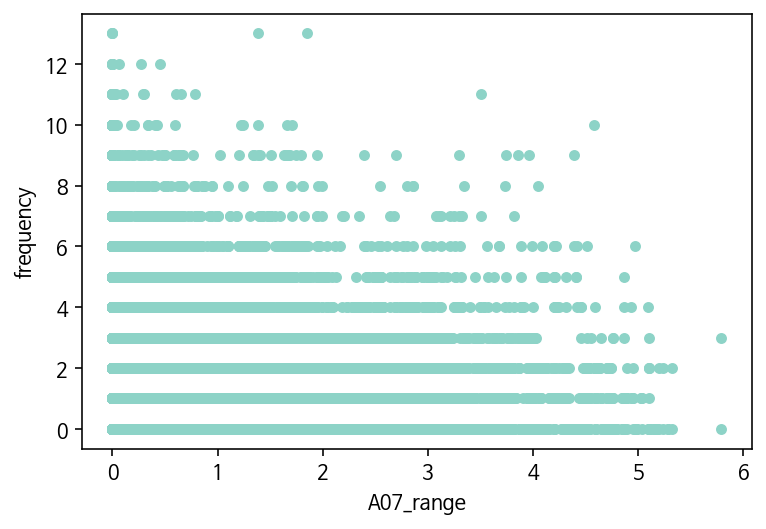

<Figure size 720x360 with 0 Axes>

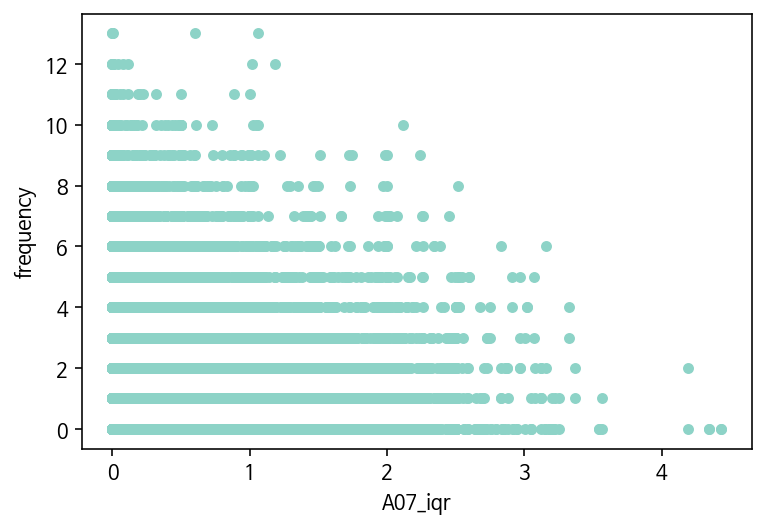

<Figure size 720x360 with 0 Axes>

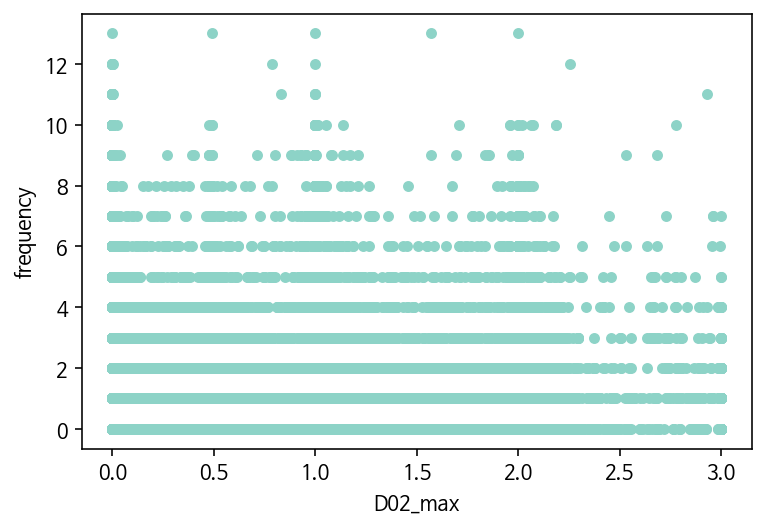

<Figure size 720x360 with 0 Axes>

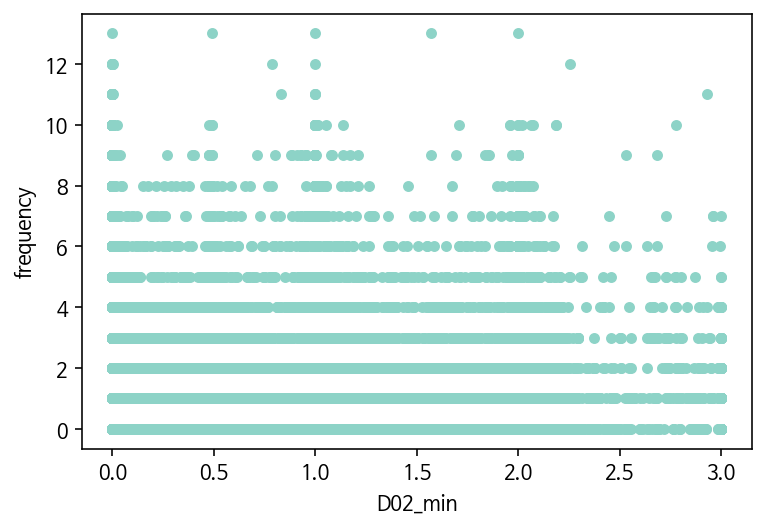

<Figure size 720x360 with 0 Axes>

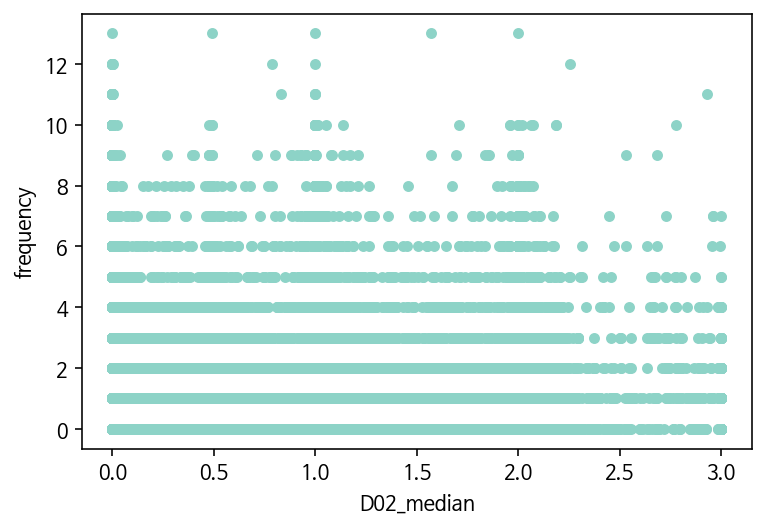

<Figure size 720x360 with 0 Axes>

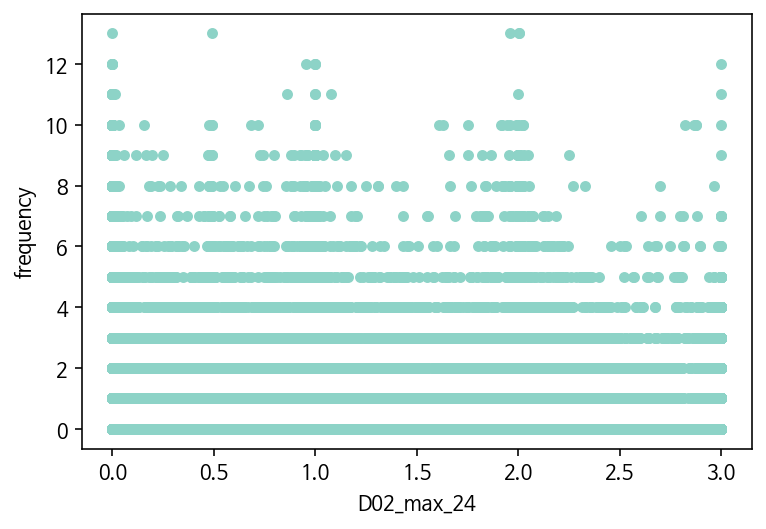

<Figure size 720x360 with 0 Axes>

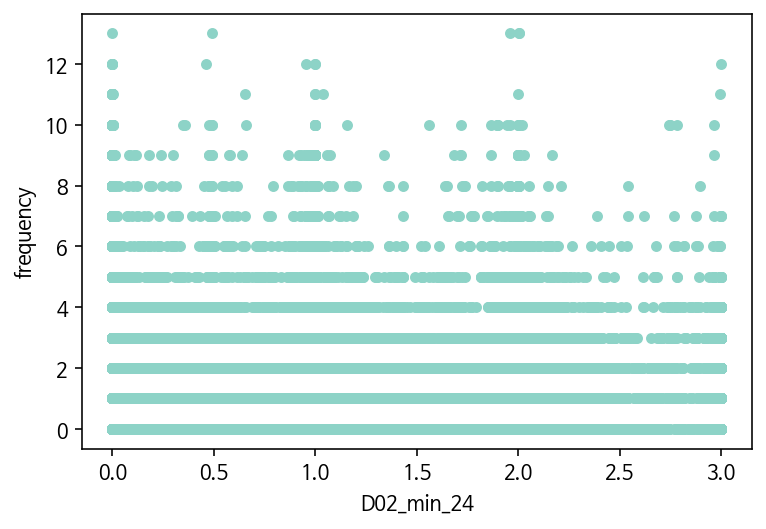

<Figure size 720x360 with 0 Axes>

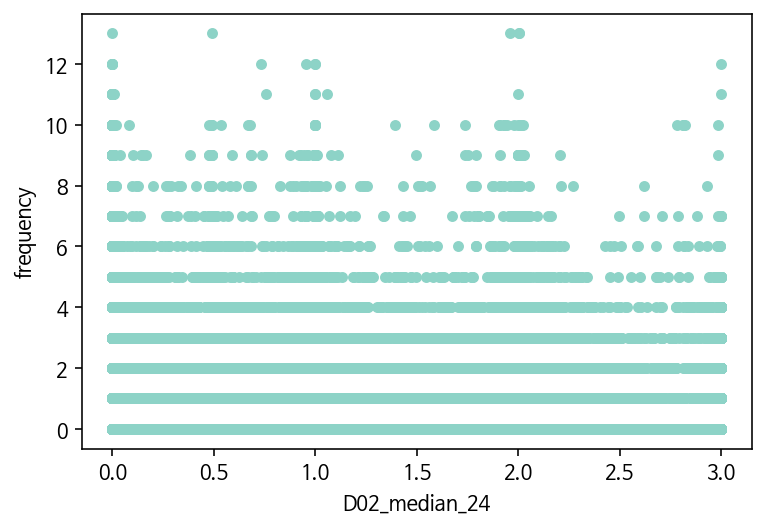

<Figure size 720x360 with 0 Axes>

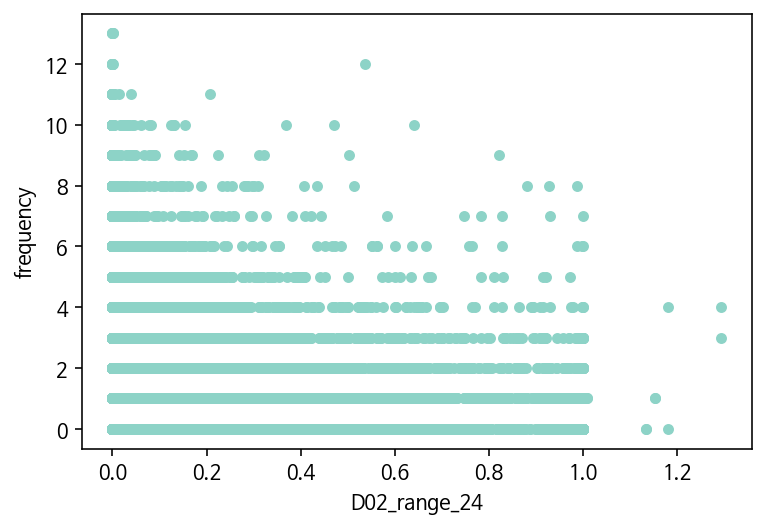

<Figure size 720x360 with 0 Axes>

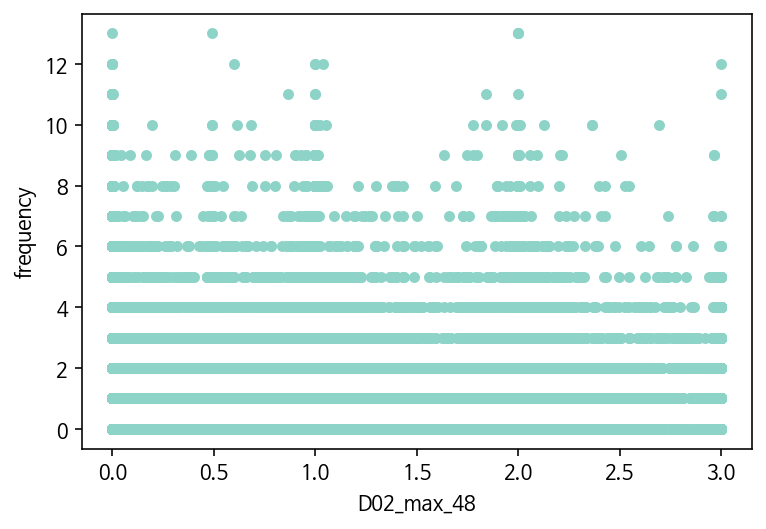

<Figure size 720x360 with 0 Axes>

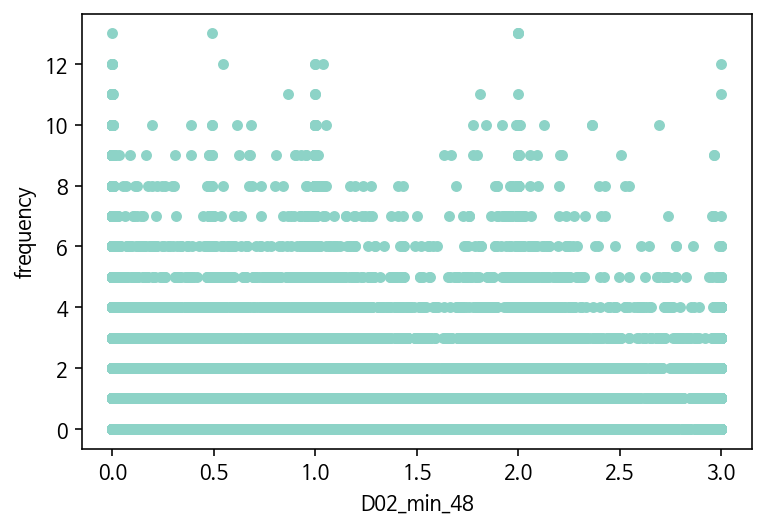

<Figure size 720x360 with 0 Axes>

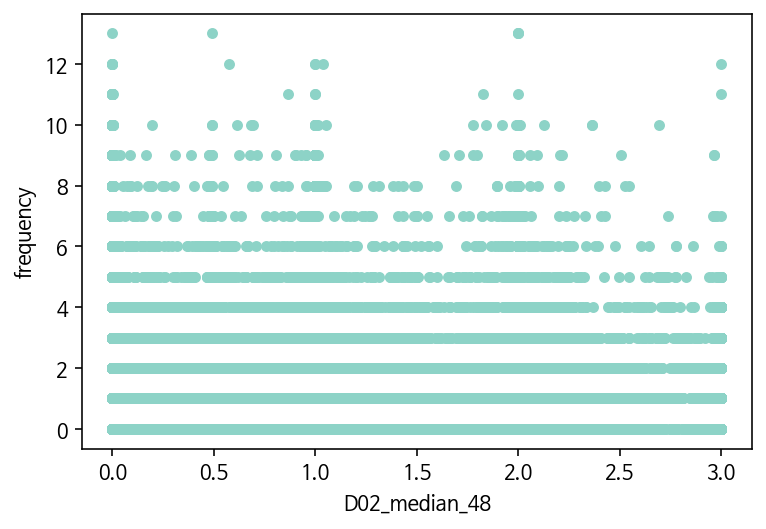

<Figure size 720x360 with 0 Axes>

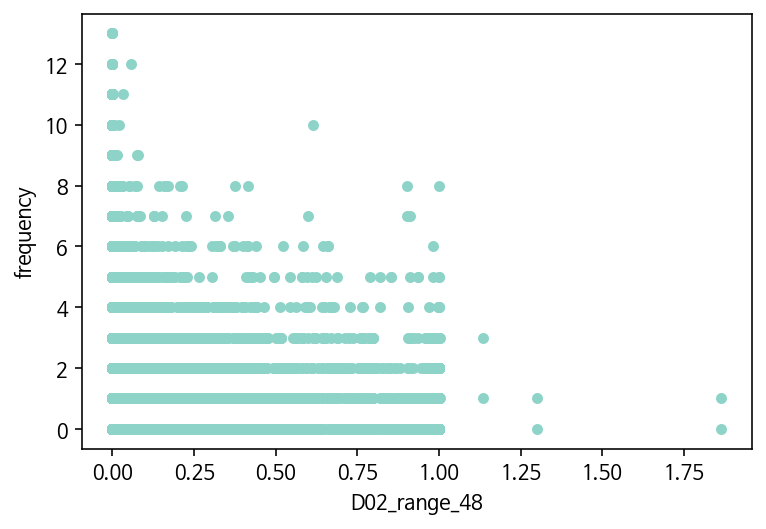

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in index_cols :
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 


#### 지난 7일, 14일 평균 

<Figure size 720x360 with 0 Axes>

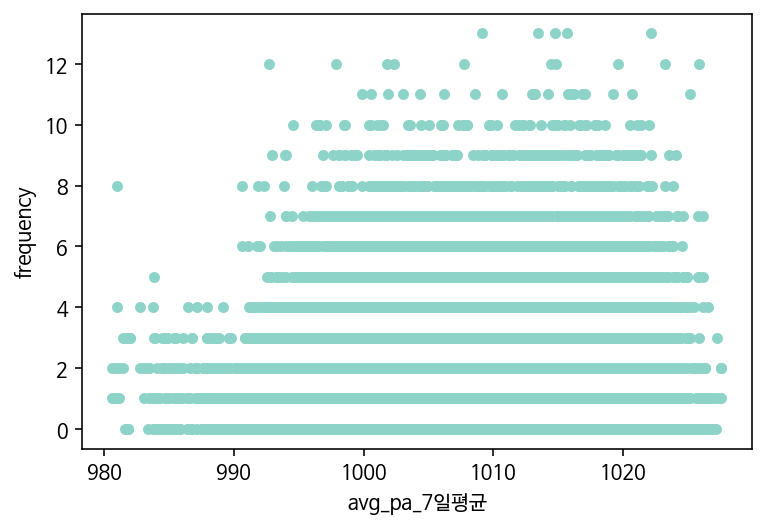

<Figure size 720x360 with 0 Axes>

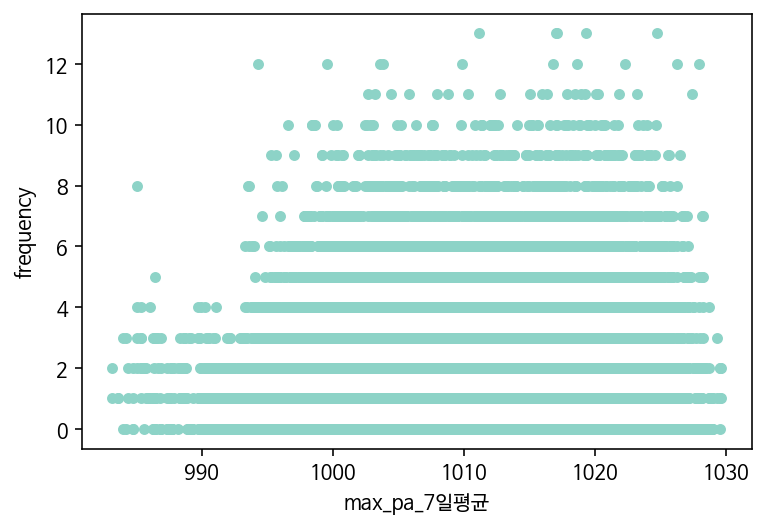

<Figure size 720x360 with 0 Axes>

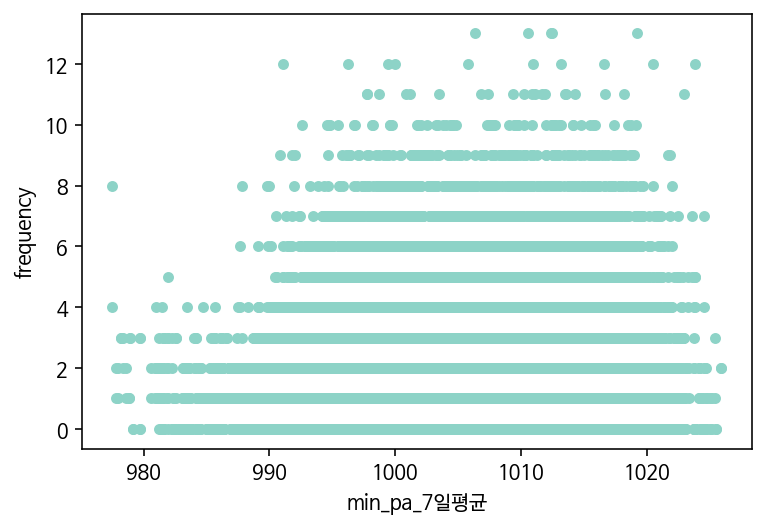

<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


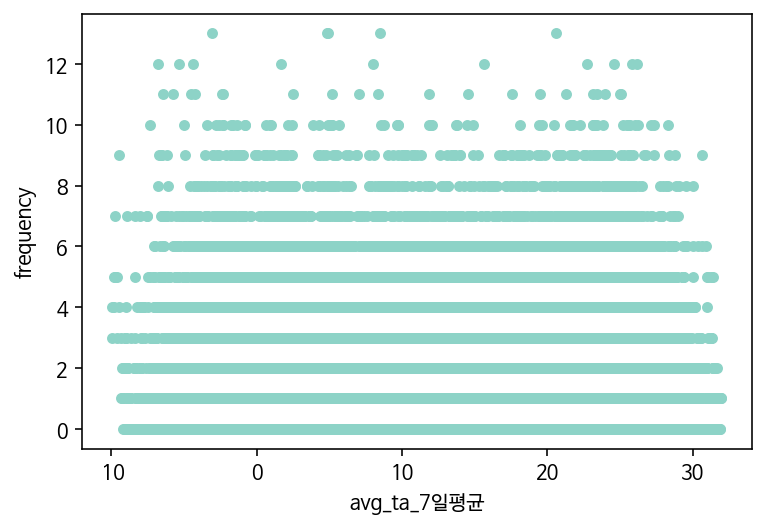

<Figure size 720x360 with 0 Axes>

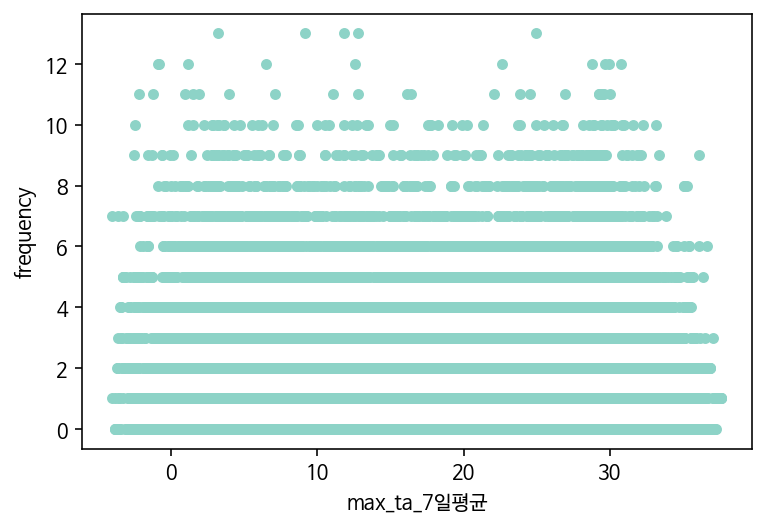

<Figure size 720x360 with 0 Axes>

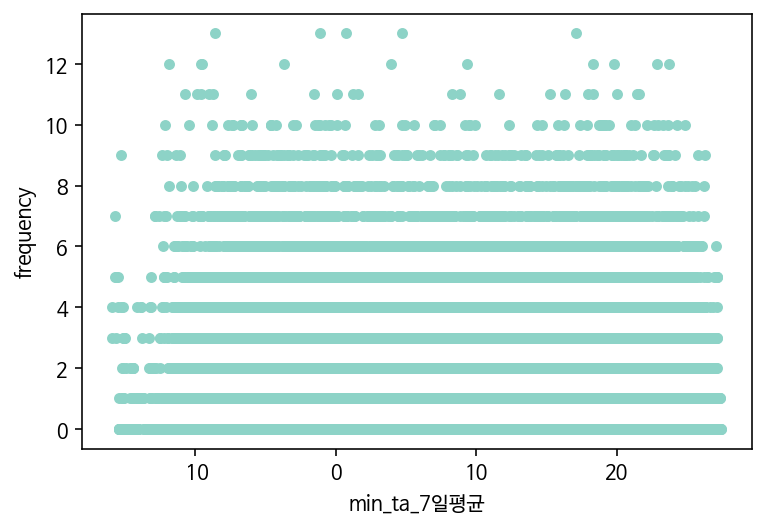

<Figure size 720x360 with 0 Axes>

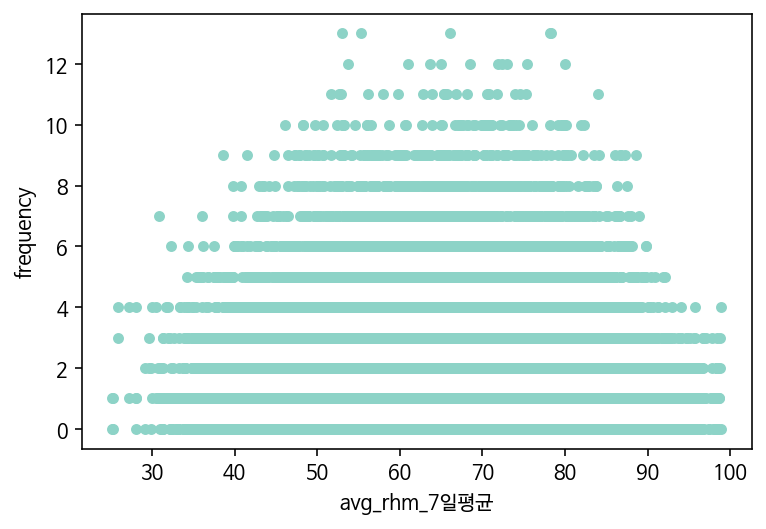

<Figure size 720x360 with 0 Axes>

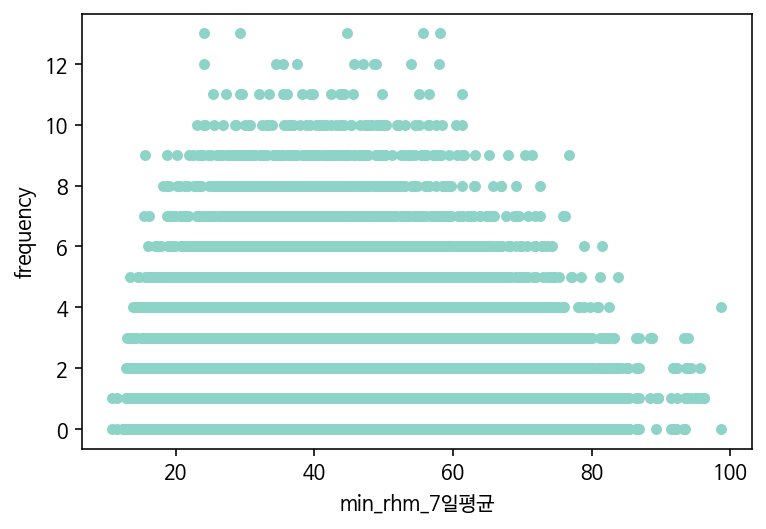

<Figure size 720x360 with 0 Axes>

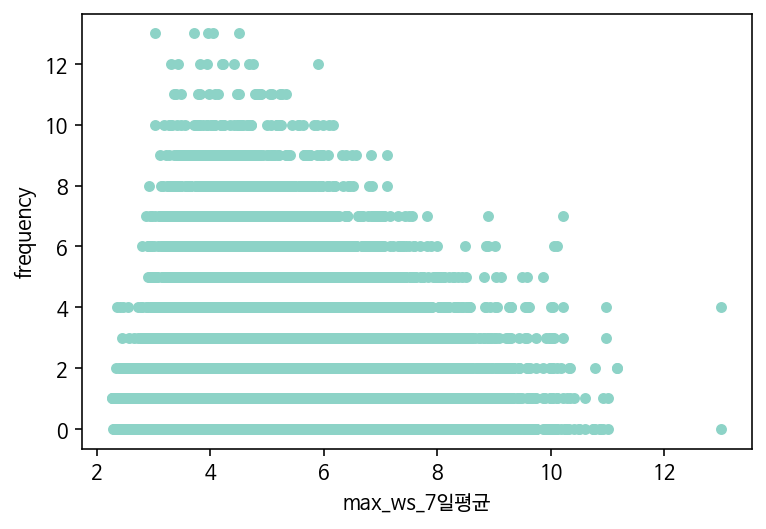

<Figure size 720x360 with 0 Axes>

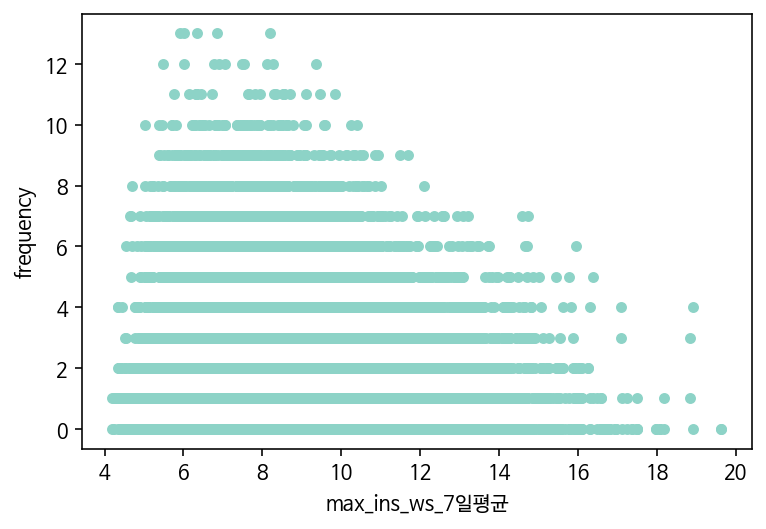

<Figure size 720x360 with 0 Axes>

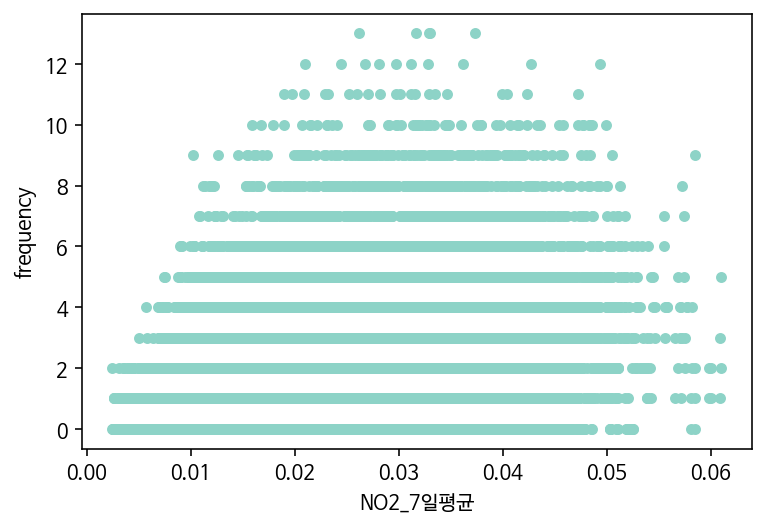

<Figure size 720x360 with 0 Axes>

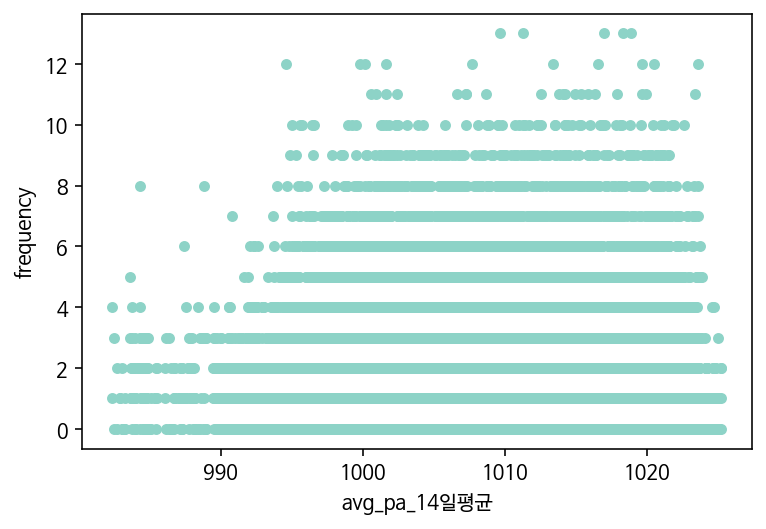

<Figure size 720x360 with 0 Axes>

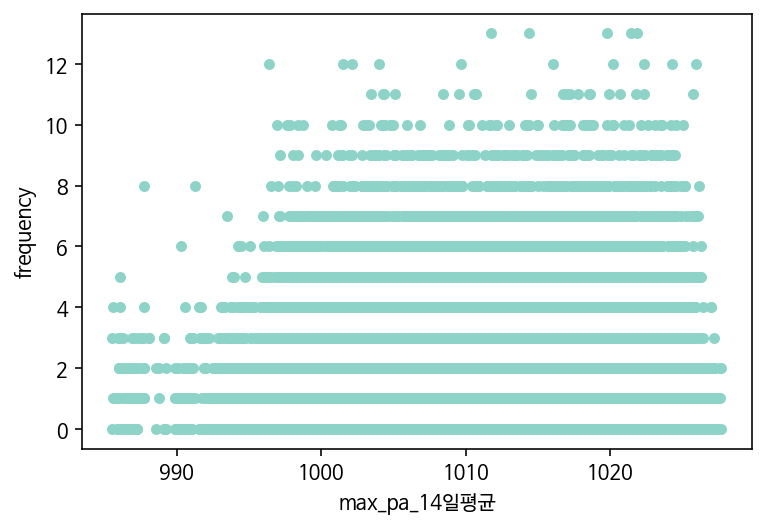

<Figure size 720x360 with 0 Axes>

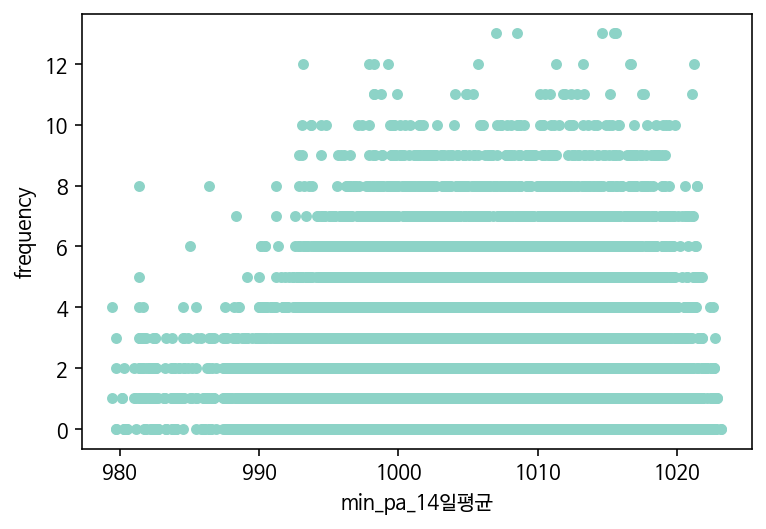

<Figure size 720x360 with 0 Axes>

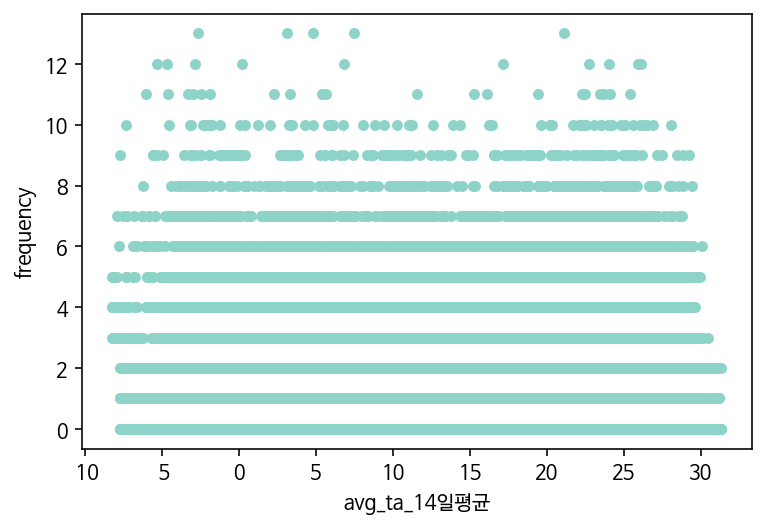

<Figure size 720x360 with 0 Axes>

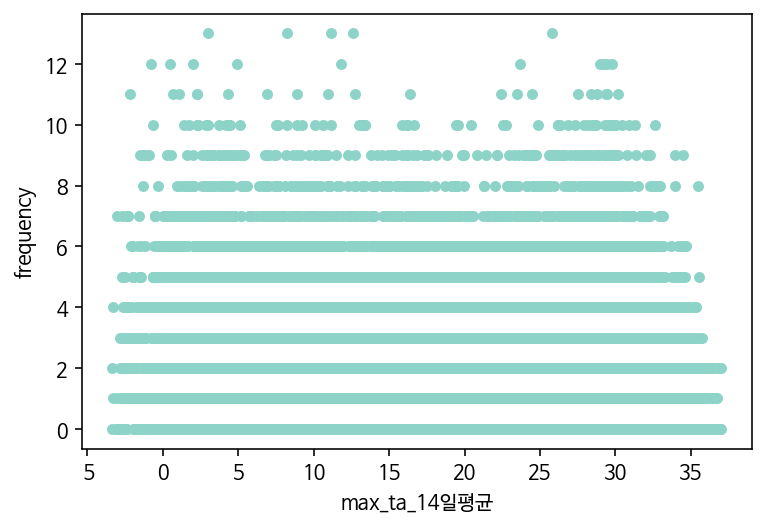

<Figure size 720x360 with 0 Axes>

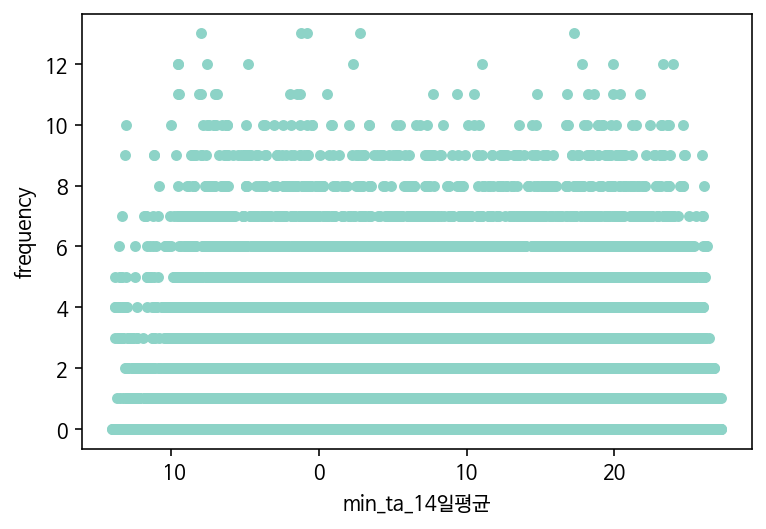

<Figure size 720x360 with 0 Axes>

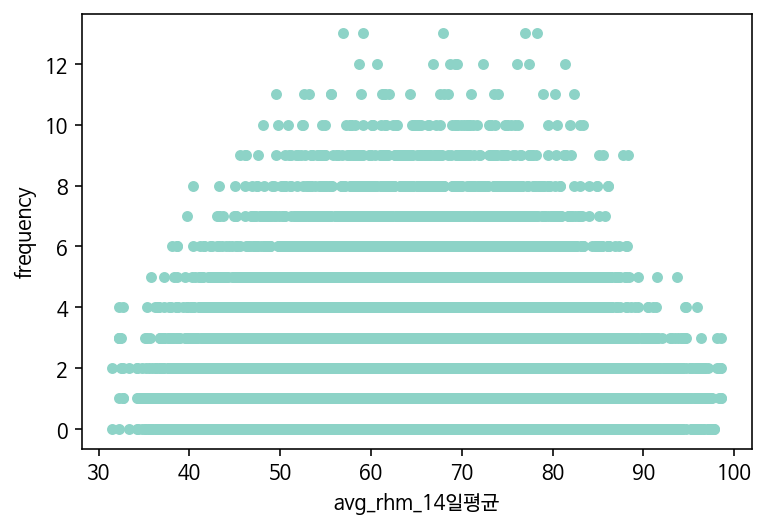

<Figure size 720x360 with 0 Axes>

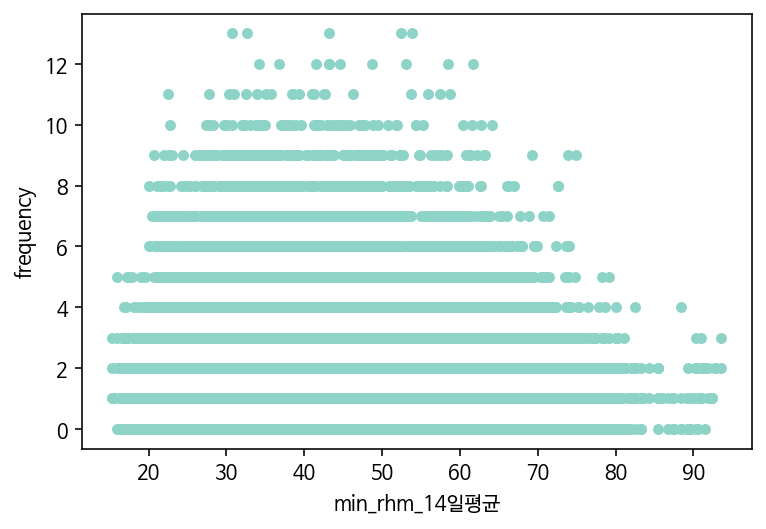

<Figure size 720x360 with 0 Axes>

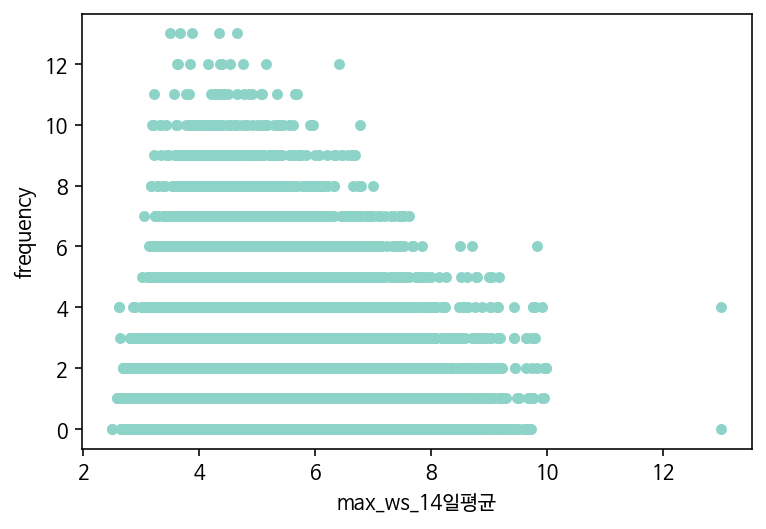

<Figure size 720x360 with 0 Axes>

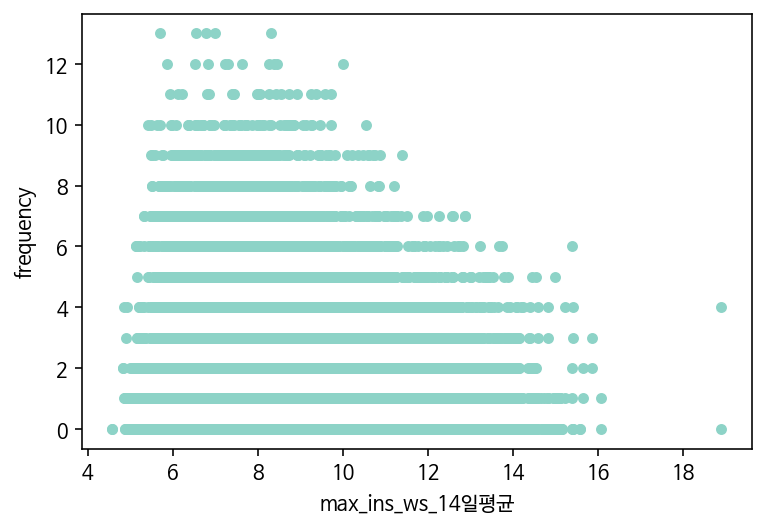

<Figure size 720x360 with 0 Axes>

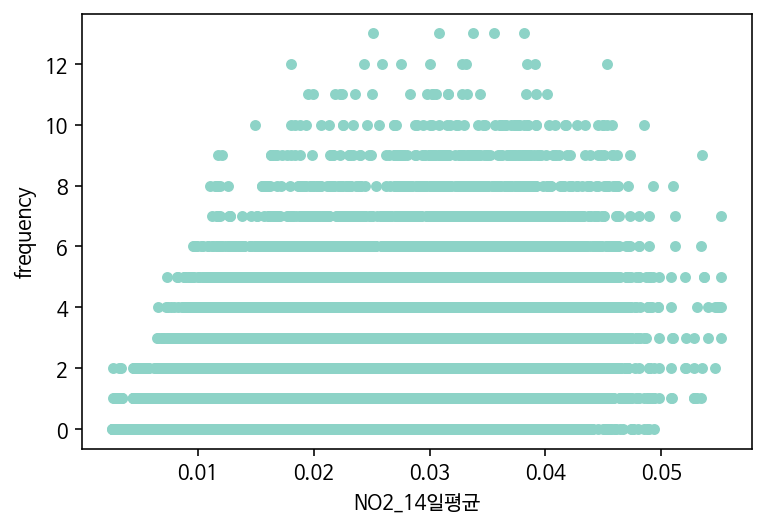

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in past_cols :
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 

#### 기타 변수

<Figure size 720x360 with 0 Axes>

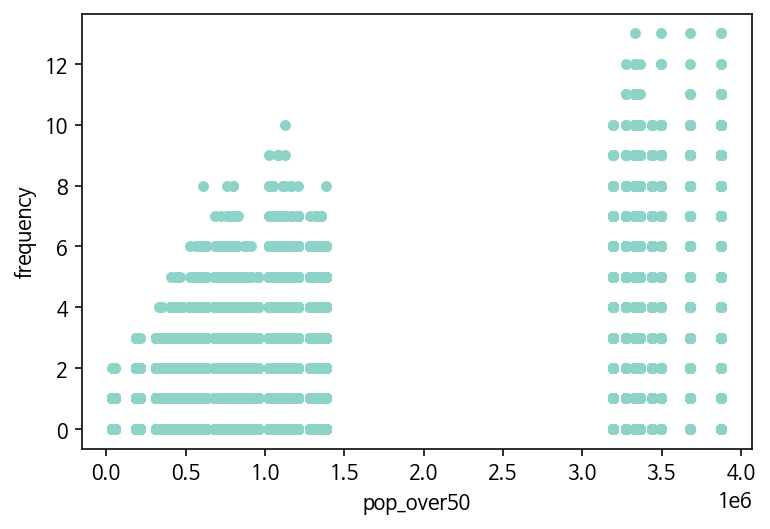

<Figure size 720x360 with 0 Axes>

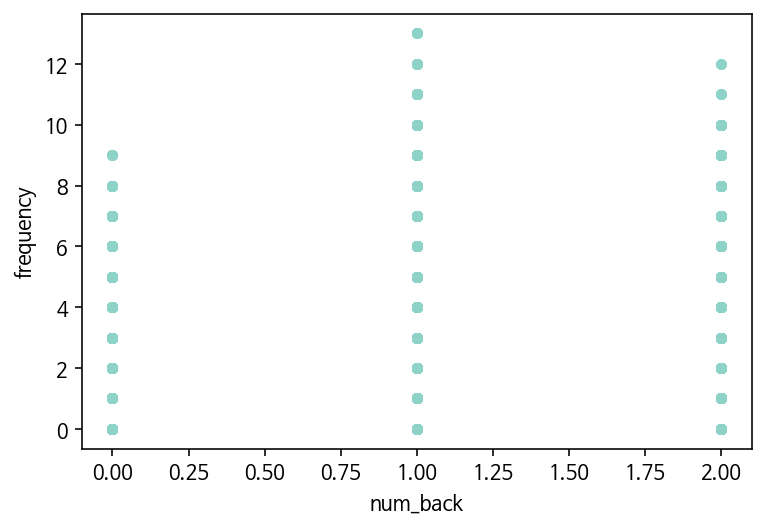

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)


# 연속형 X 
for col in other_cols :
  plt.figure(figsize=(10,5))
  data.plot.scatter(x=col,y='frequency')
  plt.show() 

<Figure size 720x360 with 0 Axes>

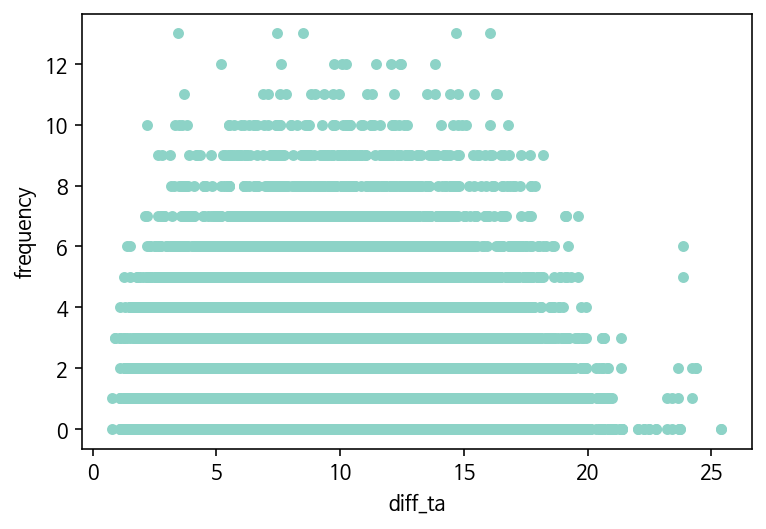

In [ ]:
plt.figure(figsize=(10,5))
data.plot.scatter(x='diff_ta',y='frequency')
plt.show() 

In [ ]:
# 지난 일주일동안 일교차가 몇 이상이면 크다 / 작다
# 지난 일~이주동안 일교차가 특정 값 이상인 날짜 수 


#### heat map

In [ ]:
column_lists = [weather_cols, weather_lag1,weather_lag2, weather_lag3, air_cols, air_lags,forecast_cols,forecast_shift,
                disease_cols,health_cols+other_cols,index_cols, past_cols]

colormap = plt.cm.viridis


#sns.heatmap(pd.concat([train.iloc[:,2], train.iloc[:,3:13]], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

for cols in column_lists:
  cols = ['frequency'] + cols
  df = data[cols]
  corr_df = df.corr()
  
  fig = plt.figure(figsize=(15,15))
  #fig.set_facecolor('white')
  
  sns.heatmap(corr_df,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
  plt.xticks(range(len(corr_df.columns)),corr_df.columns) ## x축 눈금 생성
  plt.yticks(range(len(corr_df.index)), corr_df.index) ## y축 눈금 생성
  plt.title('Pearson Correlation of Features', y=1.05, size=15)
  plt.show()


# ax = sns.heatmap(corr_df_weather, annot=True, annot_kws=dict(color='g'), cmap='Greys')
# plt.show()

Output hidden; open in https://colab.research.google.com to view.

- 연속형 예측변수 중 입원건수와 분명한 관계를 보이는 예측변수는 거의 없었다. 

- 기상 관측 변수와 예보 변수, 생활지수 변수는 입원건수와의 상관계수가 0.0xxx이다. (lag1, lag2, lag3 모두 동일)
- 사실상 지금의 날씨 데이터는 의미가 없는 듯 하다. 찬미언니가 그나마 상관이 있다고 한 lag14변수들을 추가해 보면 좋을 듯

- 질환력 & 보건(흡연) 변수들 굳



####  범주형 예측변수

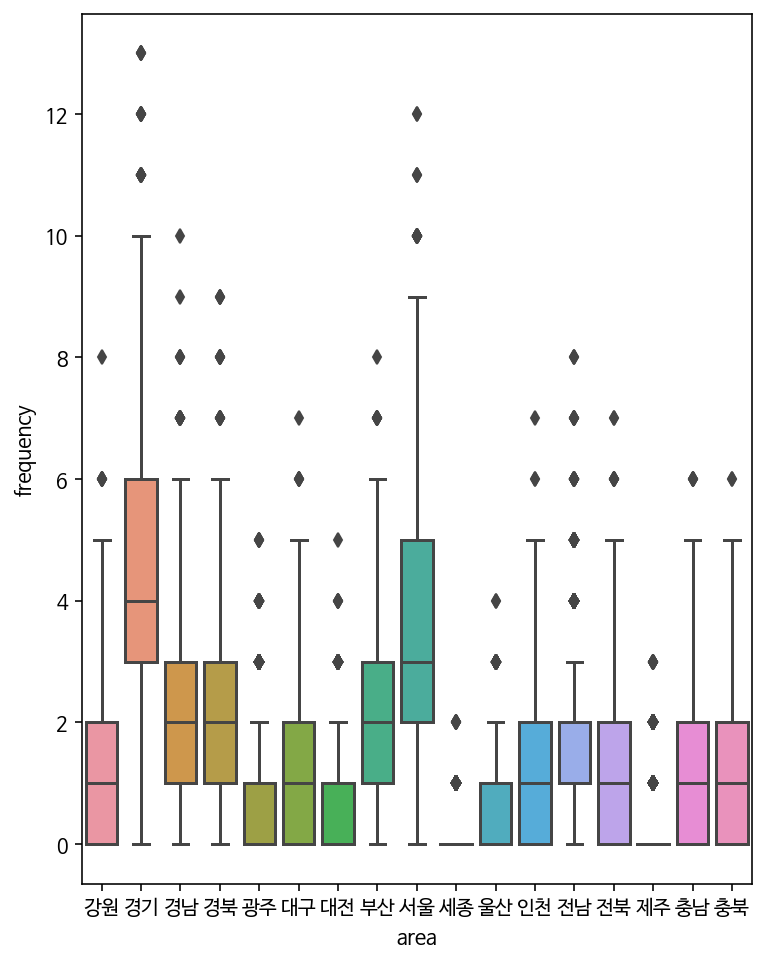

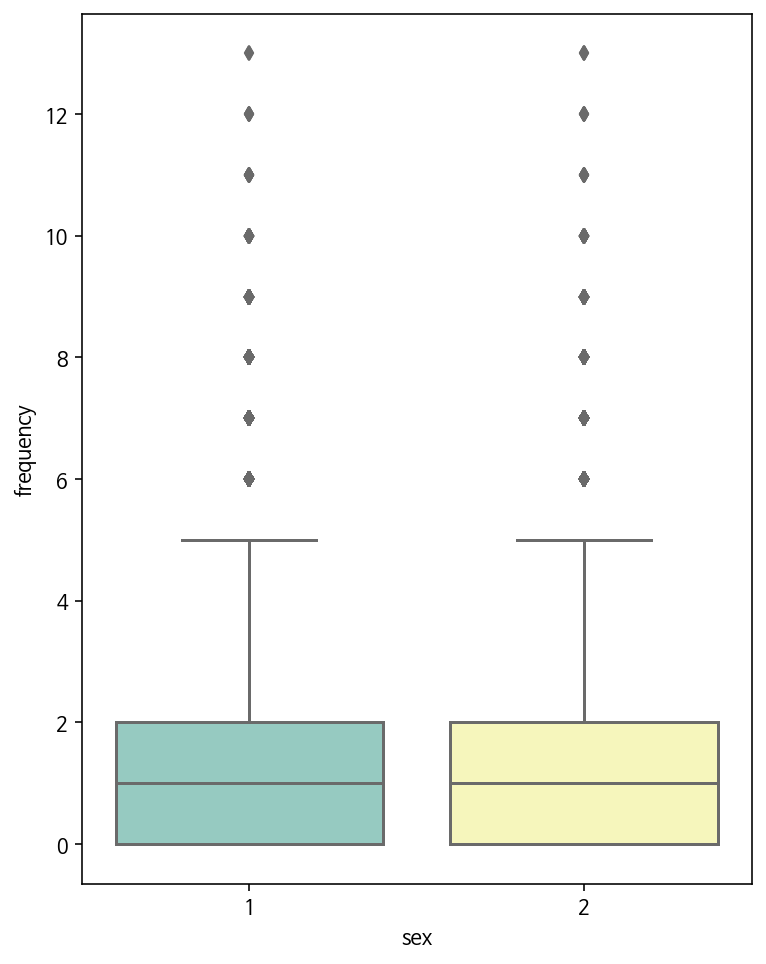

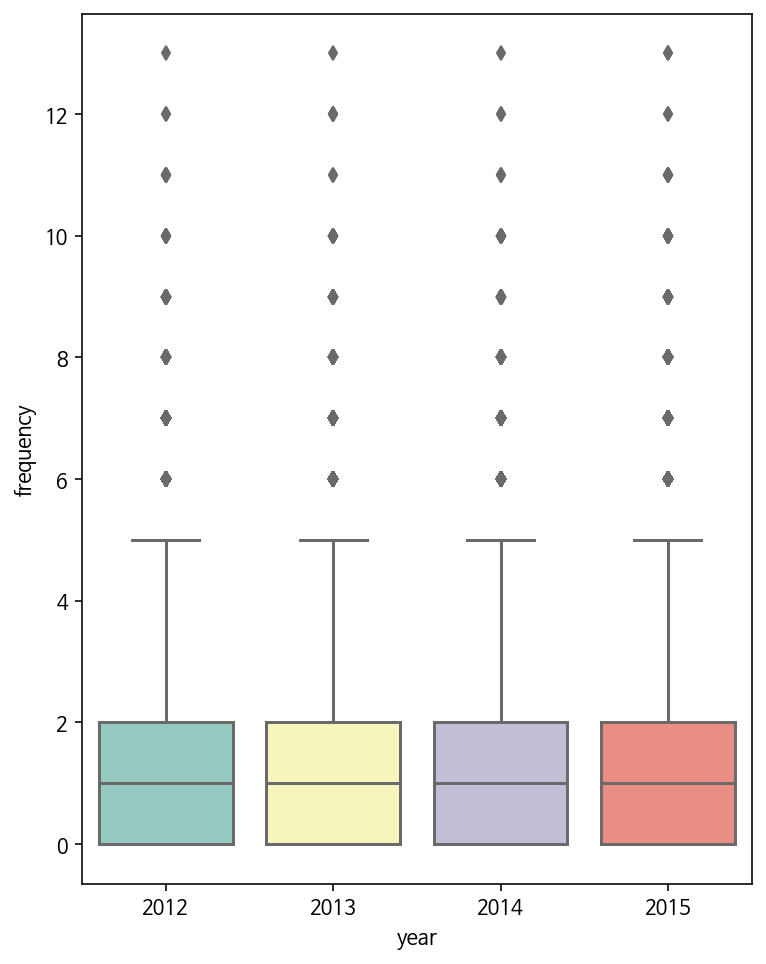

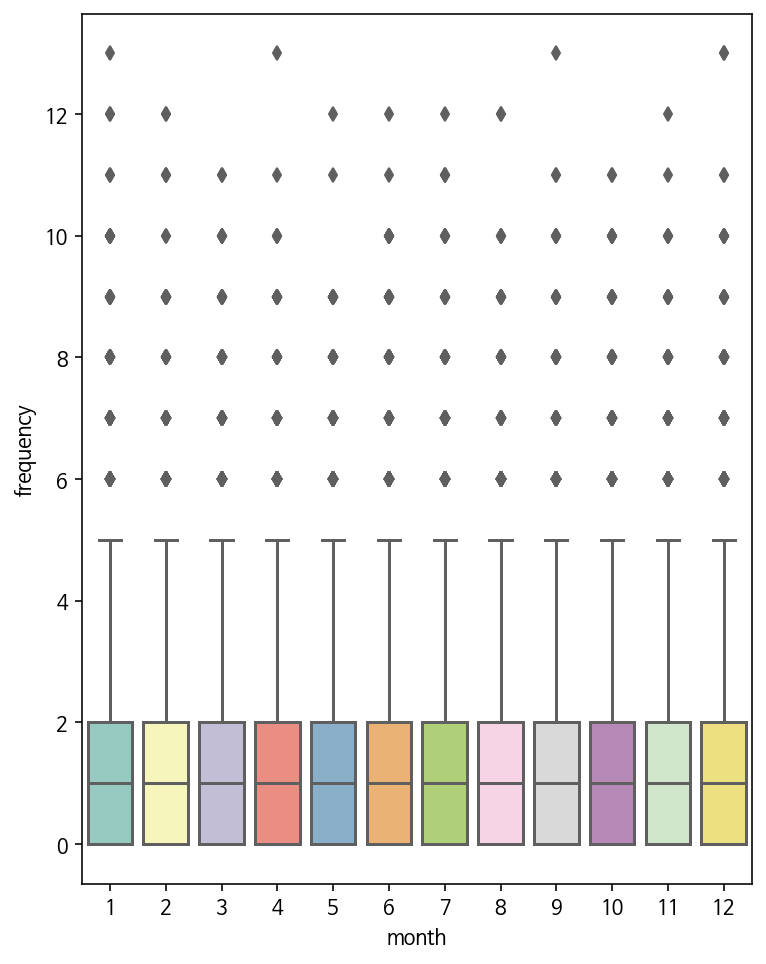

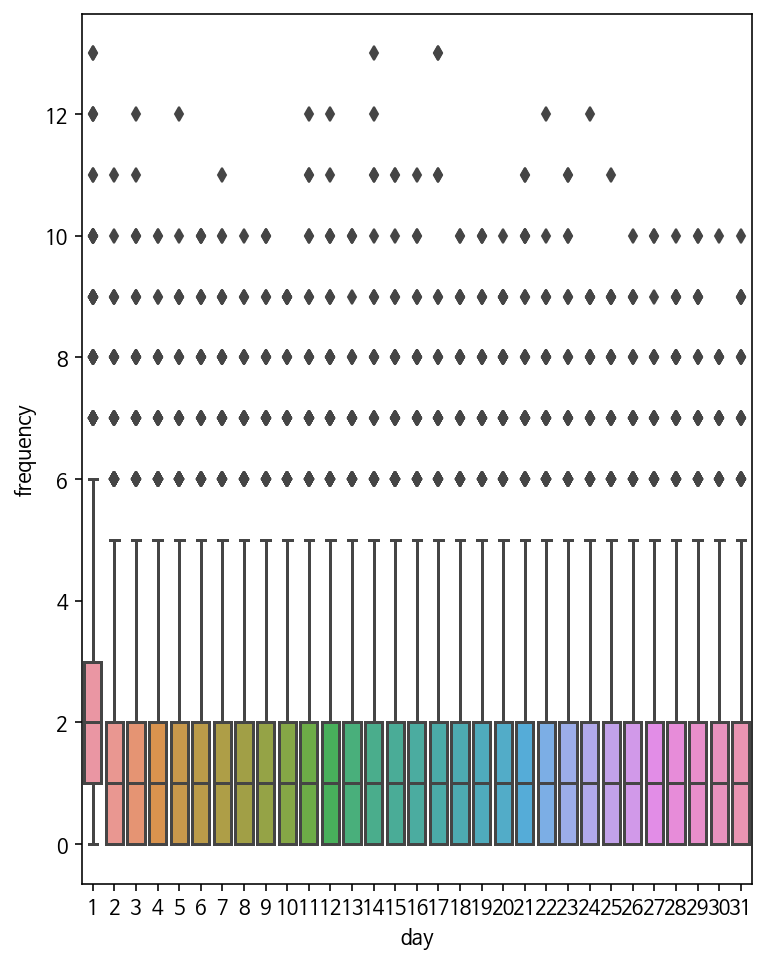

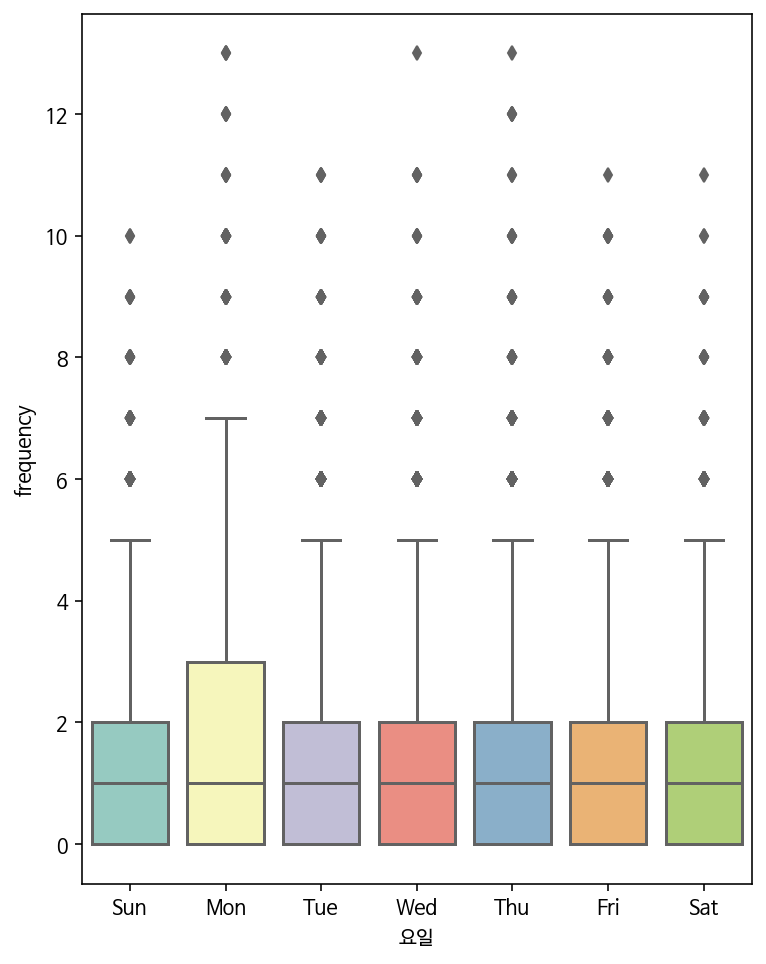

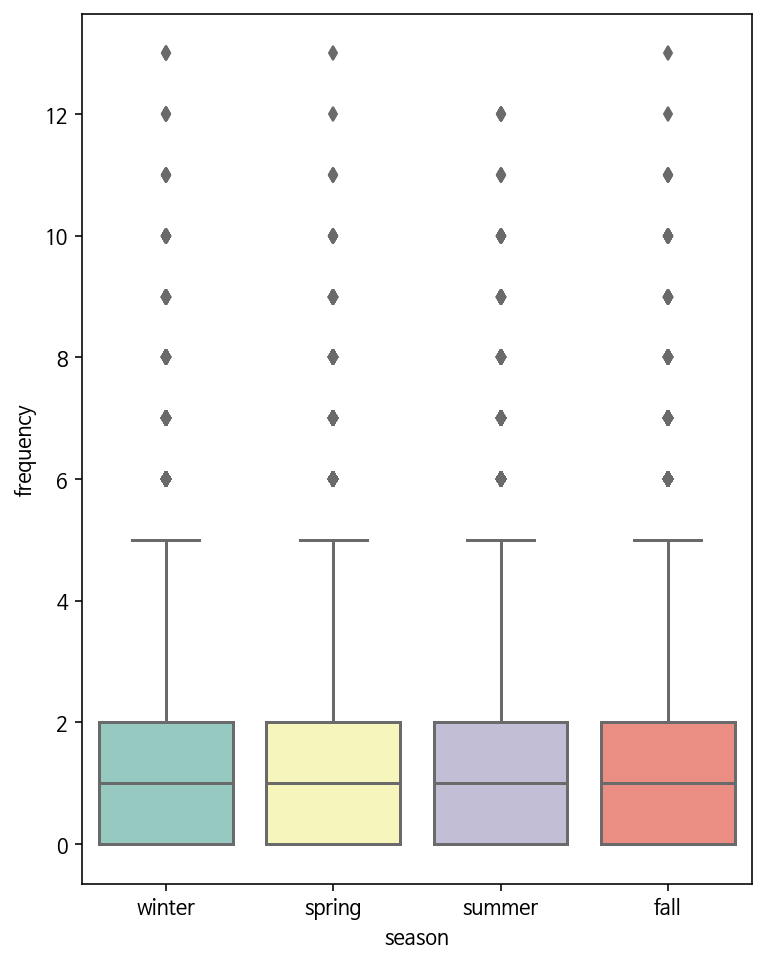

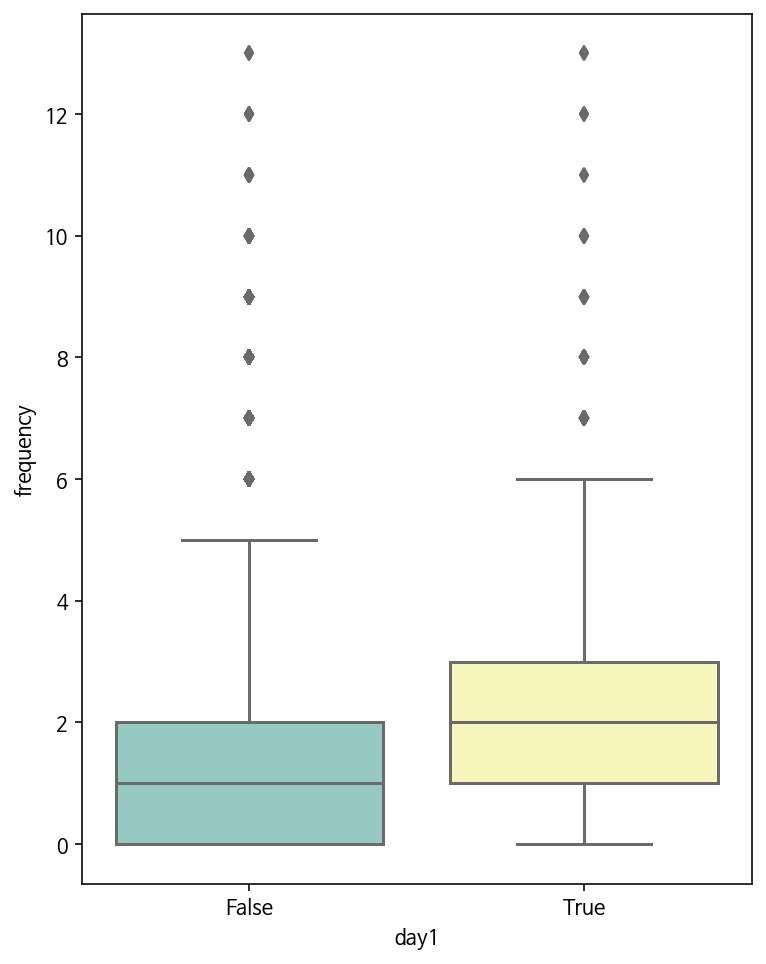

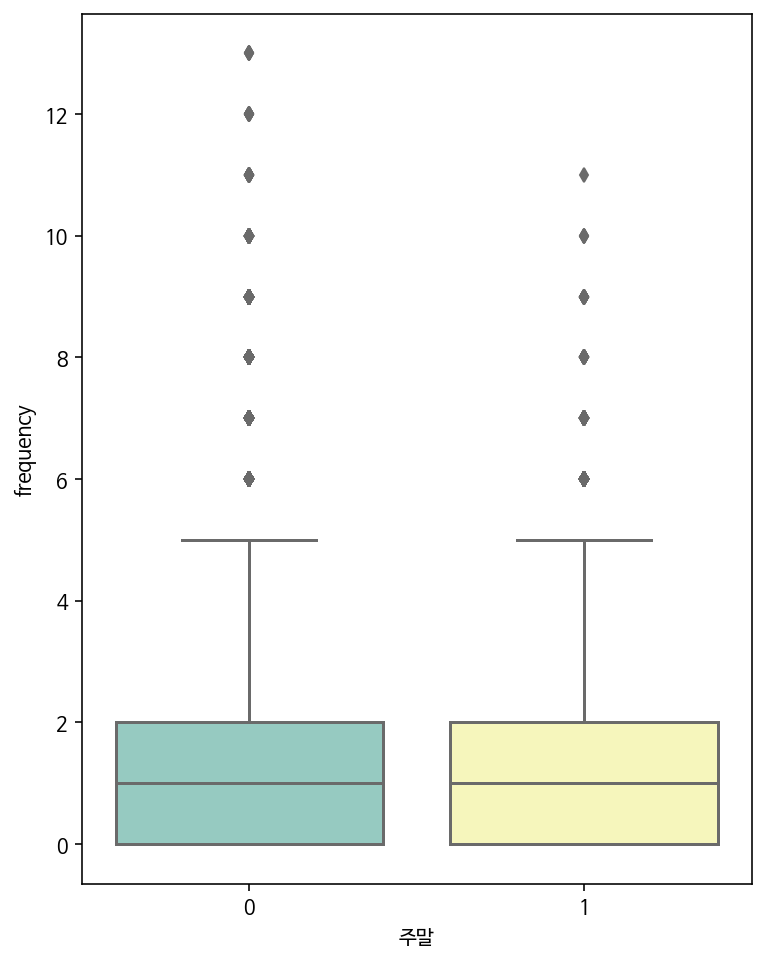

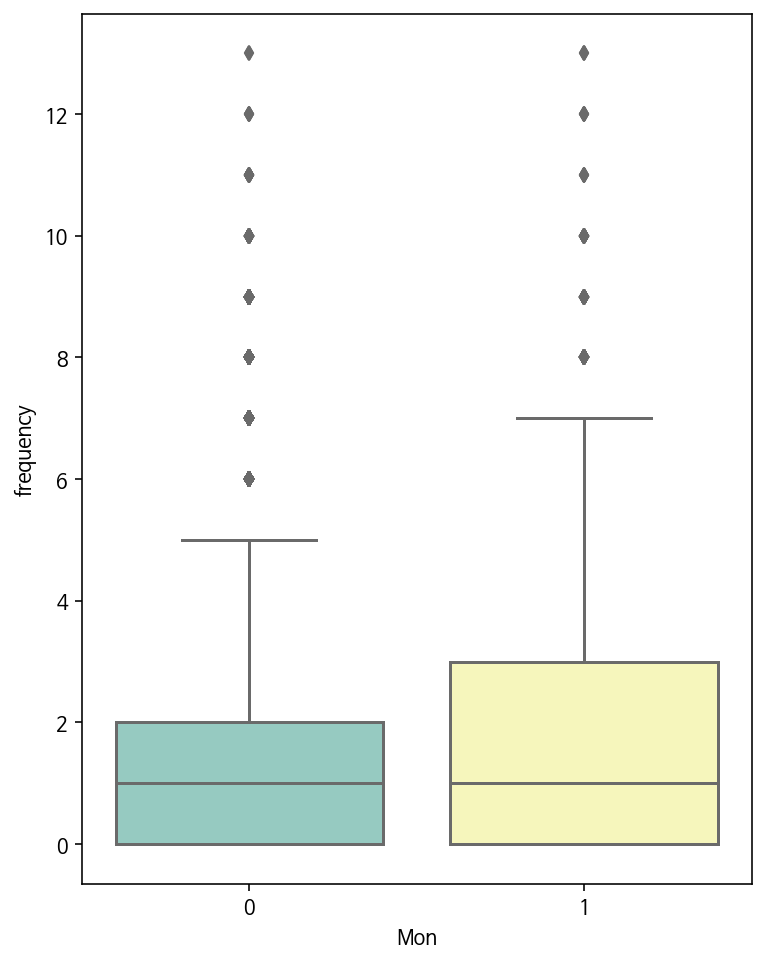

In [ ]:
# 범주형 X
for col in category_feature[1:]:
  plt.figure(figsize=(6,8))
  box=sns.boxplot(x=col,y='frequency',data=data)
  box.set_xlabel(col)
  box.set_ylabel("frequency")
  plt.show()

- 범주형 예측변수 중 입원건수와 분명한 관계를 보이는 예측변수가 일부 있었다.

- 지역별 차이가 유의미하다. 경기는 독보적 1위이며 경기, 서울 지역이 유독 높다. 그 뒤를 경남, 경북, 부산 지역이 따르고, 그 다음으로는 강원, 충북, 충남, 전북, 인천, 대구가 따른다. 제주는 Q3까지의 자료가 0이다. 

- 성별 차이는 없다. 

- 월별 차이가 없다. 

- 일자에 큰 차이가 있다. 1일일 때와 그외의 일자들 간 차이가 크다. 이유는 모르겠다. 

- 요일은 큰 차이가 있다. 월요일과 그외의 요일 간 차이가 크다. 그 이유 중 하나는 주말에는 병원 영업일이 아니어서 증상이 있더라도 참다가, 월요일이 되어서야 병원을 방문하여 입원하게 되는 경우가 있기 때문인 것으로 보인다. 

- 계절은 큰 차이가 없었다.
--- 
(데마팀플 때 한 내용)
- 입원건수가 6건 이상인 경우만 살펴보면, 
  - 지역은 서울, 경기가 많다. 
  - 성차는 없다. 
  - 폭염여부가 0일 때 더 많다. 
  - 뚜렷하지는 않으나 3~6월(봄부터 초여름)보다는 9~2월(가을,겨울철)이 더 많은 것으로 보인다.
  - 월말(25일 이후)보다 월초(1일~5일)에 더 많다. 
  - 여름은 확실히 적고, 가을과 겨울에 입원건수가 많은 것으로 보인다. 
  - 공휴일이 아닐 때(isholiday=0) 더 입원건수가 많은 것으로 보인다. 

In [ ]:
data.shape

(49674, 236)

In [ ]:
data['frequency'].nlargest(1000)

8842     13
15507    13
36213    13
37708    13
49167    13
         ..
9693      6
9794      6
9809      6
10001     6
10033     6
Name: frequency, Length: 1000, dtype: int64

In [ ]:
data_over6 = data[data.frequency >= 6] 

- 전체 49674개의 데이터 중에서 frequency 값이 큰 1000개의 행을 찾아보니, frequency가 6 이상일 때가 그러했다. 따라서 frequency가 6 이상인 고위험 케이스 데이터만을 대상으로 EDA를 진행해보았다.

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set1", 16)
sns.set_palette(qualitative_colors)

# 연속형 X 
for col in numeric_feature:
  plt.figure(figsize=(10,5))
  data_over6.plot.scatter(x=col,y='frequency')
  plt.show() 

# 범주형 X
for col in category_feature[1:]:
  plt.figure(figsize=(6,8))
  box=sns.boxplot(x=col,y='frequency',data=data_over6)
  box.set_xlabel(col)
  box.set_ylabel("frequency")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data_over6.describe()

frequency       dd_mes  sum_dpth_fhsc      dd_mefs       ssrate  \
count  1598.000000  1598.000000    1598.000000  1598.000000  1598.000000   
mean      7.040050     0.948702       0.276163     0.277367    54.150410   
std       1.318297     1.981096       0.858005     0.861966    31.286323   
min       6.000000     0.000000       0.000000     0.000000     0.000000   
25%       6.000000     0.000000       0.000000     0.000000    27.000000   
50%       7.000000     0.000000       0.000000     0.000000    62.457625   
75%       8.000000     1.055827       0.000000     0.000000    82.478842   
max      13.000000    22.013297       8.194625     8.034456    95.900000   

            ss_dur    sum_ss_hr       min_tg       avg_pa       max_pa  ...  \
count  1598.000000  1598.000000  1598.000000  1598.000000  1598.000000  ...   
mean     12.249003     6.552392     5.896832  1008.923609  1011.482529  ...   
std       1.764234     3.793991    11.293117     8.208179     8.263266  ...   
min       9.574183     0.000000   -20.560753   980.481345   984.264409  ...   
25%      10.512444     3.447482    -4.098426  1002.581918  1004.736887  ...   
50%      12.300000     7.498444     5.934418  1009.000000  1011.808154  ...   
75%      13.986893     9.613492    16.275257  1014.718939  1017.548711  ...   
max      14.800000    13.500000    25.900000  1031.962550  1033.873052  ...   

       max_ws_14일평균  max_ins_ws_14일평균    NO2_14일평균  weekday_sin  weekday_cos  \
count   1598.000000       1598.000000  1598.000000  1598.000000  1598.000000   
mean       4.782815          7.995741     0.030124     0.157987    -0.093710   
std        0.930589          1.434798     0.008557     0.713420     0.676680   
min        3.049574          5.127085     0.009572    -0.974928    -0.900969   
25%        4.079207          6.896128     0.023407    -0.433884    -0.900969   
50%        4.651208          7.842575     0.030857     0.433884    -0.222521   
75%        5.335801          8.842857     0.036674     0.781831     0.623490   
max        9.821429         15.378571     0.055171     0.974928     1.000000   

        season_sin   season_cos      area_le    area_code      diff_ta  
count  1598.000000  1598.000000  1598.000000  1598.000000  1598.000000  
mean      0.457454    -0.350492     3.641427    32.667084     9.908972  
std       0.534122     0.618889     3.505925    14.124522     3.383011  
min      -0.433884    -0.900969     0.000000    11.000000     1.400000  
25%       0.433884    -0.900969     1.000000    11.000000     7.500000  
50%       0.781831    -0.222521     1.000000    41.000000     9.780546  
75%       0.974928    -0.222521     8.000000    41.000000    12.206409  
max       0.974928     0.623490    16.000000    48.000000    23.838908  

[8 rows x 225 columns]

- (데마)전체 데이터와 고위험 데이터의 기초통계량을 비교해보면, 기온 관련 변수들 중에서 최저기온이 큰 차이가 있다. 

In [ ]:
time_vars = ['month', 'day', '요일', 'season', 'isholiday'] 


In [ ]:
# 빈도가 적은 순으로 정렬
plt.figure(figsize=(10,5)) 
data['month'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('month')
plt.ylabel('count')
plt.title('월별')
plt.show() # 캔버스를 보여준다

In [ ]:
sex_df = data.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('Sex') 
plt.show() 
############# 

In [ ]:
gg = data[(data['area']=="경기") & (data['sex']==2)]
gg.head()

yyyymmdd area sex  frequency    dd_mes  sum_dpth_fhsc   dd_mefs  \
3   2012-01-01   경기   2          5  1.029764       0.085438  0.096118   
37  2012-01-02   경기   2          6  3.564829       0.000000  0.000000   
71  2012-01-03   경기   2          4  2.216726       0.749032  0.749032   
105 2012-01-04   경기   2          5  2.452216       0.450633  0.222730   
139 2012-01-05   경기   2          2  2.033413       1.262764  1.096128   

        ssrate    ss_dur  sum_ss_hr  ...   weekday_sin  weekday_cos  \
3    25.748326  9.669065   2.485800  ... -2.449294e-16     1.000000   
37   57.381456  9.669065   5.546161  ...  7.818315e-01     0.623490   
71   28.082737  9.674391   2.714852  ...  9.749279e-01    -0.222521   
105  84.951755  9.674391   8.216795  ...  4.338837e-01    -0.900969   
139  91.734487  9.674391   8.875630  ... -4.338837e-01    -0.900969   

     season_sin  season_cos  area_le  area_code   day1  주말  Mon    diff_ta  
3      0.781831     0.62349        1         41   True   1    0   8.401030  
37     0.781831     0.62349        1         41  False   0    1  10.615778  
71     0.781831     0.62349        1         41  False   0    0   9.573237  
105    0.781831     0.62349        1         41  False   0    0   6.350556  
139    0.781831     0.62349        1         41  False   0    0  12.451780  

[5 rows x 236 columns]

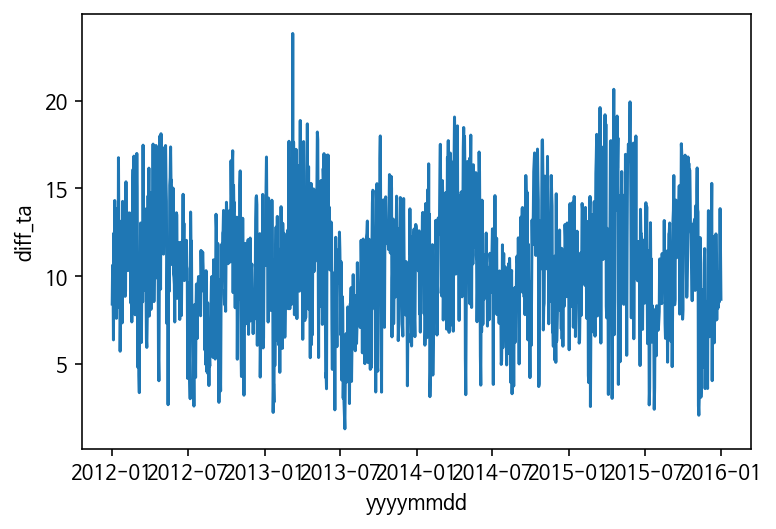

In [ ]:
#plt.plot(gg['diff_ta'])

#plt.xaxis.set_major_locator(dates.MonthLocator(interval=3))
sns.lineplot(x='yyyymmdd', y='diff_ta', data=gg)

In [ ]:
#gg['diff_ta_lag1'] = gg['diff_ta'].shift(1)
# gg['diff_ta_lag2'] = gg['diff_ta'].shift(2)
# gg['diff_ta_lag3'] = gg['diff_ta'].shift(3)
# gg['diff_ta_lag4'] = gg['diff_ta'].shift(4)
# gg['diff_ta_lag5'] = gg['diff_ta'].shift(5)

In [ ]:
#gg['diff_ta_lag1'] = gg['diff_ta_lag1'].fillna(gg['diff_ta_lag1'].values[1])
# gg['diff_ta_lag2'] = gg['diff_ta_lag2'].fillna(gg['diff_ta_lag2'].values[2])
# gg['diff_ta_lag3'] = gg['diff_ta_lag3'].fillna(gg['diff_ta_lag3'].values[3])
# gg['diff_ta_lag4'] = gg['diff_ta_lag4'].fillna(gg['diff_ta_lag4'].values[4])
# gg['diff_ta_lag5'] = gg['diff_ta_lag5'].fillna(gg['diff_ta_lag5'].values[5])
gg['diff_ta_mean5'] = (gg['diff_ta_lag1']+gg['diff_ta_lag2']+gg['diff_ta_lag3']+gg['diff_ta_lag4']+gg['diff_ta_lag5'])/5







In [ ]:
gg['large_diff_ta'] = np.where(gg[''])

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
gg['diff_ta'].describe()

count    1461.000000
mean       10.609854
std         3.495118
min         1.274096
25%         8.241678
50%        10.581499
75%        12.958098
max        23.838908
Name: diff_ta, dtype: float64

In [ ]:
gg2[(gg2['diff_ta']>=13) & (gg2['frequency']>=7)]

In [ ]:
gg2[gg2['diff_ta_mean5']>=10]["frequency"].value_counts()

4     151
3     142
5     137
6     109
2      87
7      67
1      63
8      40
9      29
0      16
10     13
11      5
12      3
13      1
Name: frequency, dtype: int64

In [ ]:
gg2 = gg[["yyyymmdd","frequency","diff_ta_mean5","temp_24_shift","avg_ta_lag1","min_ta_lag1"]]
gg2

In [ ]:
gg3 = gg[gg['frequency']>=7]

In [ ]:
gg3.head()

yyyymmdd area sex  frequency    dd_mes  sum_dpth_fhsc   dd_mefs  \
377  2012-01-12   경기   2         12  3.950079       1.730897  1.847667   
513  2012-01-16   경기   2          8  7.310272       2.723441  2.436842   
581  2012-01-18   경기   2          7  5.969063       0.000000  0.116770   
615  2012-01-19   경기   2          7  3.636307       0.401716  0.426329   
1057 2012-02-01   경기   2         11  5.134671       0.050645  0.050645   

         ssrate     ss_dur  sum_ss_hr  ...   day1  주말  Mon    diff_ta  \
377   55.295768   9.800000   5.418158  ...  False   0    0  13.818417   
513   82.604719   9.894935   8.172818  ...  False   0    1  16.749267   
581   62.998009   9.900000   6.238308  ...  False   0    0  13.144678   
615    0.000000   9.974391   0.000000  ...  False   0    0   9.732280   
1057  92.961761  10.300000   9.574602  ...   True   0    0   8.835003   

      diff_ta_lag1  diff_ta_lag2  diff_ta_lag3  diff_ta_lag4  diff_ta_lag5  \
377       7.580538     10.836259      8.232125     11.442164     14.305159   
513       8.214574     13.855440      9.950553     13.818417      7.580538   
581      11.955221     16.749267      8.214574     13.855440      9.950553   
615      13.144678     11.955221     16.749267      8.214574     13.855440   
1057     12.717274      9.788285     11.204316     11.460882     12.407998   

      diff_ta_mean5  
377       10.479249  
513       10.683905  
581       12.145011  
615       12.783836  
1057      11.515751  

[5 rows x 242 columns]

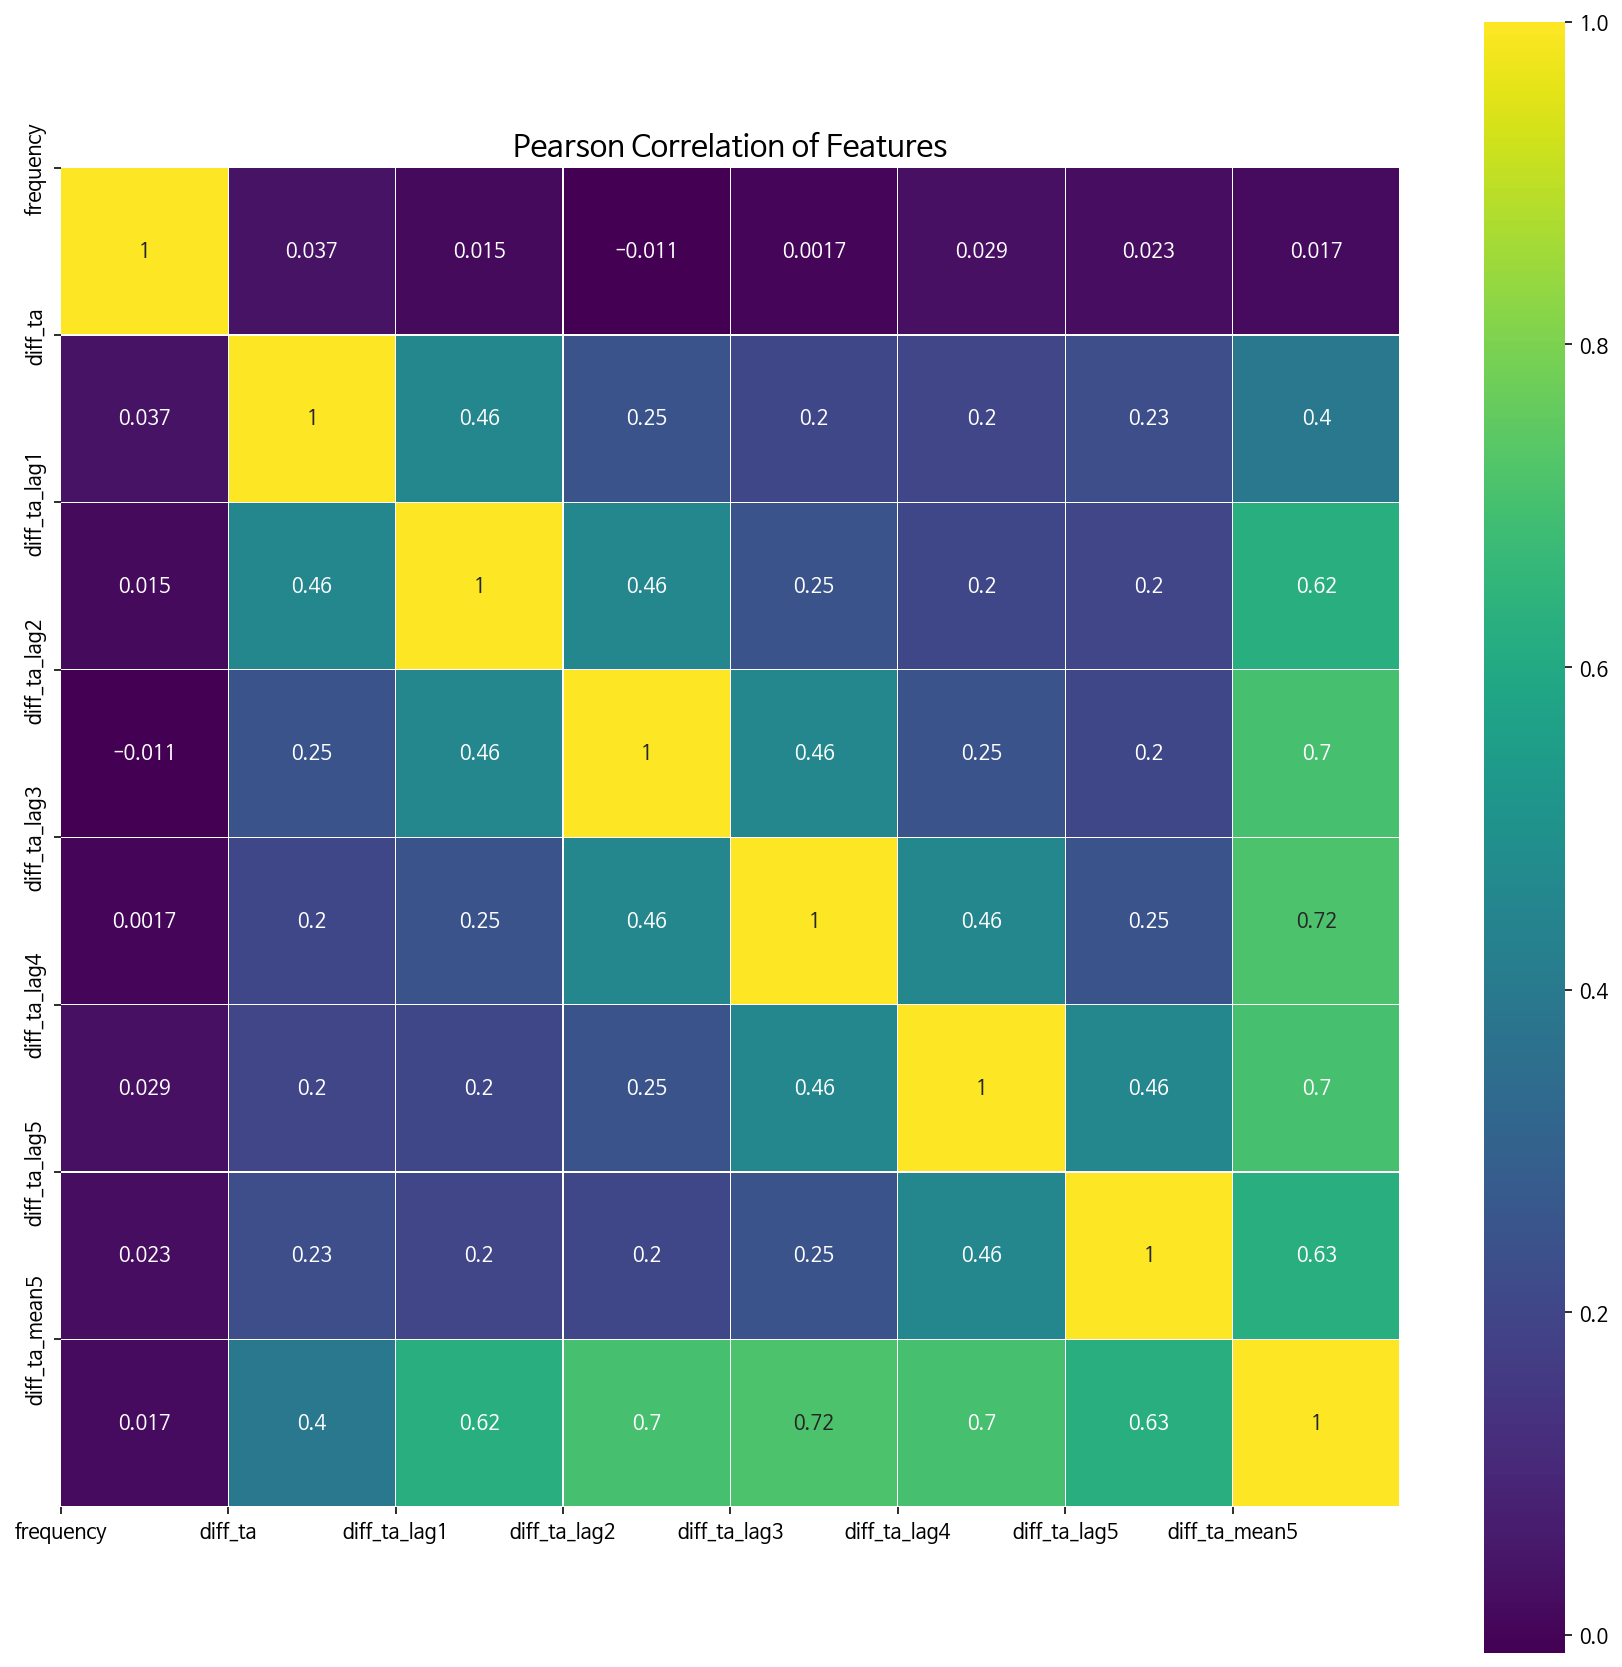

In [ ]:
colormap = plt.cm.viridis



cols = ['frequency'] + gg.columns[-7:].tolist()
df = gg[cols]
corr_df = df.corr()
  
fig = plt.figure(figsize=(15,15))
  #fig.set_facecolor('white')
  
sns.heatmap(corr_df,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.xticks(range(len(corr_df.columns)),corr_df.columns) ## x축 눈금 생성
plt.yticks(range(len(corr_df.index)), corr_df.index) ## y축 눈금 생성
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

## 변수 3개 이상 탐색

#### Bubble Scatter Chart

In [ ]:
# 지역별 변수별 입원건수 
for col in numeric_feature[2:]:
  sns.lmplot(x=col, y='frequency', data=data, col='area', col_wrap=3, 
             hue='area', palette="Set3", x_jitter=.4, fit_reg=False,
             scatter_kws={"s": 180}# size 
             ).fig.suptitle('지역별 {} 변수에 따른 입원건수'.format(str(col)), fontsize=18, y=1.03)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 지역별 변수별 입원건수 - 고위험 데이터(data_over6) 이용 
for col in numeric_feature:
  sns.lmplot(x=col, y='frequency', data=data_over6, col='area', col_wrap=3, 
             hue='area', palette="Set1", x_jitter=.4, fit_reg=False,
             scatter_kws={"s": 180}, # size 
             ).fig.suptitle('지역별 {} 변수에 따른 입원건수 - 고위험 데이터를 이용하여'.format(str(col)), fontsize=18, y=1.05)
  plt.show()

In [ ]:
# define subplot grid
fig, axs = plt.subplots(nrows=round(len(numeric_feature)/2), ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("area별 입원건수", fontsize=18, y=0.95) 

for i, col in enumerate(numeric_feature):
    # filter df for ticker and plot on specified axes
    sns.lmplot(x=col, y='frequency', data=data, hue='area', palette="Set3", x_jitter=.1, fit_reg=False, ax=axs[i])

    # chart formatting
    #ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    #ax.set_xlabel("")

plt.show()

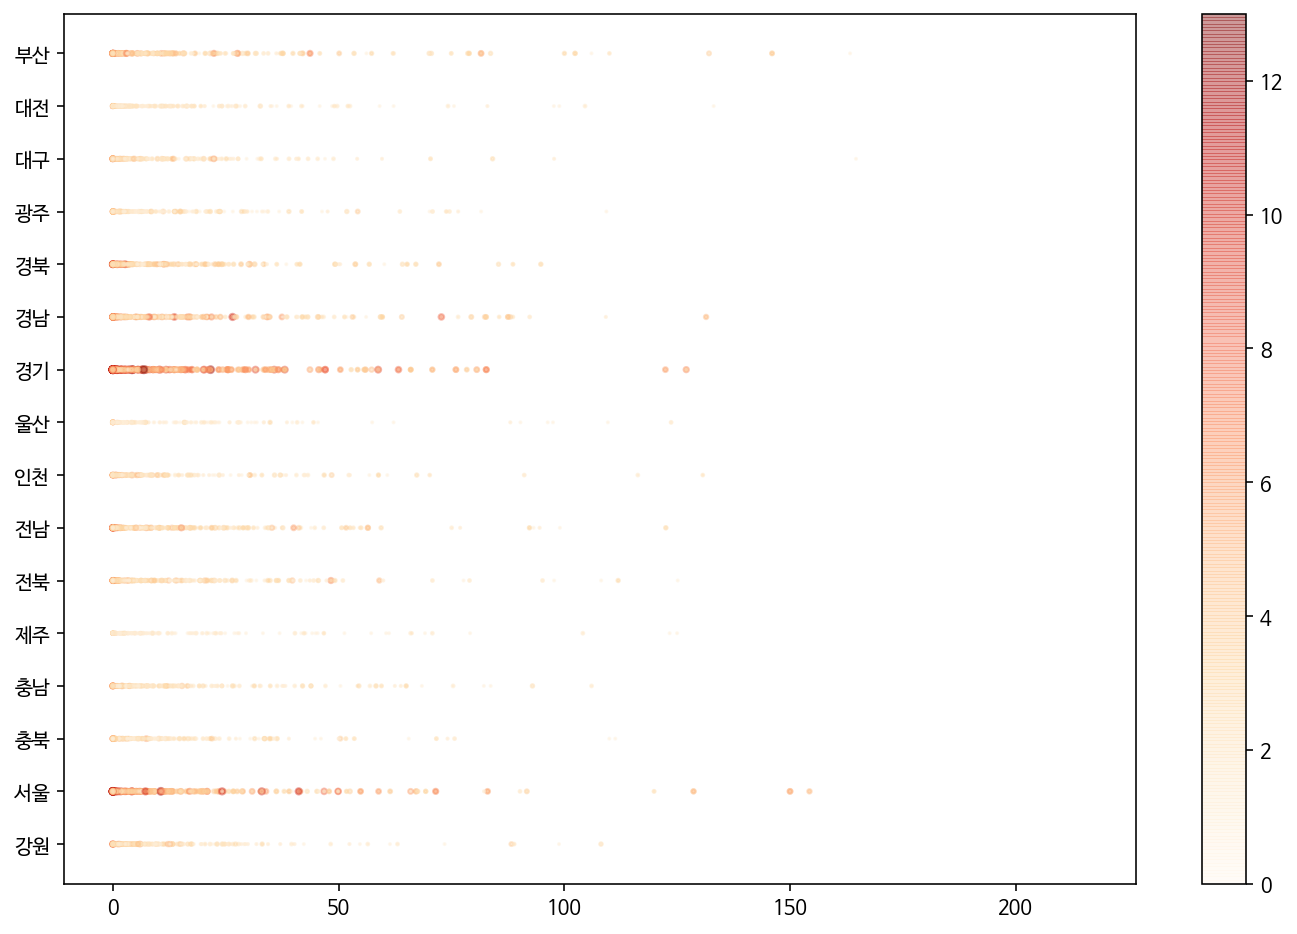

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data['sum_rn_AWS'], # x축
            data['area'], # y축
            c=data['frequency'], # 색상
            s=data['frequency'], # 사이즈  
            # 10을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도 
            cmap='OrRd') # 컬러바 종류 
plt.colorbar()
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

In [ ]:
sns.pairplot(data, diag_kind='hist')  
plt.show() 

In [ ]:
# 팔레트 지정
qualitative_colors = sns.color_palette("Set3", 16)
sns.set_palette(qualitative_colors)
    
sns.pairplot(data, diag_kind='kde', hue="sex") 
plt.show() 